
# 2020-09-17 Artems Qubit

## AY Cell Q3
> - 350µm cross
> - 120nm x 120nm JJ
> - 5.91 x 4.25 µm2 area

## Ay Cell Q4
> - 350µm cross
> - 130nm x 130nm JJ
> - 5.9 x 4.06 µm2 area

## AY Cell Q2
> - 350µm cross
> - 110nm x 110nm JJ
> - 5.91 x 4.18 µm2 area

In [1]:
%matplotlib notebook
import logging
from typing import List
import json
import os

from resonator_tools import circuit
from matplotlib import pyplot as plt
import numpy as np
from numpy import linalg as LA
from matplotlib import cm
from quantum_builder import QuantumBuilder
import scqubits as scq
import ipywidgets
import pandas as pd
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import cycler
from scipy.optimize import curve_fit

#plt.style.use('support-files/qubit.mplstyle')

FLUX = float
FLUX_NUMBER = int
cos = np.cos
sin = np.sin
pi = np.pi


MY_COLOURS = {
    "DarkBlue": "#104e8b",     # dark blue (DodgerBlue4)
    "DarkRed": "#ed2200",     # dark red (red2)
    "Green": "#9acd32",     
    "Orange": "#ffc125",      # orange,
    "LightBlue": "#68838b",  # light steel blue,
    "Purple": "#6959cd",  # dark purple
    "Pink": "#ffa07a"  # pink salmon
}
CMAPS =  ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
COLORMAP_01 = ["#79cdcd", "#eead0e", "#9a37ff", "#00ee76"]
COLORMAP_12 = plt.get_cmap('Reds')
COLORMAP_ENERGY = plt.get_cmap('viridis')
COLORMAP_STATE = plt.get_cmap('hsv')

fF = 10 ** (-15)
Phi0 = 2.067 * 10**(-15)
GHz = 10**9
MHz = 10**6
ns = 10**(-9)

# $T_1$

### Load data

In [3]:
FILE_NAME = "./data/2020-10-23_xmon_measurements/2020-09-17_xmon_ay_q3_t1-14.txt"
with open(FILE_NAME) as fin:
    yargs = fin.readline().strip().split()
    ymin = float(yargs[1])
    ymax = float(yargs[2])  
    xargs= fin.readline().strip().split()
    xmin = float(xargs[1])
    xmax = float(xargs[2])

FileNotFoundError: [Errno 2] No such file or directory: './data/2020-10-23_xmon_measurements/2020-09-17_xmon_ay_q3_t1-14.txt'

In [22]:
from scipy.ndimage import gaussian_filter

data = np.loadtxt(FILE_NAME)
data = gaussian_filter(data, sigma = 2)
x_num = data.shape[1]
y_num = data.shape[0]

array([-6. , -5.8, -5.6, -5.4, -5.2, -5. , -4.8, -4.6, -4.4, -4.2, -4. ])

<IPython.core.display.Javascript object>


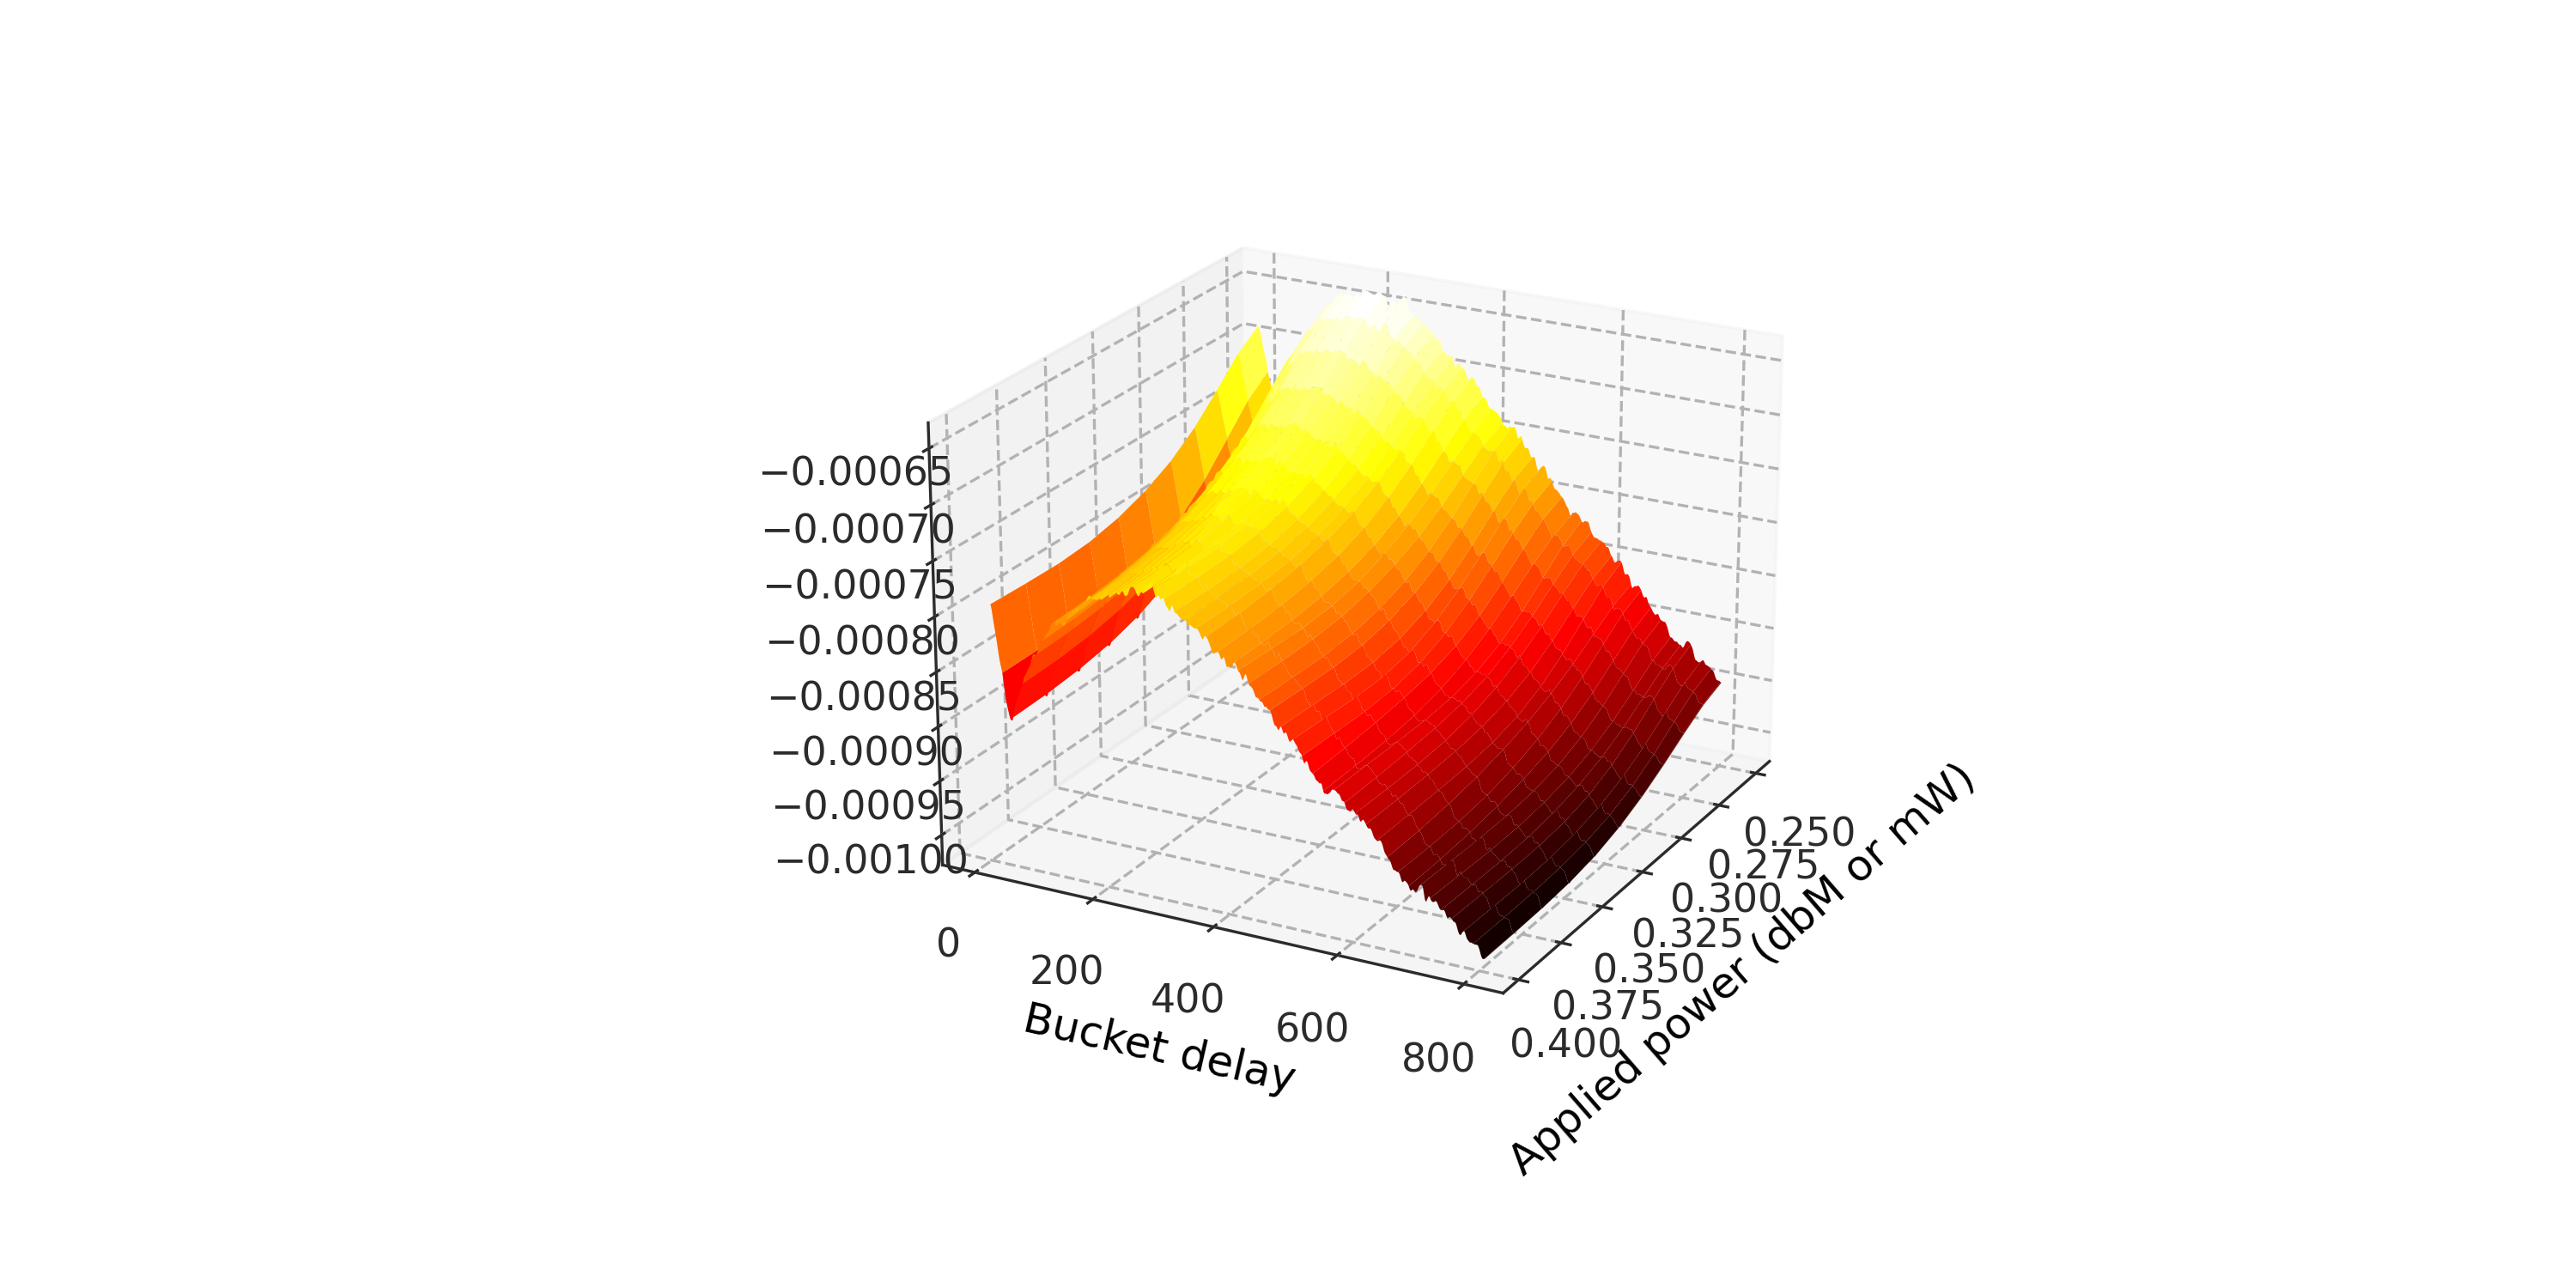

Text(0.5, 0, 'Applied power (dbM or mW)')

In [30]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection='3d')

time_range = np.linspace(xmin, xmax, x_num)
power_range_in_dbm = np.linspace(ymin, ymax, y_num)
power_range_in_mW = [10**(x / 10) for x in power_range_in_dbm]

grid_x, grid_y = np.meshgrid(time_range, power_range_in_mW)
im = ax.plot_surface(
    grid_y,
    grid_x,
    data,
    cmap=cm.hot,
)
ax.set_ylabel("Bucket delay", fontsize=12)
ax.set_xlabel("Applied power (dbM or mW)", fontsize=12)

# Fitting simulations

## STEP 1: Find Qubit $\Delta$ at different magnetic fields


In [7]:
flux_list = np.linspace(-1, 1, 101)

transition_energies = tune_tmon.get_spectrum_vs_paramvals(
    param_name="flux",
    param_vals=flux_list,
    evals_count= 2,
    subtract_ground=True
).energy_table

transition_energies = transition_energies[:, 1]

## STEP 2: Evaluate eigenvalues of the following matrix at differnet fields

\begin{equation}
  \mathcal{H}_{middle} = \begin{pmatrix}
    \Delta E + N\hbar\omega_r & \hbar g\sqrt{N+1}\\
    \hbar g\sqrt{N+1} & (N+1)\hbar\omega_r
  \end{pmatrix}
\end{equation}

USE `N = 0`

\begin{equation}
  \mathcal{H}_{middle} = \begin{pmatrix}
    \Delta E & \hbar g\\
    \hbar g & \hbar\omega_r
  \end{pmatrix}
\end{equation}

THis will give the enrgy difference between states

\begin{equation}
\frac{\left|e, N\right\rangle - \left|g, N+1\right\rangle}{\sqrt{2}}  \quad \text{with energy } E_{high}
\end{equation}

and 

\begin{equation}
\frac{\left|e, N\right\rangle + \left|g, N+1\right\rangle}{\sqrt{2}}  \quad \text{with energy } E_{low}
\end{equation}

and plot $E_{high}(\Phi)$ and $E_{low}(\Phi)$

In [13]:
with open(FILE_NAME) as fin:
    lines = (line for line in fin if not line.startswith('#'))
    qubit_data = np.loadtxt(lines)
    
qubit_data

array([[1.44244275e-02, 7.87081851e+09],
       [1.49244275e-02, 8.37081851e+09],
       [1.54244275e-02, 8.77081851e+09],
       [1.59244275e-02, 9.17081851e+09],
       [1.64244275e-02, 9.67081851e+09],
       [1.69244275e-02, 1.00708185e+10],
       [1.74244275e-02, 1.03708185e+10],
       [1.79244275e-02, 1.06708185e+10],
       [1.84244275e-02, 1.09708185e+10],
       [1.89244275e-02, 1.12708185e+10],
       [1.94244275e-02, 1.14708185e+10],
       [1.99244275e-02, 1.17208185e+10],
       [2.04244275e-02, 1.18708185e+10],
       [2.09244275e-02, 1.21208185e+10],
       [2.14244275e-02, 1.22708185e+10],
       [2.19244275e-02, 1.24208185e+10],
       [2.24244275e-02, 1.25708185e+10],
       [2.29244275e-02, 1.27208185e+10],
       [2.34244275e-02, 1.28208185e+10],
       [2.39244275e-02, 1.29208185e+10],
       [2.44244275e-02, 1.29708185e+10],
       [2.49244275e-02, 1.30208185e+10],
       [2.54244275e-02, 1.30708185e+10],
       [2.59244275e-02, 1.30708185e+10],
       [2.642442

In [11]:
from ipywidgets import *

no_100x100_jj_squares = 1.3**2
AREA_µm2 = 5.9 * 4.06
mA_to_Gauss_AY = 27.3
FILE_NAME = "./data/2020-10_artem-xmon/2020-10-Ay/Qubit24_2020-09-17_xmon_Ay_two-tone_Q4_06_data.txt"
offset = 0.85
scale = 1

ANTICROSS_FILE_NAME = "./data/2020-10_artem-xmon/2020-10-Ay/Qubit24_2020-09-17_xmon_Ay_Q4_xmon-anticross_03_data.txt"
anticross_q4_ay = np.loadtxt(ANTICROSS_FILE_NAME)
y_anticross_q4_ay = anticross_q4_ay[:, 1]
offset1 = 0.64
scale1 = 32
omega_r = 6.574
g = 0.08



# Experiment
with open(FILE_NAME) as fin:
    lines = (line for line in fin if not line.startswith('#'))
    qubit_data = np.loadtxt(lines)
# Convert mA to flux number
qubit_data[:, 0] = qubit_data[:, 0] * \
    mA_to_Gauss_AY * AREA_µm2 / (Phi0 * 10**(16))


e_high = []
e_low = []
for dE in transition_energies:
    a = dE
    b = g
    c = omega_r
    
    factor = np.sqrt(a**2 + 4*b**2 - 2*a*c + c**2)
    e_high.append((a+c+factor)/2)
    e_low.append((a+c-factor)/2)
    

# ax.plot(flux_list, np.array(e_high) - np.array(e_low))
fix, ax = plt.subplots(1, 1, figsize=(5,3))

# @interact
# def plotme(scale=(0,50,1), offset=(-10,0,0.1)):
    
ax.plot(flux_ext_list, transition01,
        color=MY_COLOURS["Green"],
        label="Expected",
        linestyle='--'
        )
ax.plot(flux_list, e_low)
ax.plot(flux_list, e_high)
ax.plot((anticross_q4_ay[:, 0]) * scale1 - offset1, y_anticross_q4_ay, marker='o', linewidth=0)
ax.plot((qubit_data[:, 0] - offset) * scale, qubit_data[:, 1] / 10**9,
        marker="o",
        color=MY_COLOURS["DarkBlue"],
        markeredgecolor="C2",
        markeredgewidth="0.4", markersize=4, alpha=0.95,
        linestyle="")
ax.set_ylim([6.55, 6.6])

plt.tight_layout()
# plt.savefig("./output/qubit-resonator-interaction/qubit-resonator-anticrossing-closeup.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


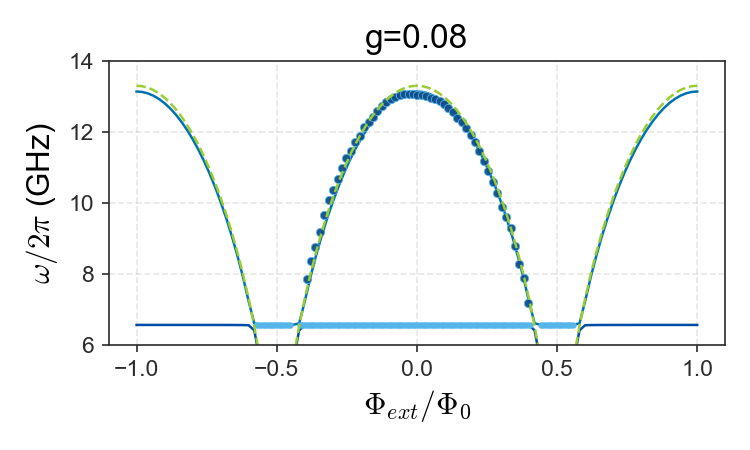

In [52]:
fix, ax = plt.subplots(1, 1, figsize=(5,3))

# @interact
# def plotme(scale=(0,50,1), offset=(-10,0,0.1)):
    

ax.plot(flux_list, e_low)
ax.plot(flux_list, e_high)
ax.plot((anticross_q4_ay[:, 0]) * scale1 - offset1, y_anticross_q4_ay, marker='o', linewidth=0)
ax.plot((qubit_data[:, 0] - offset) * scale, qubit_data[:, 1] / 10**9,
        marker="o",
        color=MY_COLOURS["DarkBlue"],
        markeredgecolor="C2",
        markeredgewidth="0.4", markersize=4, alpha=0.95,
        linestyle="")
ax.plot(flux_ext_list, transition01,
        color=MY_COLOURS["Green"],
        label="Expected",
        linestyle='--'
        )

ax.set_ylim([6, 14])

ax.set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
ax.set_ylabel("$\omega/2\pi$ (GHz)", fontsize=15)
ax.set_title(f"g={g}", fontsize=16)

plt.tight_layout()
plt.savefig("./output/qubit-resonator-interaction/qubit-resonator-anticrossing.png")

## Large $g$

<IPython.core.display.Javascript object>


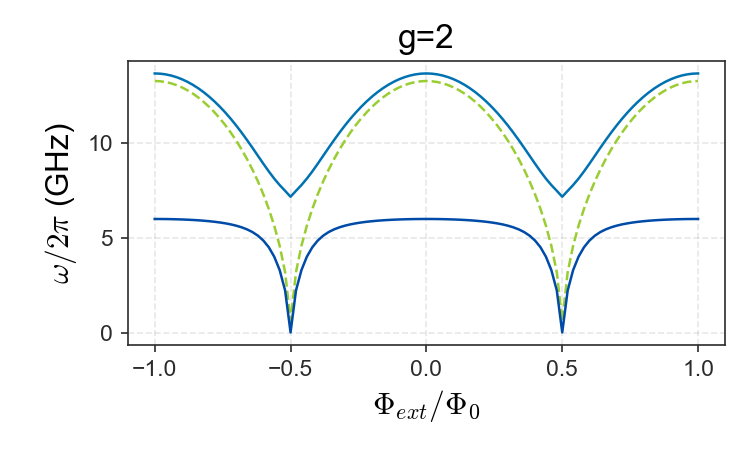

In [59]:
omega_r = 6.574
g = 2

e_high = []
e_low = []
for dE in transition_energies:
    a = dE
    b = g
    c = omega_r
    
    factor = np.sqrt(a**2 + 4*b**2 - 2*a*c + c**2)
    e_high.append((a+c+factor)/2)
    e_low.append((a+c-factor)/2)
    
fix, ax = plt.subplots(1, 1, figsize=(5,3))

ax.plot(flux_ext_list, transition01,
        color=MY_COLOURS["Green"],
        label="Expected",
        linestyle='--'
        )
ax.plot(flux_list, e_low)
ax.plot(flux_list, e_high)

ax.set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
ax.set_ylabel("$\omega/2\pi$ (GHz)", fontsize=15)
ax.set_title(f"g={g}", fontsize=16)

plt.tight_layout()
plt.savefig("./output/qubit-resonator-interaction/qubit-resonator-anticrossing-large-g.png")

## Suppose now thatwe consider $N\ne0$
\begin{equation}
  \mathcal{H}_{middle} = \begin{pmatrix}
    \Delta E + N\hbar\omega_r & \hbar g\sqrt{N+1}\\
    \hbar g\sqrt{N+1} & (N+1)\hbar\omega_r
  \end{pmatrix}
\end{equation}

As seen fromt the graphs - more photon means a shifted spectrum at $\hbar\omega_r$

<IPython.core.display.Javascript object>


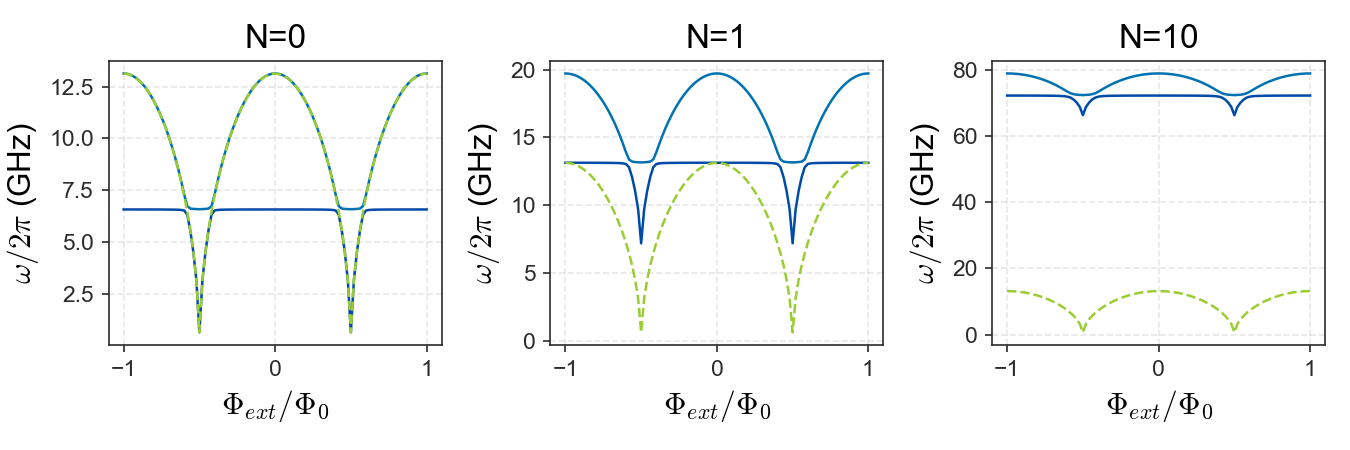

In [22]:
omega_r = 6.574
g = 0.2
EC = 0.16
EJ0 = 69
flux_list = np.linspace(-1, 1, 101)
N_values = [0, 1, 10]

fix, ax = plt.subplots(1, len(N_values), figsize=(9,3))

transmon = scq.TunableTransmon(
    EJmax=2*EJ0,
    EC=EC,
    d=0,  # no assymerty
    flux=0.0,  # defaults
    ng=0.0,
    ncut=21
)
scq_energies = transmon.get_spectrum_vs_paramvals(param_name='flux',
                                                  param_vals=flux_list,
                                                  evals_count=2,
                                                  subtract_ground=True
                                                  ).energy_table
transition01 = scq_energies[:, 1]

for idx, N in enumerate(N_values):
    ax_ = ax[idx]
    
    e_high = []
    e_low = []
    for dE in transition01:
        a = dE + N * omega_r
        b = g * np.sqrt(N+1)
        c = omega_r * (N+1)

        factor = np.sqrt(a**2 + 4*b**2 - 2*a*c + c**2)
        e_high.append((a+c+factor)/2)
        e_low.append((a+c-factor)/2)

    ax_.plot(flux_list, e_low)
    ax_.plot(flux_list, e_high)

    ax_.plot(flux_ext_list, transition01,
        color=MY_COLOURS["Green"],
        label="Expected",
        linestyle='--'
        )

    ax_.set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
    ax_.set_ylabel("$\omega/2\pi$ (GHz)", fontsize=15)
    ax_.set_title(f"N={N}", fontsize=16)

plt.tight_layout()

### At degeneracy
\begin{equation}
  \mathcal{H}_{middle} = \begin{pmatrix}
    (N+1)\hbar\omega_r & \hbar g\sqrt{N+1}\\
    \hbar g\sqrt{N+1} & (N+1)\hbar\omega_r
  \end{pmatrix}
\end{equation}

we can clearly see how the anticrossing gap gets larger

In [3]:
omega_r = 6.574
g = 0.2
EC = 0.16
EJ0 = 69
flux_list = np.linspace(-1, 1, 101)
N_values = [0, 1, 10]

fix, ax = plt.subplots(1, len(N_values), figsize=(9,3))

transmon = scq.TunableTransmon(
    EJmax=2*EJ0,
    EC=EC,
    d=0,  # no assymerty
    flux=0.0,  # defaults
    ng=0.0,
    ncut=21
)
scq_energies = transmon.get_spectrum_vs_paramvals(param_name='flux',
                                                  param_vals=flux_list,
                                                  evals_count=2,
                                                  subtract_ground=True
                                                  ).energy_table
transition01 = scq_energies[:, 1]

for idx, N in enumerate(N_values):
    ax_ = ax[idx]
    
    e_high = []
    e_low = []
    for dE in transition01:
        a = dE + N * omega_r
        b = g * np.sqrt(N+1)
        c = omega_r * (N+1)

        factor = np.sqrt(a**2 + 4*b**2 - 2*a*c + c**2)
        e_high.append((a+c+factor)/2)
        e_low.append((a+c-factor)/2)

    ax_.plot(flux_list, e_low)
    ax_.plot(flux_list, e_high)

    ax_.plot(flux_ext_list, transition01 + omega_r * N,
        color=MY_COLOURS["Green"],
        label="Expected",
        linestyle='--'
        )

    ax_.set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
    ax_.set_ylabel("$\omega/2\pi$ (GHz)", fontsize=15)
    ax_.set_title(f"N={N}", fontsize=16)
    ax_.set_ylim([omega_r * (N + 1) - 0.5, omega_r * (N + 1) + 0.5])

plt.tight_layout()

<IPython.core.display.Javascript object>

NameError: name 'flux_ext_list' is not defined

## Considering more matrix elements
\begin{equation}
    \begin{pmatrix}
    \hbar N\omega_r & 0 & 0 & 0\\
    0 & \hbar N\omega_r+\Delta E & \hbar g\sqrt{N+1} & 0\\
    0 & \hbar g\sqrt{N+1} & \hbar (N+1)\omega_r & 0\\
    0 & 0 & 0 & hbar (N+1)\omega_r+\Delta E.\\
    \end{pmatrix}
\end{equation}

and for $N=0$
\begin{equation}
    \begin{pmatrix}
    0 & 0 & 0 & 0\\
    0 & \hbar \Delta E & \hbar g & 0\\
    0 & \hbar g & \hbar\omega_r & 0\\
    0 & 0 & 0 & \hbar\omega_r+\Delta E.\\
    \end{pmatrix}
\end{equation}

with states $\left|g, 0 \right\rangle, \left|e, 0 \right\rangle, \left|g, 1 \right\rangle, \left|e, 1 \right\rangle$

In [ ]:
omega_r = 6.574
g = 0.2
EC = 0.16
EJ0 = 69
flux_list = np.linspace(-1, 1, 101)
N_values = [0, 1, 10]

fix, ax = plt.subplots(1, len(N_values), figsize=(9,3))

# Simulate transmon
transmon = scq.TunableTransmon(
    EJmax=2*EJ0,
    EC=EC,
    d=0,  # no assymerty
    flux=0.0,  # defaults
    ng=0.0,
    ncut=21
)
scq_energies = transmon.get_spectrum_vs_paramvals(param_name='flux',
                                                  param_vals=flux_list,
                                                  evals_count=2,
                                                  subtract_ground=True
                                                  ).energy_table
transition01 = scq_energies[:, 1]

# Add interaction term with the resonator
e_high = []
e_low = []
for dE in transition01:
    # construct 4x4 matrix
    (eig_val, eig_vec) = LA.eig(
        np.array(
            [[0, 0, 0, 0], 
             [0, dE, g, 0],
             [0, g, omega_r, 0,
             0, 0, 0, omega_r + dE]]))
    
    
    e_high.append((a+c+factor)/2)
    e_low.append((a+c-factor)/2)

ax_.plot(flux_list, e_low)
ax_.plot(flux_list, e_high)

ax_.plot(flux_ext_list, transition01 + omega_r * N,
    color=MY_COLOURS["Green"],
    label="Expected",
    linestyle='--'
    )

ax_.set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
ax_.set_ylabel("$\omega/2\pi$ (GHz)", fontsize=15)
ax_.set_title(f"N={N}", fontsize=16)
ax_.set_ylim([omega_r * (N + 1) - 0.5, omega_r * (N + 1) + 0.5])

plt.tight_layout()

# Resonators
##### Fano fit
\begin{equation}
F(\omega) = A + B \frac{\left[q + 2(\omega - \omega_0)/\Gamma)\right]^2}{1 + \left[2(\omega - \omega_0)/\Gamma)\right]^2}
\end{equation}

and the $Q$ factor is then:

\begin{equation}
Q_l = \frac{\omega_0}{\Gamma}
\end{equation}

##### Circle fit
\begin{equation}
S_{21}(f)=ae^{i\alpha}e^{-i2\pi{f}\tau}\left[1 - \frac{(Q/\left|Q_e\right|)e^{i\varphi}}{1 + i2Q(f/f_r - 1)}\right]
\end{equation}

is fitted in order to derive:

\begin{equation}
 \frac{1}{Q_{l}} = \frac{1}{Q_{i}} + \Re\left[\frac{1}{Q_{e}}\right]
\end{equation}

where:
- $Q_l$ is the total quality factor
- $Q_i$ is the internal quality factor
- $Q_e$ is the quality factor due to coupling

In [13]:
def fano_model(omega, 
               omega0,
               A,
               B,
               q, 
               gamma
              ):
    _var = 2 * (omega - omega0) / gamma
    return A + B * (q + _var)**2 / (1 + _var**2)

def resonator_evaluator(df: pd.DataFrame, fano_initial: List[float], name: str):
    """
    Runs fano and circle fits to the supplied dataframe,
    It MUST have columnd "freq", "mag", "phase"
    """
    # Fano
    try:
        (popt, _) = curve_fit(
            fano_model, 
            df["freq"], df["mag"], 
            fano_initial,

        )
    except RuntimeError:
        print("Failed fano fit!")
        popt = fano_initial 

    try:
        # Circle Fit - our resonators are lambda/4 (notch) as opposed to lambda/2 (transmission) or reflection (reflection) measurements
        port1 = circuit.notch_port(
            f_data=df["freq"].values,
            z_data_raw= df["mag"] * np.exp(1j*df["phase"])
        )
        freq_axis = port1.f_data / GHz
        port1.autofit()
        fitting_dictionary = {
            "resonator-frequency": port1.fitresults["fr"],
            "Q-total": port1.fitresults["Ql"],
            "Q-internal": port1.fitresults["Qi_dia_corr"],
            "Q-external": port1.fitresults["Qc_dia_corr"]
        }
    except np.linalg.LinAlgError:
        print("Failed circle fit")

    fig, ax_all = plt.subplots(2, 2, figsize=(6, 6))

    ax = ax_all[0][0]
    ax.plot(df["freq"]/ GHz, df["mag"], 'b.', label='Data')
    ax.plot(df["freq"]/ GHz, fano_model(df["freq"], *popt), 'r-', label='Fit', linewidth=3)
    ax.set_xlabel('Frequency (GHz)', fontsize=12)
    ax.set_ylabel('Magnitude', fontsize=12)
    ax.set_title(f"""
        $Q_{{fano}}={popt[0] / popt[-1] / 2:.1f}$
        $f_{{res}} = {popt[0]/GHz:.5f}$GHz
        """, fontsize=8)

    ax = ax_all[0][1]
    ax.plot(freq_axis, np.absolute(port1.z_data_raw), label='rawdata')
    ax.plot(freq_axis, np.absolute(port1.z_data_sim), label='fit', color="C8")
    ax.set_xlabel('Frequency (GHz)',fontsize=8)
    ax.set_ylabel('$|S_{21}|$',fontsize=8)
    ax.set_title(f"""
                 $Q_{{total}} = {fitting_dictionary['Q-total']:.2f}$
                 $Q_{{internal}} = {fitting_dictionary['Q-internal']:.2f}$
                 $Q_{{external}} = {fitting_dictionary['Q-external']:.2f}$
                 $f_{{res}} = {fitting_dictionary['resonator-frequency']/GHz:.5f}$GHz
                 """, fontsize=8)

    ax = ax_all[1][0]
    ax.plot(port1.z_data_raw.real, port1.z_data_raw.imag, label='rawdata')
    ax.plot(port1.z_data_sim.real, port1.z_data_sim.imag, label='fit', color="C8")
    ax.set_xlabel('Re$[S_{21}]$',fontsize=8)
    ax.set_ylabel('Im$[S_{21}]$',fontsize=8)

    ax = ax_all[1][1]
    ax.plot(freq_axis, np.angle(port1.z_data_raw), label='rawdata')
    ax.plot(freq_axis, np.angle(port1.z_data_sim), label='fit', color="C8")
    ax.set_xlabel('Frequency (GHz)',fontsize=8)
    ax.set_ylabel('arg(${S_{21}}$)',fontsize=8)
    
    fig.suptitle(name)

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


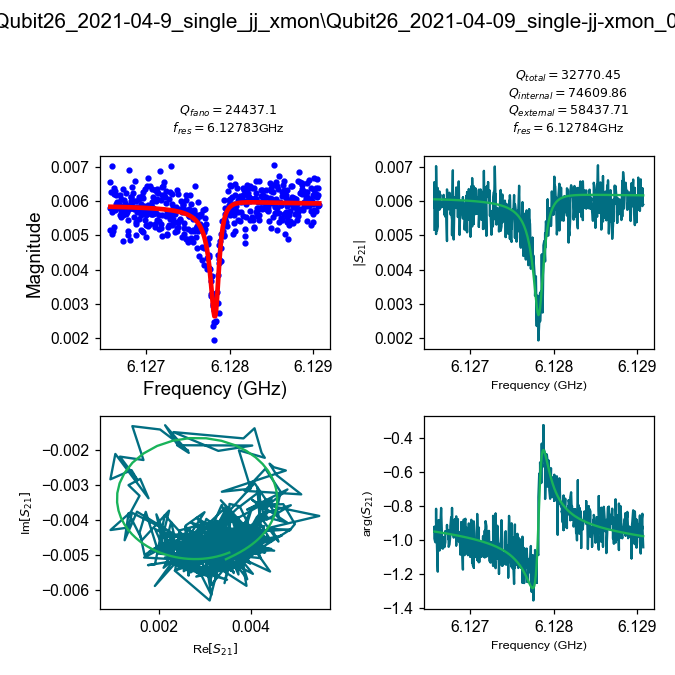

In [14]:
#FILENAME = '/Users/CCCP/creamy_seas/monday_starts_on_saturday/lab-results/2021-04-09_single-jj-xmon/Qubit26_2021-04-09_single-jj-xmon_01_resonators_q1.txt'
FILENAME = "C:\ExperimentBlue\Qubit26_2021-04-9_single_jj_xmon\Qubit26_2021-04-09_single-jj-xmon_01_resonators_q1.txt"
df = pd.read_csv(FILENAME,sep='\t')
df.columns = ["freq", "mag", "phase"]

resonator_evaluator(
    df,
    [
        6.128*GHz, 
        1, 
        0.4, 
        0, 
        3*MHz],
        FILENAME.split("/")[-1]
)

plt.savefig(FILENAME.replace("txt", "png"))

In [140]:
FILENAME = '/Users/CCCP/creamy_seas/monday_starts_on_saturday/lab-results/2021-04-09_single-jj-xmon/Qubit26_2021-04-09_single-jj-xmon_01_resonators_q2.txt'
df = pd.read_csv(FILENAME,sep='\t')
df.columns = ["freq", "mag", "phase"]

resonator_evaluator(
    df,
    [
        6.3411*GHz, 
        1, 
        0.4, 
        0, 
        3*MHz],
        FILENAME.split("/")[-1]
)

plt.savefig(FILENAME.replace("txt", "png"))

<IPython.core.display.Javascript object>

In [141]:
FILENAME = '/Users/CCCP/creamy_seas/monday_starts_on_saturday/lab-results/2021-04-09_single-jj-xmon/Qubit26_2021-04-09_single-jj-xmon_01_resonators_q3.txt'
df = pd.read_csv(FILENAME,sep='\t')
df.columns = ["freq", "mag", "phase"]

resonator_evaluator(
    df,
    [
        6.5694*GHz,
        1, 
        0.4, 
        0, 
        3*MHz],
        FILENAME.split("/")[-1]
)

plt.savefig(FILENAME.replace("txt", "png"))

Failed fano fit!


<IPython.core.display.Javascript object>

In [142]:
FILENAME = '/Users/CCCP/creamy_seas/monday_starts_on_saturday/lab-results/2021-04-09_single-jj-xmon/Qubit26_2021-04-09_single-jj-xmon_01_resonators_q4.txt'
df = pd.read_csv(FILENAME,sep='\t')
df.columns = ["freq", "mag", "phase"]

resonator_evaluator(
    df,
    [
        6.9773*GHz,
        1, 
        0.4, 
        0, 
        3*MHz],
        FILENAME.split("/")[-1]
)

plt.savefig(FILENAME.replace("txt", "png"))

<IPython.core.display.Javascript object>

In [143]:
FILENAME = '/Users/CCCP/creamy_seas/monday_starts_on_saturday/lab-results/2021-04-09_single-jj-xmon/Qubit26_2021-04-09_single-jj-xmon_01_resonators_q5.txt'
df = pd.read_csv(FILENAME,sep='\t')
df.columns = ["freq", "mag", "phase"]

resonator_evaluator(
    df,
    [
        7.2613*GHz,
        1, 
        0.4, 
        0, 
        3*MHz],
        FILENAME.split("/")[-1]
)

plt.savefig(FILENAME.replace("txt", "png"))

<IPython.core.display.Javascript object>

# Fitting Simple Rabi

In [7]:
def rabi_model(t, tDec, T, A, B, C, D, *args):
    """
    __ Description __
    Fits Rabi oscillations of the format
    A e^(-t/tDec) cos(2π t / T + B) + C
    """

    return A * np.sin(2 * np.pi * t / T + B) * np.exp(-t / tDec) + C*t + D

<IPython.core.display.Javascript object>


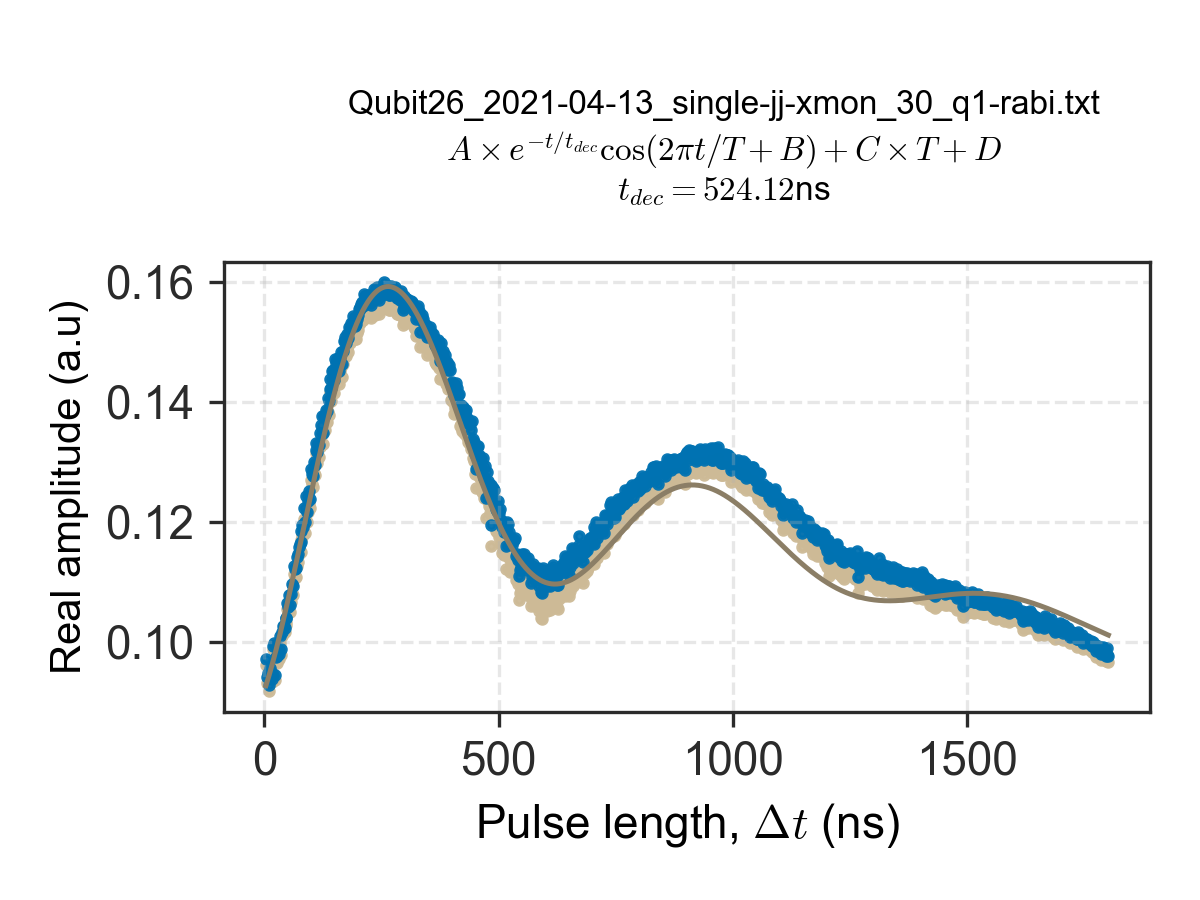

In [30]:
FILENAME = "/Users/CCCP/creamy_seas/monday_starts_on_saturday/lab-results/2021-04-09_single-jj-xmon/Qubit26_2021-04-13_single-jj-xmon_30_q1-rabi.txt"
t_dec = 1000
T = 600
A = 0.1
B = 0
C = 0
D = 0.0035

# Fitting
data = np.loadtxt(FILENAME)
x_data = data[:,0]
y_data = data[:,1]
(popt, _)= curve_fit(
            rabi_model,
            x_data,
            y_data,
            [t_dec, T, A, B, C, D]
        )

# Plotting
fix, ax = plt.subplots(1, 1, figsize=(4,3))
ax.scatter(x_data, y_data, 
           color="#cdba96",
           marker="o",
           alpha=0.95
          )
ax.scatter(x_data, data[:,2], 
           color="C1",
           marker="o",
           alpha=0.95
          )
fitting, = ax.plot(x_data, rabi_model(x_data, *popt), color="#8b7e66")
ax.set_xlabel("Pulse length, $\Delta t$ (ns)", fontsize=11)
ax.set_ylabel("Real amplitude (a.u)", fontsize=10)
ax.set_title(f"""
    {FILENAME.split("/")[-1]}
    $A\\times e^{{-t/t_{{dec}}}}\cos(2\pi{{t}}/T + B) + C\\times{{T}} + D$
    $t_{{dec}} = {popt[0]:.2f}$ns
    """
    ,fontsize=8)
plt.tight_layout()

# Interactive plot
def update(t_dec: float, T: float, A: float, B: float, C: float, D: float):
    
    (popt, _)= curve_fit(
            rabi_model,
            x_data,
            y_data,
            [t_dec, T, A, B, C, D]
        )
    print(popt)
    ax.set_title(f"""
        {FILENAME.split("/")[-1]}
        $A\\times e^{{-t/t_{{dec}}}}\cos(2\pi{{t}}/T + B) + C\\times{{T}} + D$
        $t_{{dec}} = {popt[0]:.2f}$ns
        """
        ,fontsize=8)
    fitting.set_ydata(rabi_model(x_data, *popt))

In [31]:
CONTINUOUS_UPDATE = True
t_dec_widget = ipywidgets.FloatSlider(
    min=1, max=100, step=0.1,
    description="$t_{dec}$ (ns)", value=t_dec,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
t_dec_widget.style.handle_color = 'red'

T_widget = ipywidgets.FloatSlider(
    min=0.1, max=100, step=0.1,
    description="$T$ (nd)", value=T,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
T_widget.style.handle_color = 'red'

A_widget = ipywidgets.FloatSlider(
    min=0, max=2, step=0.01,
    description="A", value=A,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
B_widget = ipywidgets.FloatSlider(
    min=0, max=2*np.pi, step=0.01,
    description="B", value=B,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
C_widget = ipywidgets.FloatSlider(
    min=0, max=0.1, step=0.0001,
    description="C", value=C,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
D_widget = ipywidgets.FloatSlider(
    min=0, max=0.1, step=0.0001,
    description="D", value=D,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)


ui = ipywidgets.GridspecLayout(6, 1)
ui[0,:] = t_dec_widget
ui[1,:] = T_widget
ui[2,:] = A_widget
ui[3,:] = B_widget
ui[4,:] = C_widget
ui[5,:] = D_widget

out = ipywidgets.interactive_output(
    update,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "t_dec": t_dec_widget,
        "T": T_widget,
        "A": A_widget,
        "B": B_widget,
        "C": C_widget,
        "D": D_widget
    }
)  

display(ui, out)

GridspecLayout(children=(FloatSlider(value=100.0, description='$t_{dec}$ (ns)', layout=Layout(grid_area='widge…

Output()

<IPython.core.display.Javascript object>


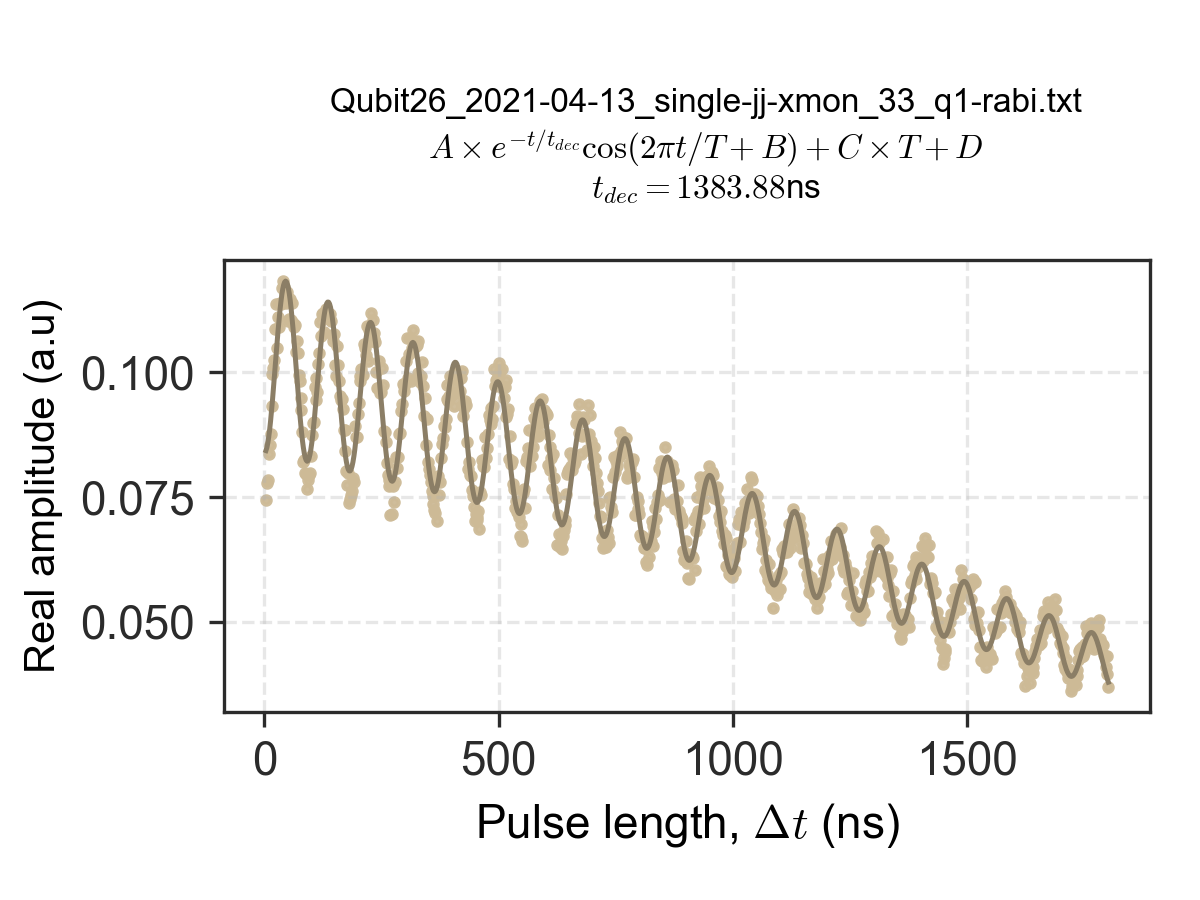

In [34]:
FILENAME = "/Users/CCCP/creamy_seas/monday_starts_on_saturday/lab-results/2021-04-09_single-jj-xmon/Qubit26_2021-04-13_single-jj-xmon_33_q1-rabi.txt"
t_dec = 1000
T = 100
A = 0.1
B = 0
C = 0
D = 0.0035

# Fitting
data = np.loadtxt(FILENAME)
x_data = data[:,0]
y_data = data[:,1]
(popt, _)= curve_fit(
            rabi_model,
            x_data,
            y_data,
            [t_dec, T, A, B, C, D]
        )

# Plotting
fix, ax = plt.subplots(1, 1, figsize=(4,3))
ax.scatter(x_data, y_data, 
           color="#cdba96",
           marker="o",
           alpha=0.95
          )
fitting, = ax.plot(x_data, rabi_model(x_data, *popt), color="#8b7e66")
ax.set_xlabel("Pulse length, $\Delta t$ (ns)", fontsize=11)
ax.set_ylabel("Real amplitude (a.u)", fontsize=10)
ax.set_title(f"""
    {FILENAME.split("/")[-1]}
    $A\\times e^{{-t/t_{{dec}}}}\cos(2\pi{{t}}/T + B) + C\\times{{T}} + D$
    $t_{{dec}} = {popt[0]:.2f}$ns
    """
    ,fontsize=8)
plt.tight_layout()

# Interactive plot
def update(t_dec: float, T: float, A: float, B: float, C: float, D: float):
    
    (popt, _)= curve_fit(
            rabi_model,
            x_data,
            y_data,
            [t_dec, T, A, B, C, D]
        )
    print(popt)
    ax.set_title(f"""
        {FILENAME.split("/")[-1]}
        $A\\times e^{{-t/t_{{dec}}}}\cos(2\pi{{t}}/T + B) + C\\times{{T}} + D$
        $t_{{dec}} = {popt[0]:.2f}$ns
        """
        ,fontsize=8)
    fitting.set_ydata(rabi_model(x_data, *popt))

In [ ]:
CONTINUOUS_UPDATE = True
t_dec_widget = ipywidgets.FloatSlider(
    min=1, max=100, step=0.1,
    description="$t_{dec}$ (ns)", value=t_dec,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
t_dec_widget.style.handle_color = 'red'

T_widget = ipywidgets.FloatSlider(
    min=0.1, max=100, step=0.1,
    description="$T$ (nd)", value=T,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
T_widget.style.handle_color = 'red'

A_widget = ipywidgets.FloatSlider(
    min=0, max=2, step=0.01,
    description="A", value=A,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
B_widget = ipywidgets.FloatSlider(
    min=0, max=2*np.pi, step=0.01,
    description="B", value=B,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
C_widget = ipywidgets.FloatSlider(
    min=0, max=0.1, step=0.0001,
    description="C", value=C,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
D_widget = ipywidgets.FloatSlider(
    min=0, max=0.1, step=0.0001,
    description="D", value=D,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)


ui = ipywidgets.GridspecLayout(6, 1)
ui[0,:] = t_dec_widget
ui[1,:] = T_widget
ui[2,:] = A_widget
ui[3,:] = B_widget
ui[4,:] = C_widget
ui[5,:] = D_widget

out = ipywidgets.interactive_output(
    update,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "t_dec": t_dec_widget,
        "T": T_widget,
        "A": A_widget,
        "B": B_widget,
        "C": C_widget,
        "D": D_widget
    }
)  

display(ui, out)

### Fitting sweep data: File 37

#### Real

In [410]:
# Initial parameters
FILENAME = "/Users/CCCP/creamy_seas/monday_starts_on_saturday/lab-results/2021-04-09_single-jj-xmon/Qubit26_2021-04-13_single-jj-xmon_37_q1-rabi-freq-sweep_-30dBmVNA_10dBmGEN_real.txt"
with open(FILENAME) as fin:
    data = np.loadtxt(FILENAME)
    
    first_line = fin.readline().split()
    f_range = [float(first_line[1]), float(first_line[2]), data.shape[0]]
    
    second_line = fin.readline().split()
    y_range = [float(second_line[1]), float(second_line[2]), data.shape[1]]    

t_data = np.linspace(*y_range)
f_data = np.linspace(*f_range)
fit_data = {}

<IPython.core.display.Javascript object>


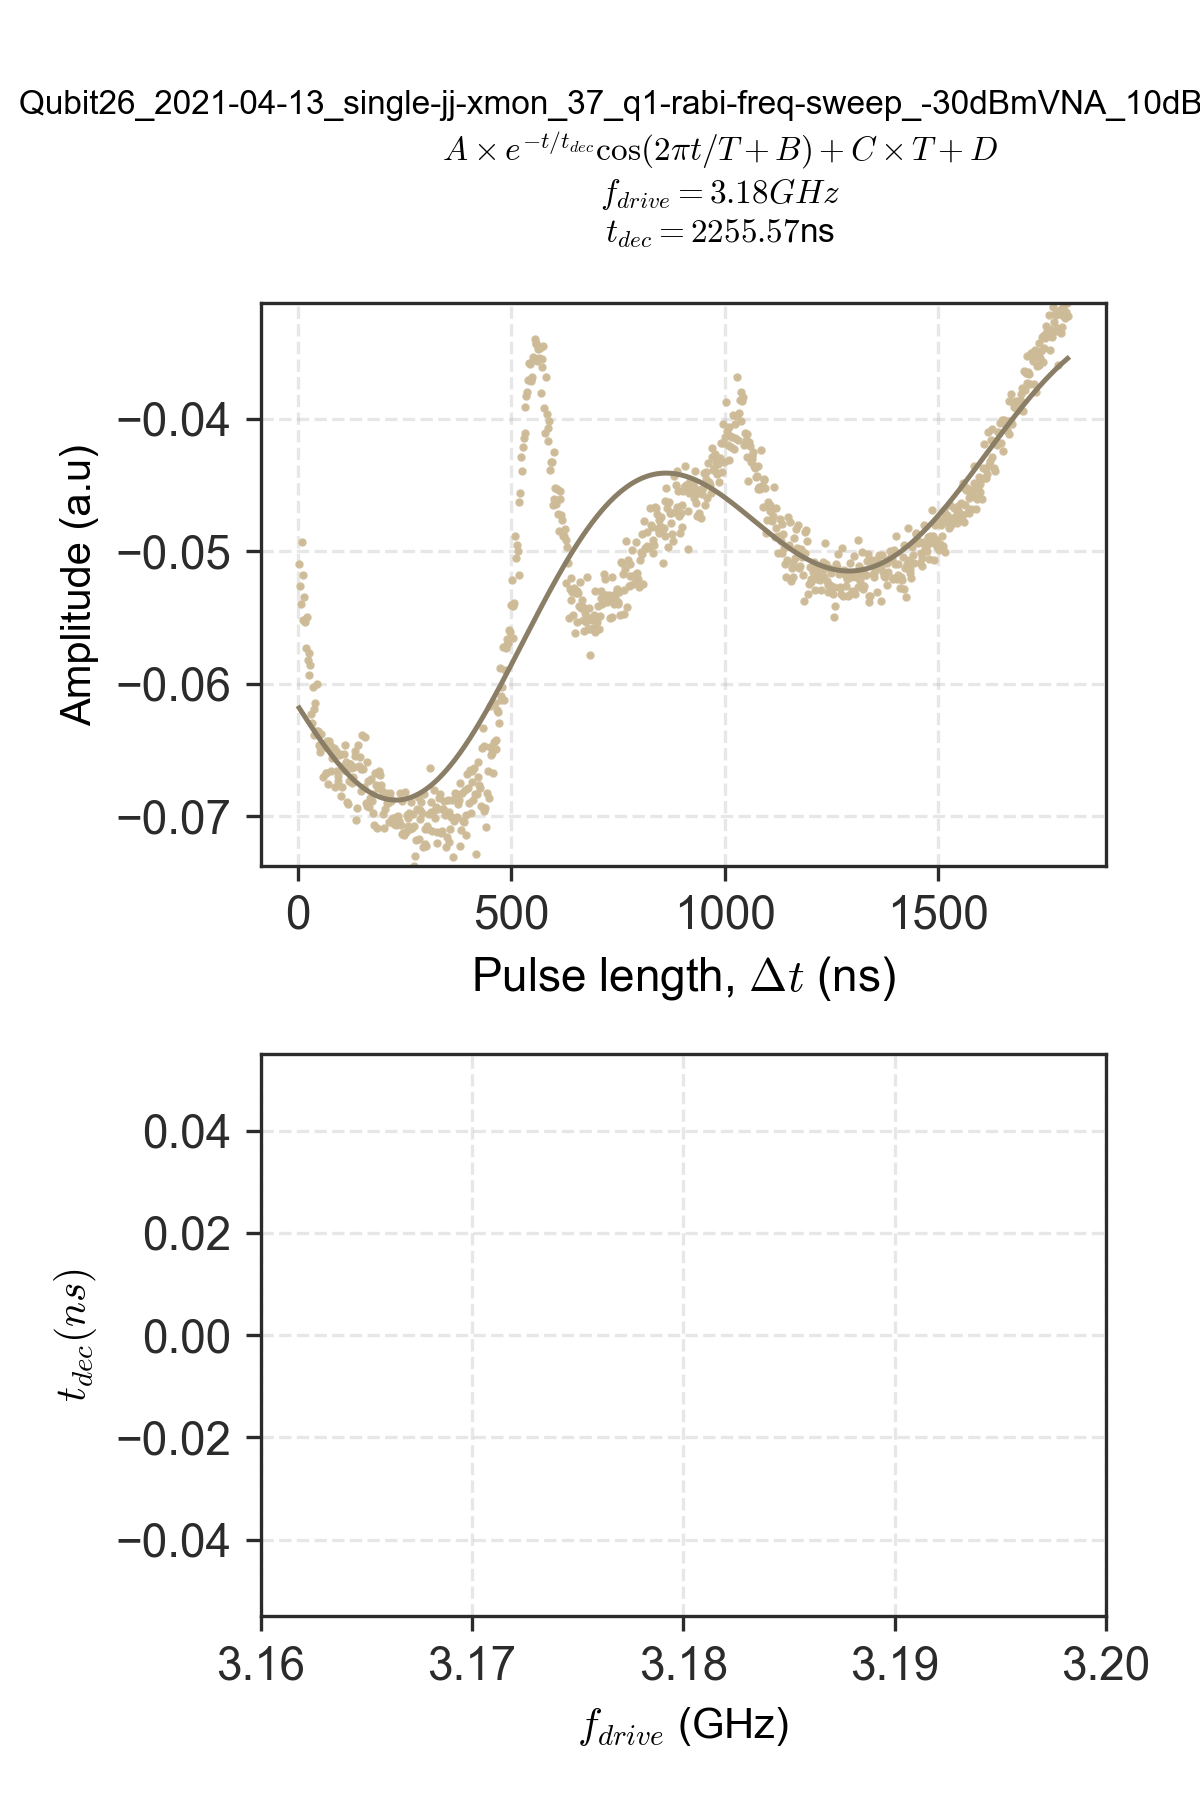

In [411]:
# Initial Guess
INDEX = 0
t_dec = 100
T = 100
A = 0.1
B = 0
C = 0
D = 0.0035

# Fitting
y_data = data[INDEX]
(popt, _)= curve_fit(
            rabi_model,
            t_data,
            y_data,
            [t_dec, T, A, B, C, D]
        )

# Plotting
fix, ax = plt.subplots(2, 1, figsize=(4,6))
raw, = ax[0].plot(t_data, y_data, 
           color="#cdba96",
           marker=".",
           alpha=0.95,
            linestyle=''
          )
fitting, = ax[0].plot(t_data, rabi_model(t_data, *popt), color="#8b7e66")
ax[0].set_xlabel("Pulse length, $\Delta t$ (ns)", fontsize=11)
ax[0].set_ylabel("Amplitude (a.u)", fontsize=10)
ax[0].set_title(f"""
    {FILENAME.split("/")[-1]}
    $A\\times e^{{-t/t_{{dec}}}}\cos(2\pi{{t}}/T + B) + C\\times{{T}} + D$
    $f_{{drive}} = {f_data[INDEX]/GHz}GHz$ 
    $t_{{dec}} = {popt[0]:.2f}$ns
    """
    ,fontsize=8)

ax[1].set_xlabel("$f_{drive}$ (GHz)", fontsize=10)
ax[1].set_ylabel("$t_{dec} (ns)$", fontsize=10)
ax[1].set_xlim(f_range[0]/GHz, f_range[1]/GHz)
param_plot, = ax[1].plot([], [], marker="o", linestyle='')
plt.tight_layout()

# Interactivity
def update(t_dec: float, T: float, A: float, B: float, C: float, D: float, INDEX: int):
    y_data = data[INDEX]
    (popt, _)= curve_fit(
            rabi_model,
            t_data,
            y_data,
            [t_dec, T, A, B, C, D]
        )
    ax[0].set_title(f"""
        {FILENAME.split("/")[-1]}
        $A\\times e^{{-t/t_{{dec}}}}\cos(2\pi{{t}}/T + B) + C\\times{{T}} + D$
        $f_{{drive}} = {f_data[INDEX]/GHz}GHz$ 
        $t_{{dec}} = {popt[0]:.2f}$ns
        """,fontsize=8)
    fitting.set_ydata(rabi_model(t_data, *popt))
    raw.set_ydata(y_data)
    ax[0].set_ylim([min(y_data), max(y_data)])
    return popt

In [412]:
def save_fit(_):
    # Run fit with current parameters and update the dictionary
    t_dec = t_dec_widget.value; T = T_widget.value; A = A_widget.value; B = B_widget.value; C = C_widget.value; D = D_widget.value; INDEX = INDEX_widget.value

    fit_data[INDEX] = update(t_dec, T, A, B, C, D, INDEX)
    
    unpacked_fit_data = np.array([[f_data[k], v[0]] for k, v in fit_data.items()])
    unpacked_f = unpacked_fit_data[:, 0]/GHz
    unpacked_t_dec = unpacked_fit_data[:, 1]

    param_plot.set_data(unpacked_f, unpacked_t_dec)
    ax[1].relim()
    ax[1].autoscale_view()
    print("Saved!")
    
CONTINUOUS_UPDATE = True
t_dec_widget = ipywidgets.FloatSlider(
    min=1, max=10000,
    description="$t_{dec}$ (ns)", value=t_dec,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
t_dec_widget.style.handle_color = 'red'

T_widget = ipywidgets.FloatSlider(
    min=0.1, max=1000, step=0.1,
    description="$T$ (nd)", value=T,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
T_widget.style.handle_color = 'red'

A_widget = ipywidgets.FloatSlider(
    min=0, max=2, step=0.01,
    description="A", value=A,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
B_widget = ipywidgets.FloatSlider(
    min=0, max=2*np.pi, step=0.01,
    description="B", value=B,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
C_widget = ipywidgets.FloatSlider(
    min=0, max=0.1, step=0.0001,
    description="C", value=C,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
D_widget = ipywidgets.FloatSlider(
    min=0, max=0.1, step=0.0001,
    description="D", value=D,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
INDEX_widget = ipywidgets.IntSlider(
    min=0, max=len(f_data),
    description="idx", value=INDEX,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
INDEX_widget.style.handle_color = 'blue'

save_widget = ipywidgets.Button(
    description='Save Parameters',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    icon='arrow-down' # (FontAwesome names without the `fa-` prefix),
)
save_widget.on_click(save_fit)

ui = ipywidgets.GridspecLayout(8, 1)
ui[0,:] = t_dec_widget
ui[1,:] = T_widget
ui[2,:] = A_widget
ui[3,:] = B_widget
ui[4,:] = C_widget
ui[5,:] = D_widget
ui[6,:] = INDEX_widget
ui[7,:] = save_widget

out = ipywidgets.interactive_output(
    update,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "t_dec": t_dec_widget,
        "T": T_widget,
        "A": A_widget,
        "B": B_widget,
        "C": C_widget,
        "D": D_widget,
        "INDEX": INDEX_widget
    }
)  

display(ui, out)

GridspecLayout(children=(FloatSlider(value=100.0, description='$t_{dec}$ (ns)', layout=Layout(grid_area='widge…

Output()

<IPython.core.display.Javascript object>


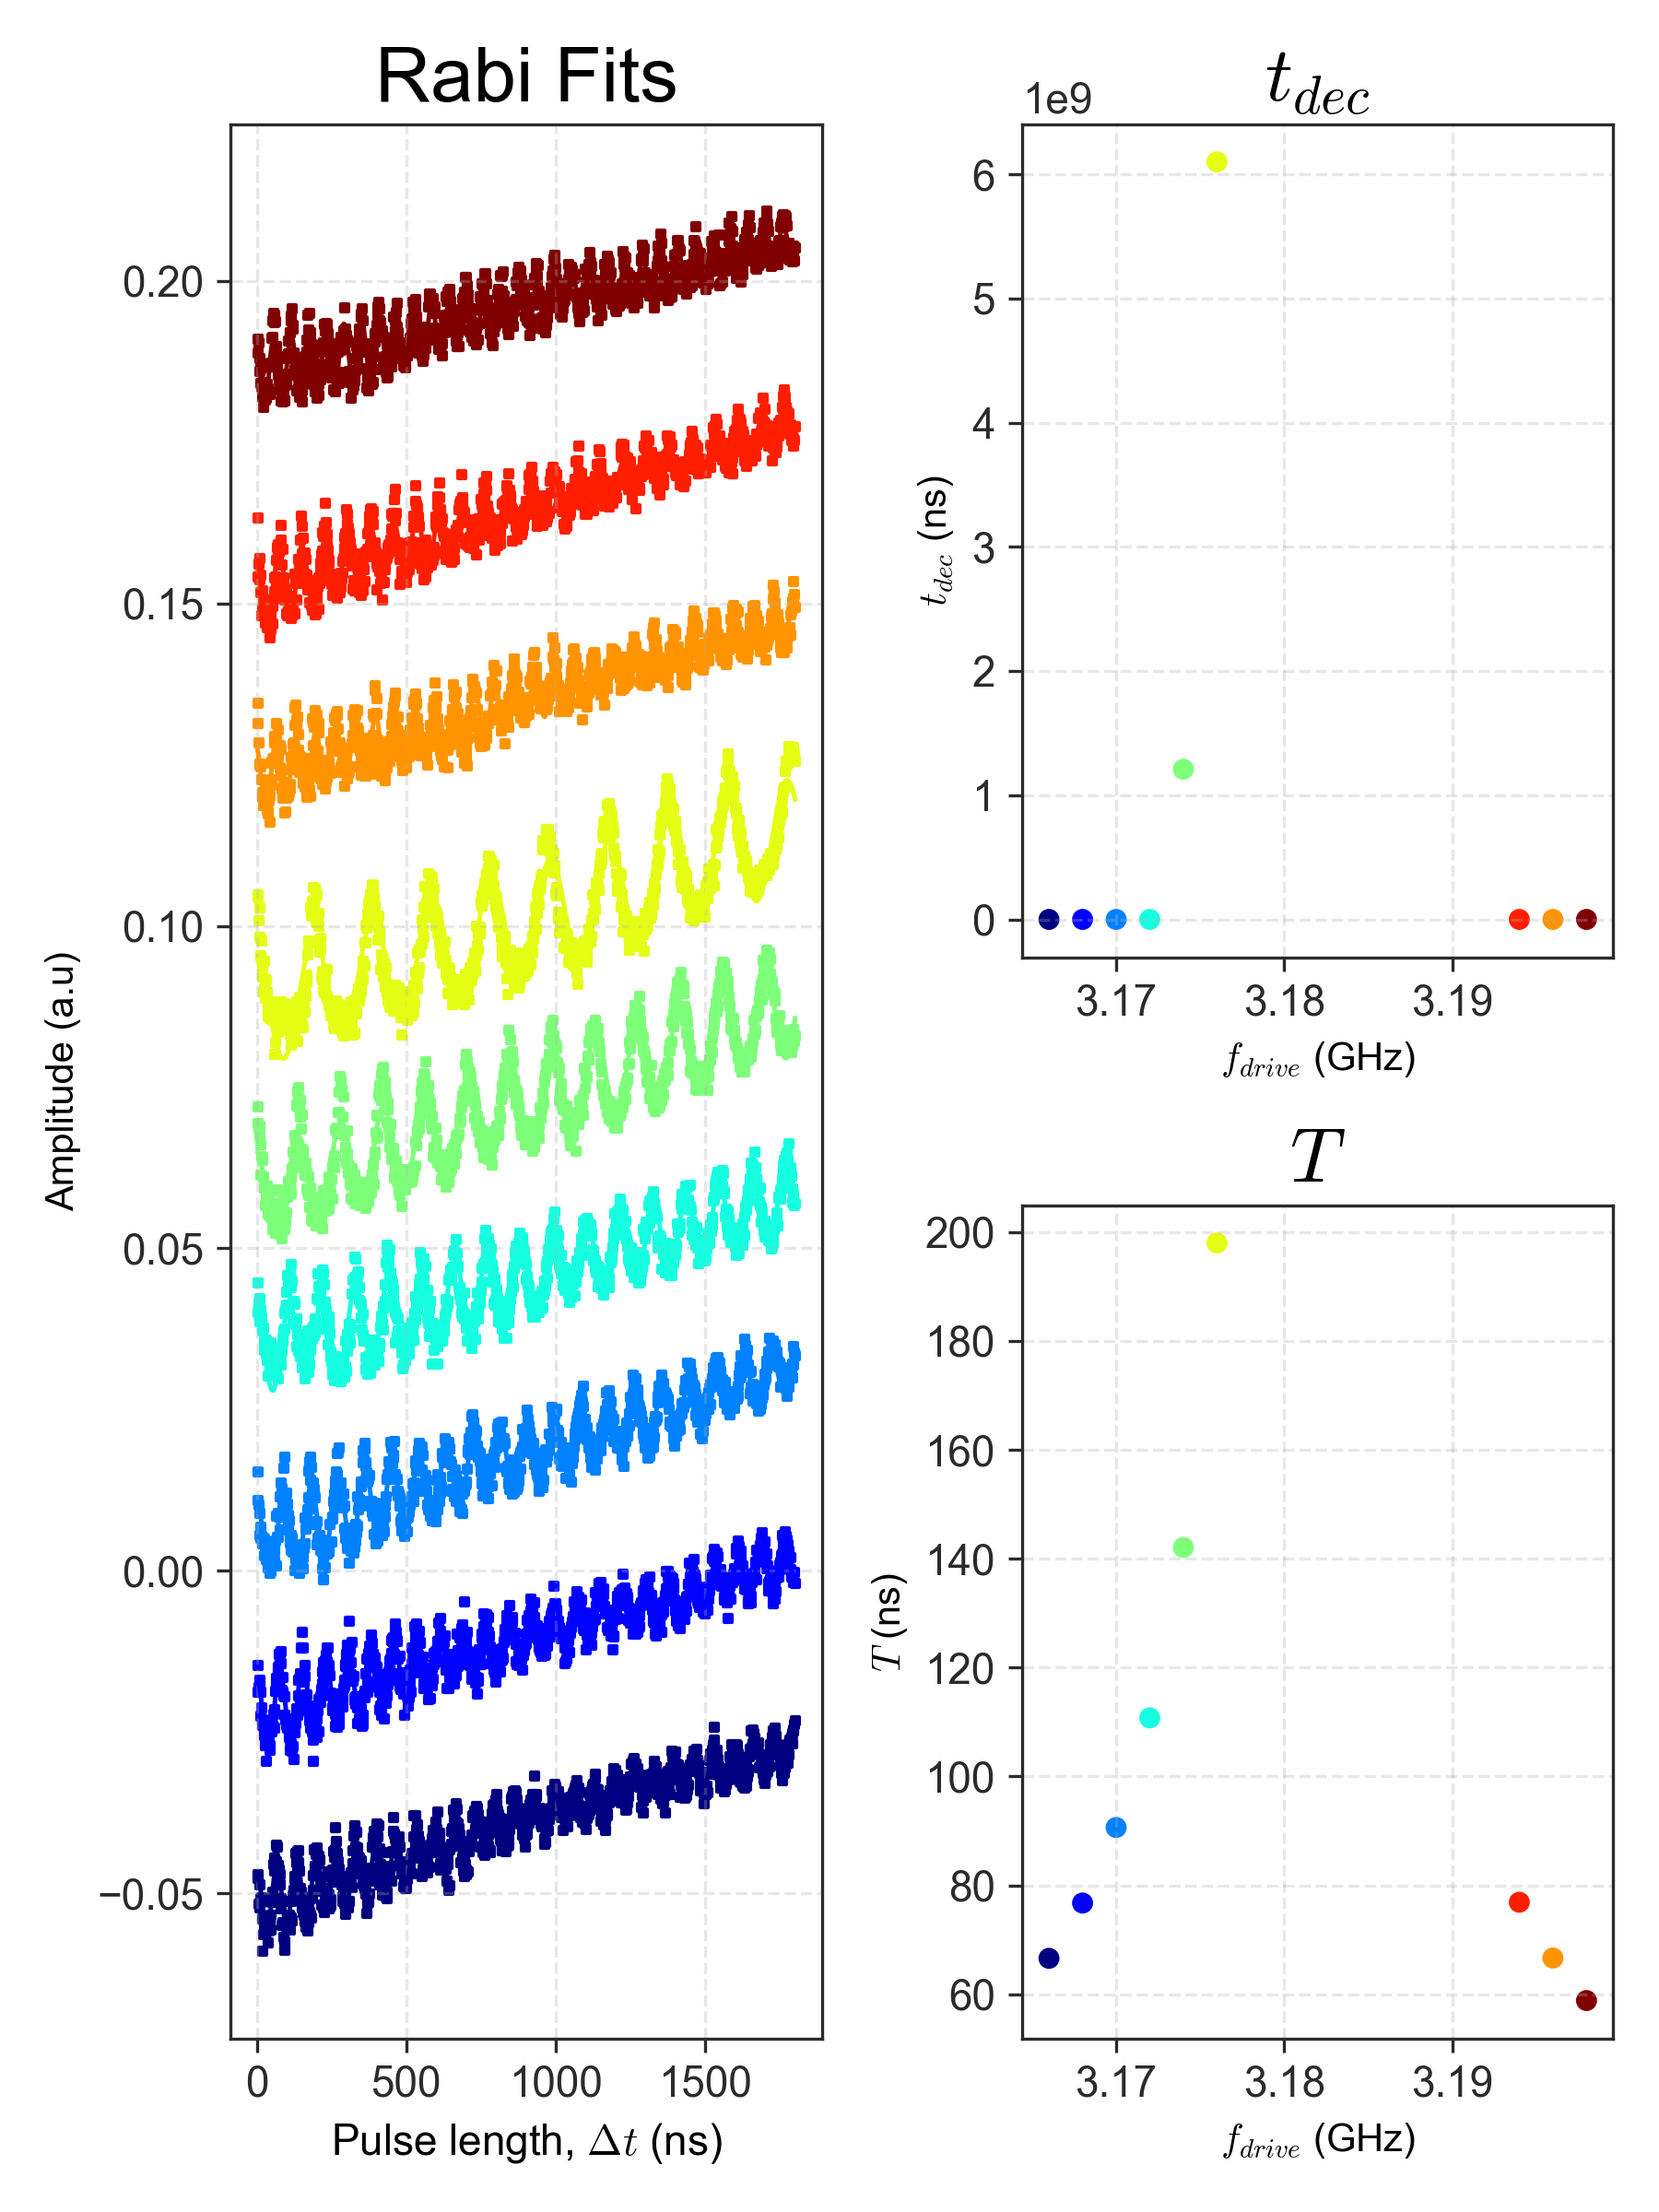

In [363]:
# Summarise the fittings:
SPACING = 0.03
cmap = plt.cm.jet(np.linspace(0, 1, len(fit_data)))

# Plot T, t_dec for different frequencies and the rabi plots
# fix, ax = plt.subplots(3, 1, figsize=(4,9))
plt.figure(figsize=(6, 8))
gs = gridspec.GridSpec(2, 2)

ax0 = plt.subplot(gs[:, 0])
ax0.set_title("Rabi Fits")
ax0.set_xlabel("Pulse length, $\Delta t$ (ns)", fontsize=11)
ax0.set_ylabel("Amplitude (a.u)", fontsize=10)

ax1 = plt.subplot(gs[0, 1])
ax1.set_title("$t_{dec}$")
ax1.set_xlabel("$f_{drive}$ (GHz)", fontsize=10)
ax1.set_ylabel("$t_{dec}$ (ns)", fontsize=10)

ax2 = plt.subplot(gs[1, 1])
ax2.set_title("$T$")
ax2.set_xlabel("$f_{drive}$ (GHz)", fontsize=10)
ax2.set_ylabel("$T$ (ns)", fontsize=10)

# Plot Rabi
for i, (idx, val) in enumerate(fit_data.items()):
    ax0.plot(t_data, i * SPACING + rabi_model(t_data, *val), color=cmap[i])
    ax0.scatter(t_data, i * SPACING + data[idx], marker=',', color=cmap[i])
    
# Plot t_dec and T
unpacked_fit_data = np.array([[f_data[k], v[0], v[1]] for k, v in fit_data.items()])
unpacked_f = unpacked_fit_data[:, 0] / GHz
ax1.scatter(unpacked_f, unpacked_fit_data[:, 1], marker='o', s=20, color=cmap) 
ax2.scatter(unpacked_f, unpacked_fit_data[:, 2], marker='o', s=20, color=cmap) 

plt.tight_layout()
plt.savefig(FILENAME.replace("txt", "pdf"))

#### Imaginary

In [395]:
# Initial parameters
FILENAME = "/Users/CCCP/creamy_seas/monday_starts_on_saturday/lab-results/2021-04-09_single-jj-xmon/Qubit26_2021-04-13_single-jj-xmon_37_q1-rabi-freq-sweep_-30dBmVNA_10dBmGEN_imaginary.txt"
with open(FILENAME) as fin:
    data = np.loadtxt(FILENAME)
    
    first_line = fin.readline().split()
    f_range = [float(first_line[1]), float(first_line[2]), data.shape[0]]
    
    second_line = fin.readline().split()
    y_range = [float(second_line[1]), float(second_line[2]), data.shape[1]]    

t_data = np.linspace(*y_range)
f_data = np.linspace(*f_range)
fit_data = {}

<IPython.core.display.Javascript object>


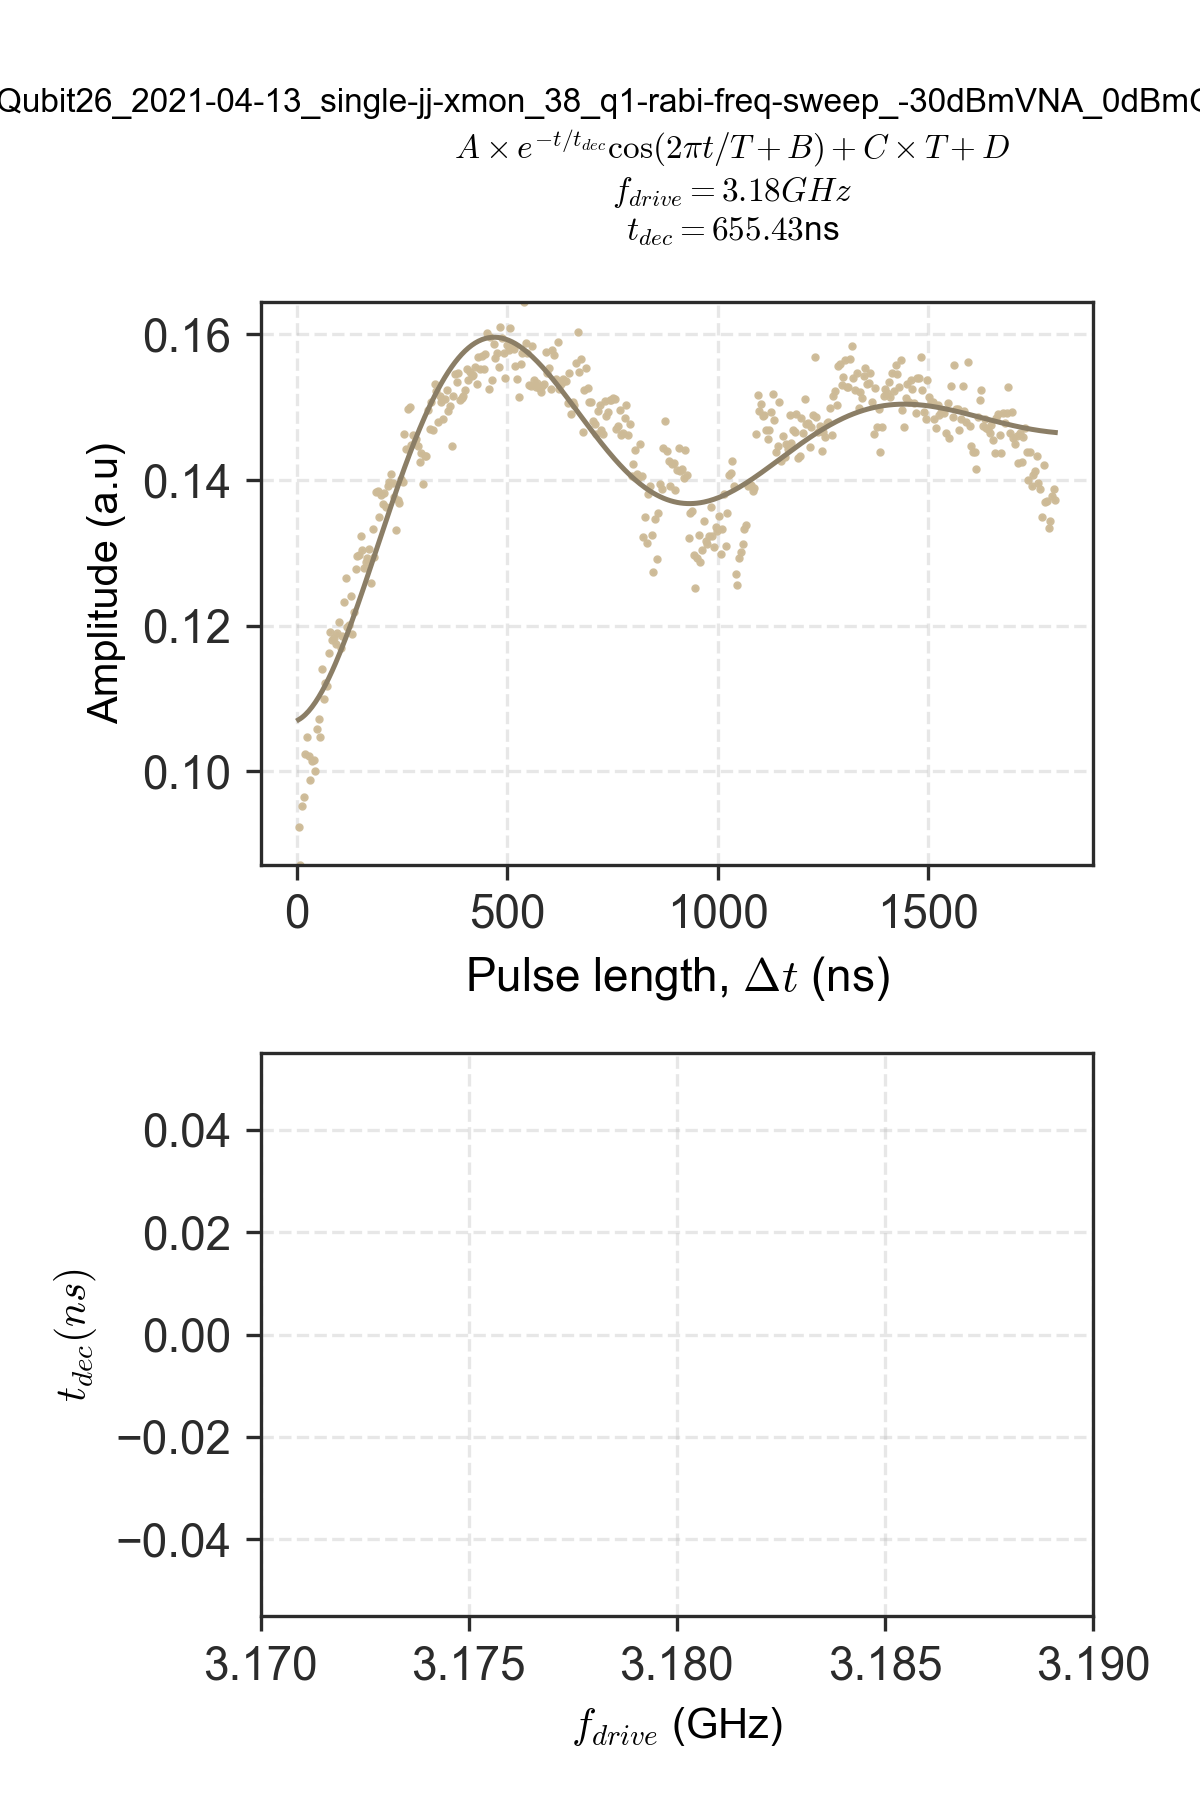

In [408]:
# Initial Guess
INDEX = 0
t_dec = 100
T = 100
A = 0.1
B = 0
C = 0
D = 0.0035

# Fitting
y_data = data[INDEX]
(popt, _)= curve_fit(
            rabi_model,
            t_data,
            y_data,
            [t_dec, T, A, B, C, D]
        )

# Plotting
fix, ax = plt.subplots(2, 1, figsize=(4,6))
raw, = ax[0].plot(t_data, y_data, 
           color="#cdba96",
           marker=".",
           alpha=0.95,
            linestyle=''
          )
fitting, = ax[0].plot(t_data, rabi_model(t_data, *popt), color="#8b7e66")
ax[0].set_xlabel("Pulse length, $\Delta t$ (ns)", fontsize=11)
ax[0].set_ylabel("Amplitude (a.u)", fontsize=10)
ax[0].set_title(f"""
    {FILENAME.split("/")[-1]}
    $A\\times e^{{-t/t_{{dec}}}}\cos(2\pi{{t}}/T + B) + C\\times{{T}} + D$
    $f_{{drive}} = {f_data[INDEX]/GHz}GHz$ 
    $t_{{dec}} = {popt[0]:.2f}$ns
    """
    ,fontsize=8)

ax[1].set_xlabel("$f_{drive}$ (GHz)", fontsize=10)
ax[1].set_ylabel("$t_{dec} (ns)$", fontsize=10)
ax[1].set_xlim(f_range[0]/GHz, f_range[1]/GHz)
param_plot, = ax[1].plot([], [], marker="o", linestyle='')
plt.tight_layout()

# Interactivity
def update(t_dec: float, T: float, A: float, B: float, C: float, D: float, INDEX: int):
    y_data = data[INDEX]
    
    try:
        (popt, _)= curve_fit(
                rabi_model,
                t_data,
                y_data,
                [t_dec, T, A, B, C, D]
            )
        ax[0].set_title(f"""
            {FILENAME.split("/")[-1]}
            $A\\times e^{{-t/t_{{dec}}}}\cos(2\pi{{t}}/T + B) + C\\times{{T}} + D$
            $f_{{drive}} = {f_data[INDEX]/GHz}GHz$ 
            $t_{{dec}} = {popt[0]:.2f}$ns
            """,fontsize=8)
        fitting.set_ydata(rabi_model(t_data, *popt))
    except RuntimeError as e:
        print(e)
    raw.set_ydata(y_data)
    ax[0].set_ylim([min(y_data), max(y_data)])
    return popt

In [409]:
def save_fit(_):
    # Run fit with current parameters and update the dictionary
    t_dec = t_dec_widget.value; T = T_widget.value; A = A_widget.value; B = B_widget.value; C = C_widget.value; D = D_widget.value; INDEX = INDEX_widget.value

    fit_data[INDEX] = update(t_dec, T, A, B, C, D, INDEX)
    
    unpacked_fit_data = np.array([[f_data[k], v[0]] for k, v in fit_data.items()])
    unpacked_f = unpacked_fit_data[:, 0]/GHz
    unpacked_t_dec = unpacked_fit_data[:, 1]

    param_plot.set_data(unpacked_f, unpacked_t_dec)
    ax[1].relim()
    ax[1].autoscale_view()
    print("Saved!")
    
CONTINUOUS_UPDATE = True
t_dec_widget = ipywidgets.FloatSlider(
    min=1, max=10000,
    description="$t_{dec}$ (ns)", value=t_dec,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
t_dec_widget.style.handle_color = 'red'

T_widget = ipywidgets.FloatSlider(
    min=0.1, max=1000, step=0.1,
    description="$T$ (nd)", value=T,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
T_widget.style.handle_color = 'red'

A_widget = ipywidgets.FloatSlider(
    min=0, max=2, step=0.01,
    description="A", value=A,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
B_widget = ipywidgets.FloatSlider(
    min=0, max=2*np.pi, step=0.01,
    description="B", value=B,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
C_widget = ipywidgets.FloatSlider(
    min=0, max=0.1, step=0.0001,
    description="C", value=C,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
D_widget = ipywidgets.FloatSlider(
    min=0, max=0.1, step=0.0001,
    description="D", value=D,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
INDEX_widget = ipywidgets.IntSlider(
    min=0, max=len(f_data),
    description="idx", value=INDEX,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
INDEX_widget.style.handle_color = 'blue'

save_widget = ipywidgets.Button(
    description='Save Parameters',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    icon='arrow-down' # (FontAwesome names without the `fa-` prefix),
)
save_widget.on_click(save_fit)

ui = ipywidgets.GridspecLayout(8, 1)
ui[0,:] = t_dec_widget
ui[1,:] = T_widget
ui[2,:] = A_widget
ui[3,:] = B_widget
ui[4,:] = C_widget
ui[5,:] = D_widget
ui[6,:] = INDEX_widget
ui[7,:] = save_widget

out = ipywidgets.interactive_output(
    update,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "t_dec": t_dec_widget,
        "T": T_widget,
        "A": A_widget,
        "B": B_widget,
        "C": C_widget,
        "D": D_widget,
        "INDEX": INDEX_widget
    }
)  

display(ui, out)

GridspecLayout(children=(FloatSlider(value=100.0, description='$t_{dec}$ (ns)', layout=Layout(grid_area='widge…

Output()

In [398]:
fit_data

{4: array([ 1.64072369e+03,  7.67417039e+01, -1.41227643e-02, -1.64520010e+00,
         2.87535806e-05, -8.54842591e-02]),
 5: array([ 1.51373145e+03,  9.05372712e+01,  1.66300853e-02,  1.50180500e+00,
         3.07144700e-05, -8.98985117e-02]),
 6: array([ 2.07180282e+03,  1.10625495e+02,  1.80326637e-02,  1.58335127e+00,
         3.01160204e-05, -9.47815756e-02]),
 7: array([ 2.47506418e+03,  1.41822818e+02,  1.99047377e-02,  1.62139592e+00,
         3.56616812e-05, -1.07112737e-01]),
 8: array([ 2.51784860e+03,  1.96996428e+02,  2.19091304e-02,  1.67407905e+00,
         3.56021504e-05, -1.14697107e-01]),
 17: array([ 1.21818819e+03,  7.68576857e+01, -1.40059355e-02, -1.34946008e+00,
         2.89409115e-05, -9.14152570e-02]),
 18: array([ 1.44967724e+03,  6.65708382e+01, -1.30568719e-02, -1.41867623e+00,
         2.70460943e-05, -8.83135962e-02])}

<IPython.core.display.Javascript object>


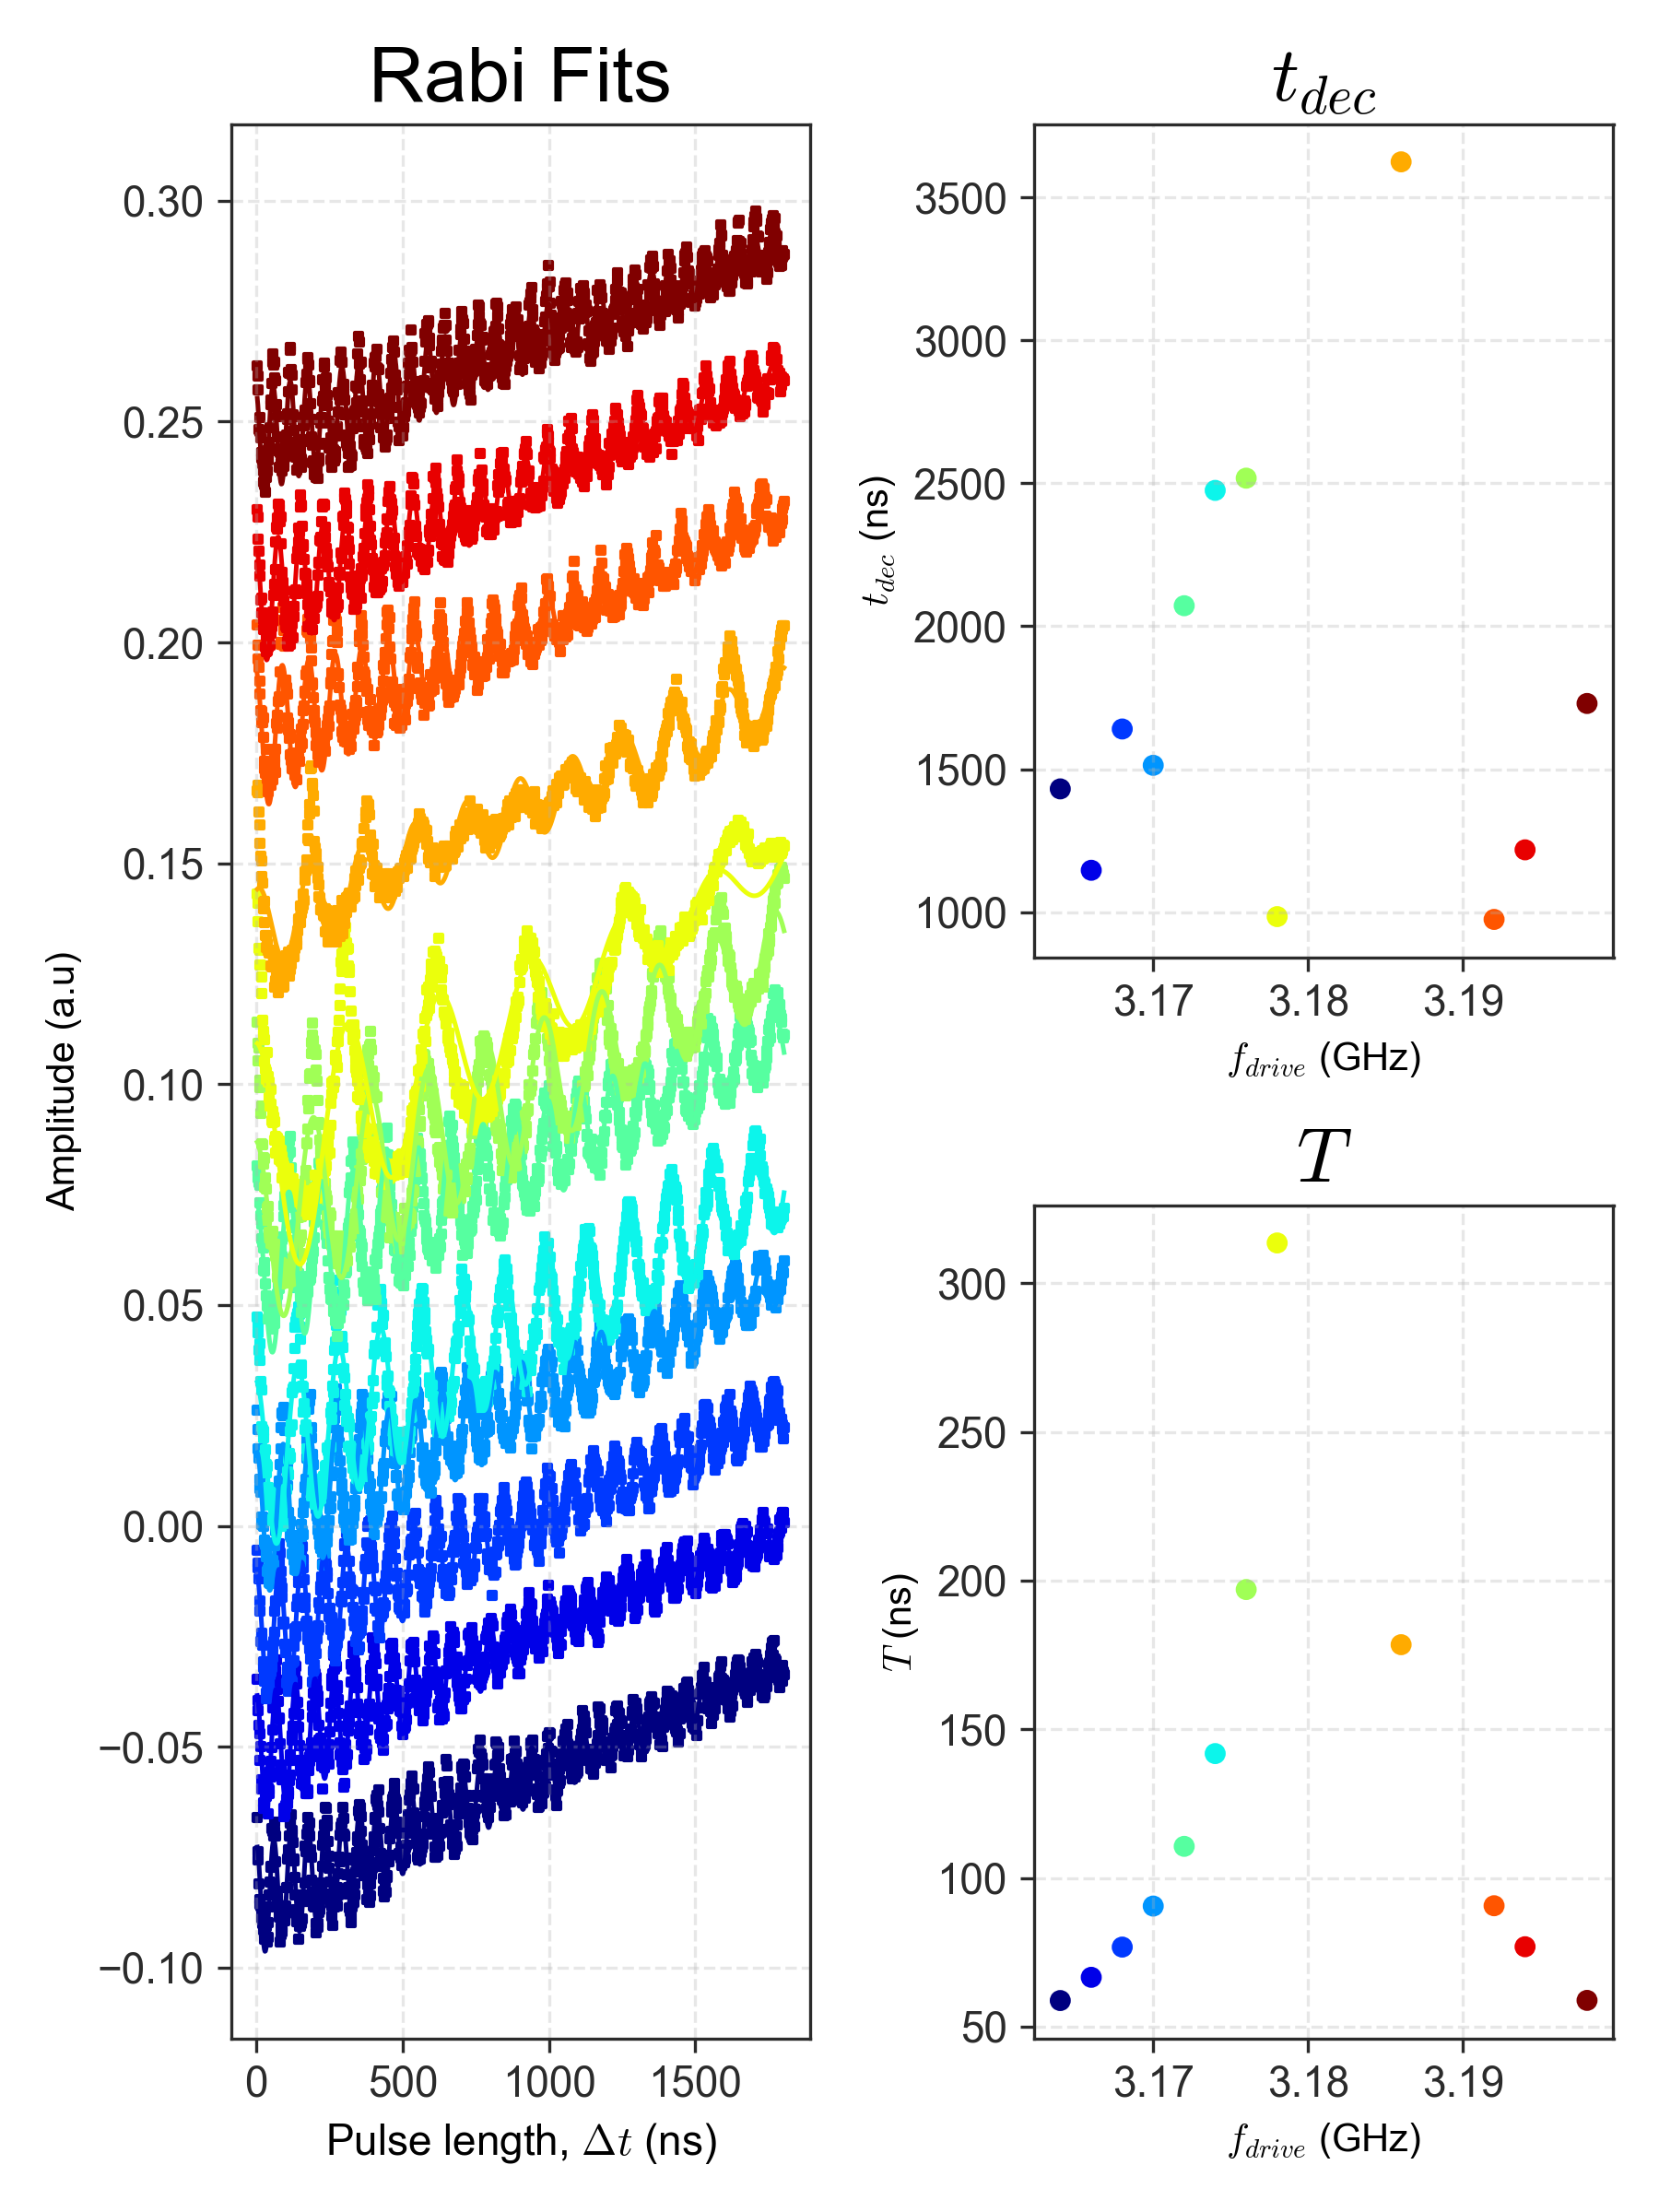

In [378]:
# Summarise the fittings:
SPACING = 0.03
cmap = plt.cm.jet(np.linspace(0, 1, len(fit_data)))

# Plot T, t_dec for different frequencies and the rabi plots
# fix, ax = plt.subplots(3, 1, figsize=(4,9))
plt.figure(figsize=(6, 8))
gs = gridspec.GridSpec(2, 2)

ax0 = plt.subplot(gs[:, 0])
ax0.set_title("Rabi Fits")
ax0.set_xlabel("Pulse length, $\Delta t$ (ns)", fontsize=11)
ax0.set_ylabel("Amplitude (a.u)", fontsize=10)

ax1 = plt.subplot(gs[0, 1])
ax1.set_title("$t_{dec}$")
ax1.set_xlabel("$f_{drive}$ (GHz)", fontsize=10)
ax1.set_ylabel("$t_{dec}$ (ns)", fontsize=10)

ax2 = plt.subplot(gs[1, 1])
ax2.set_title("$T$")
ax2.set_xlabel("$f_{drive}$ (GHz)", fontsize=10)
ax2.set_ylabel("$T$ (ns)", fontsize=10)

# Plot Rabi
for i, (idx, val) in enumerate(fit_data.items()):
    ax0.plot(t_data, i * SPACING + rabi_model(t_data, *val), color=cmap[i])
    ax0.scatter(t_data, i * SPACING + data[idx], marker=',', color=cmap[i])
    
# Plot t_dec and T
unpacked_fit_data = np.array([[f_data[k], v[0], v[1]] for k, v in fit_data.items()])
unpacked_f = unpacked_fit_data[:, 0] / GHz
ax1.scatter(unpacked_f, unpacked_fit_data[:, 1], marker='o', s=20, color=cmap) 
ax2.scatter(unpacked_f, unpacked_fit_data[:, 2], marker='o', s=20, color=cmap) 

plt.tight_layout()
plt.savefig(FILENAME.replace("txt", "pdf"))

#### Amplitude

In [379]:
# Initial parameters
FILENAME = "/Users/CCCP/creamy_seas/monday_starts_on_saturday/lab-results/2021-04-09_single-jj-xmon/Qubit26_2021-04-13_single-jj-xmon_37_q1-rabi-freq-sweep_-30dBmVNA_10dBmGEN_amplitude.txt"
with open(FILENAME) as fin:
    data = np.loadtxt(FILENAME)
    
    first_line = fin.readline().split()
    f_range = [float(first_line[1]), float(first_line[2]), data.shape[0]]
    
    second_line = fin.readline().split()
    y_range = [float(second_line[1]), float(second_line[2]), data.shape[1]]    

t_data = np.linspace(*y_range)
f_data = np.linspace(*f_range)
fit_data = {}

<IPython.core.display.Javascript object>


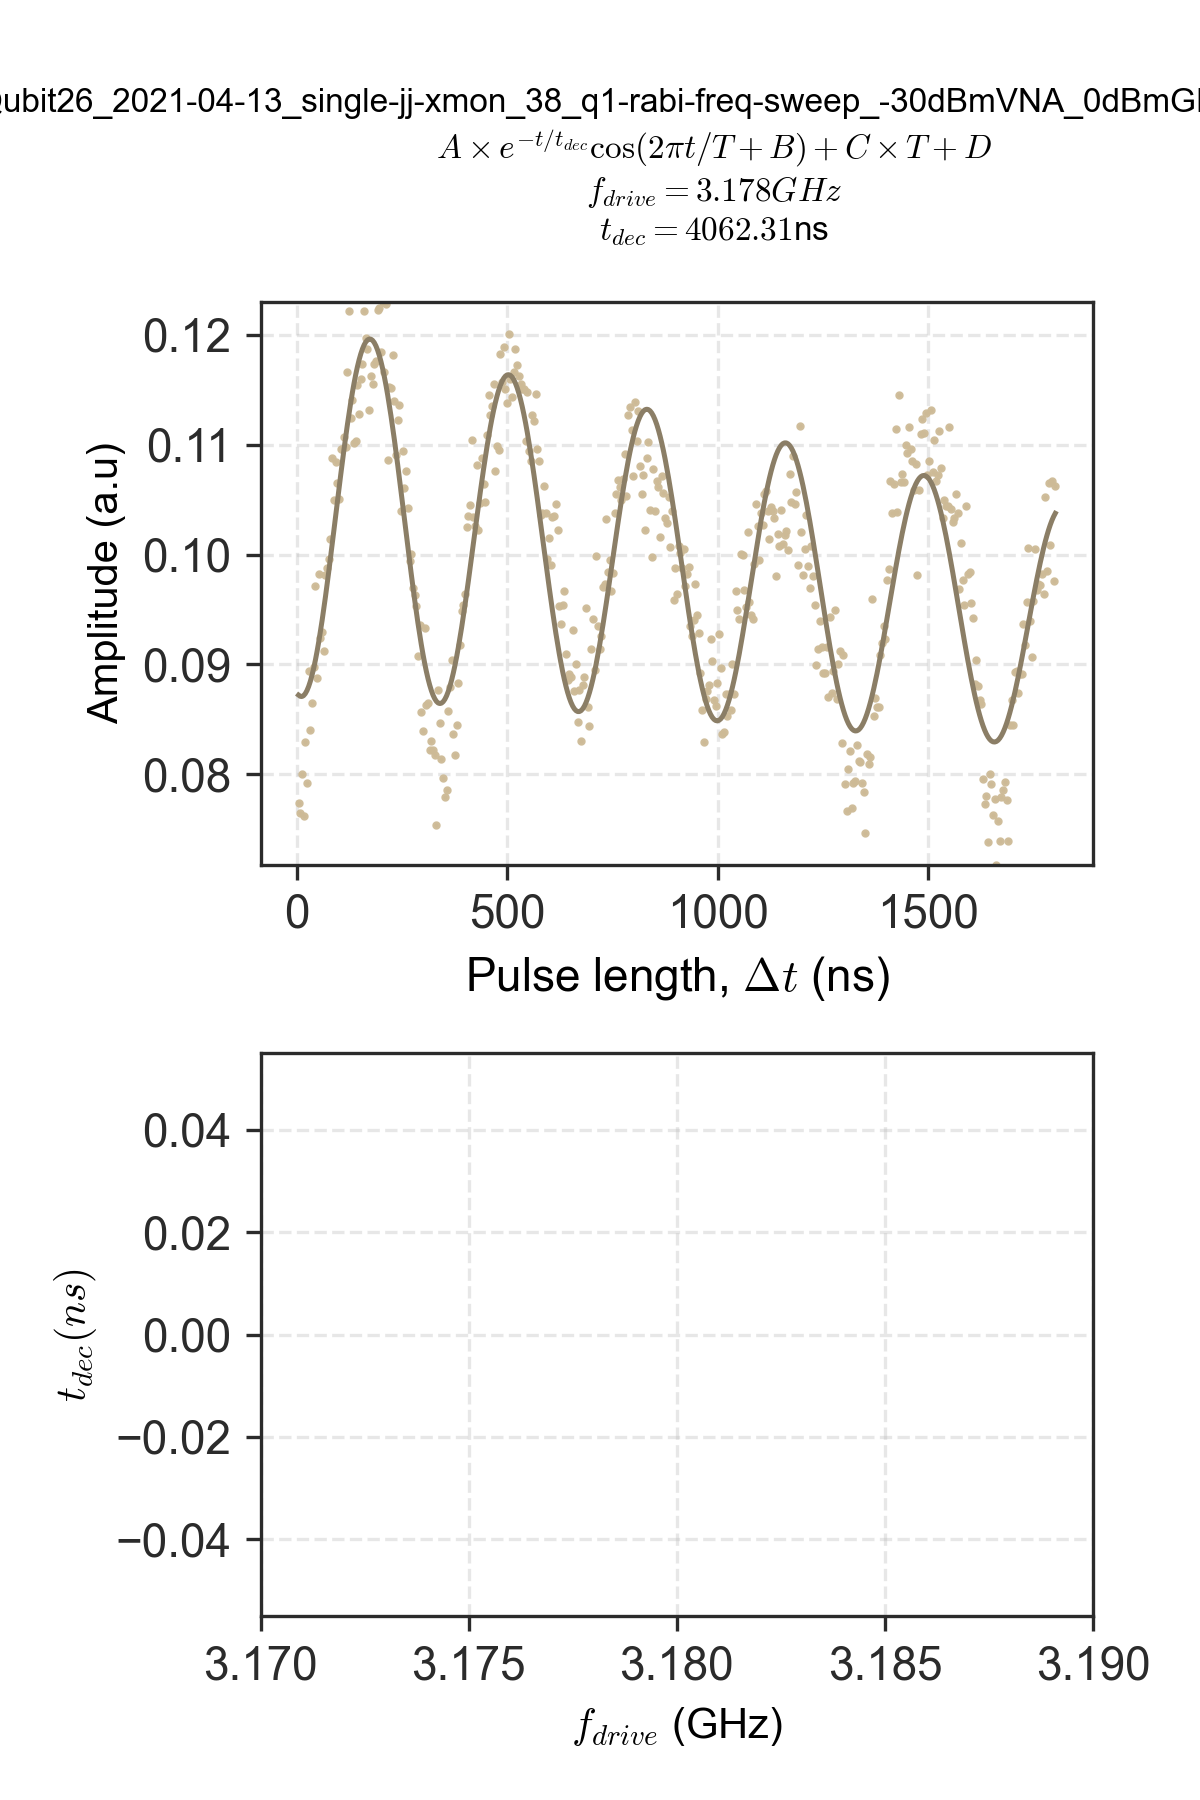

In [406]:
# Initial Guess
INDEX = 0
t_dec = 100
T = 100
A = 0.1
B = 0
C = 0
D = 0.0035

# Fitting
y_data = data[INDEX]
(popt, _)= curve_fit(
            rabi_model,
            t_data,
            y_data,
            [t_dec, T, A, B, C, D]
        )

# Plotting
fix, ax = plt.subplots(2, 1, figsize=(4,6))
raw, = ax[0].plot(t_data, y_data, 
           color="#cdba96",
           marker=".",
           alpha=0.95,
            linestyle=''
          )
fitting, = ax[0].plot(t_data, rabi_model(t_data, *popt), color="#8b7e66")
ax[0].set_xlabel("Pulse length, $\Delta t$ (ns)", fontsize=11)
ax[0].set_ylabel("Amplitude (a.u)", fontsize=10)
ax[0].set_title(f"""
    {FILENAME.split("/")[-1]}
    $A\\times e^{{-t/t_{{dec}}}}\cos(2\pi{{t}}/T + B) + C\\times{{T}} + D$
    $f_{{drive}} = {f_data[INDEX]/GHz}GHz$ 
    $t_{{dec}} = {popt[0]:.2f}$ns
    """
    ,fontsize=8)

ax[1].set_xlabel("$f_{drive}$ (GHz)", fontsize=10)
ax[1].set_ylabel("$t_{dec} (ns)$", fontsize=10)
ax[1].set_xlim(f_range[0]/GHz, f_range[1]/GHz)
param_plot, = ax[1].plot([], [], marker="o", linestyle='')
plt.tight_layout()

# Interactivity
def update(t_dec: float, T: float, A: float, B: float, C: float, D: float, INDEX: int):
    y_data = data[INDEX]
    (popt, _)= curve_fit(
            rabi_model,
            t_data,
            y_data,
            [t_dec, T, A, B, C, D]
        )
    ax[0].set_title(f"""
        {FILENAME.split("/")[-1]}
        $A\\times e^{{-t/t_{{dec}}}}\cos(2\pi{{t}}/T + B) + C\\times{{T}} + D$
        $f_{{drive}} = {f_data[INDEX]/GHz}GHz$ 
        $t_{{dec}} = {popt[0]:.2f}$ns
        """,fontsize=8)
    fitting.set_ydata(rabi_model(t_data, *popt))
    raw.set_ydata(y_data)
    ax[0].set_ylim([min(y_data), max(y_data)])
    return popt

In [407]:
def save_fit(_):
    # Run fit with current parameters and update the dictionary
    t_dec = t_dec_widget.value; T = T_widget.value; A = A_widget.value; B = B_widget.value; C = C_widget.value; D = D_widget.value; INDEX = INDEX_widget.value

    fit_data[INDEX] = update(t_dec, T, A, B, C, D, INDEX)
    
    unpacked_fit_data = np.array([[f_data[k], v[0]] for k, v in fit_data.items()])
    unpacked_f = unpacked_fit_data[:, 0]/GHz
    unpacked_t_dec = unpacked_fit_data[:, 1]

    param_plot.set_data(unpacked_f, unpacked_t_dec)
    ax[1].relim()
    ax[1].autoscale_view()
    print("Saved!")
    
CONTINUOUS_UPDATE = True
t_dec_widget = ipywidgets.FloatSlider(
    min=1, max=10000,
    description="$t_{dec}$ (ns)", value=t_dec,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
t_dec_widget.style.handle_color = 'red'

T_widget = ipywidgets.FloatSlider(
    min=0.1, max=1000, step=0.1,
    description="$T$ (nd)", value=T,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
T_widget.style.handle_color = 'red'

A_widget = ipywidgets.FloatSlider(
    min=0, max=2, step=0.01,
    description="A", value=A,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
B_widget = ipywidgets.FloatSlider(
    min=0, max=2*np.pi, step=0.01,
    description="B", value=B,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
C_widget = ipywidgets.FloatSlider(
    min=0, max=0.1, step=0.0001,
    description="C", value=C,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
D_widget = ipywidgets.FloatSlider(
    min=0, max=0.1, step=0.0001,
    description="D", value=D,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
INDEX_widget = ipywidgets.IntSlider(
    min=0, max=len(f_data),
    description="idx", value=INDEX,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
INDEX_widget.style.handle_color = 'blue'

save_widget = ipywidgets.Button(
    description='Save Parameters',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    icon='arrow-down' # (FontAwesome names without the `fa-` prefix),
)
save_widget.on_click(save_fit)

ui = ipywidgets.GridspecLayout(8, 1)
ui[0,:] = t_dec_widget
ui[1,:] = T_widget
ui[2,:] = A_widget
ui[3,:] = B_widget
ui[4,:] = C_widget
ui[5,:] = D_widget
ui[6,:] = INDEX_widget
ui[7,:] = save_widget

out = ipywidgets.interactive_output(
    update,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "t_dec": t_dec_widget,
        "T": T_widget,
        "A": A_widget,
        "B": B_widget,
        "C": C_widget,
        "D": D_widget,
        "INDEX": INDEX_widget
    }
)  

display(ui, out)

GridspecLayout(children=(FloatSlider(value=100.0, description='$t_{dec}$ (ns)', layout=Layout(grid_area='widge…

Output()

<IPython.core.display.Javascript object>


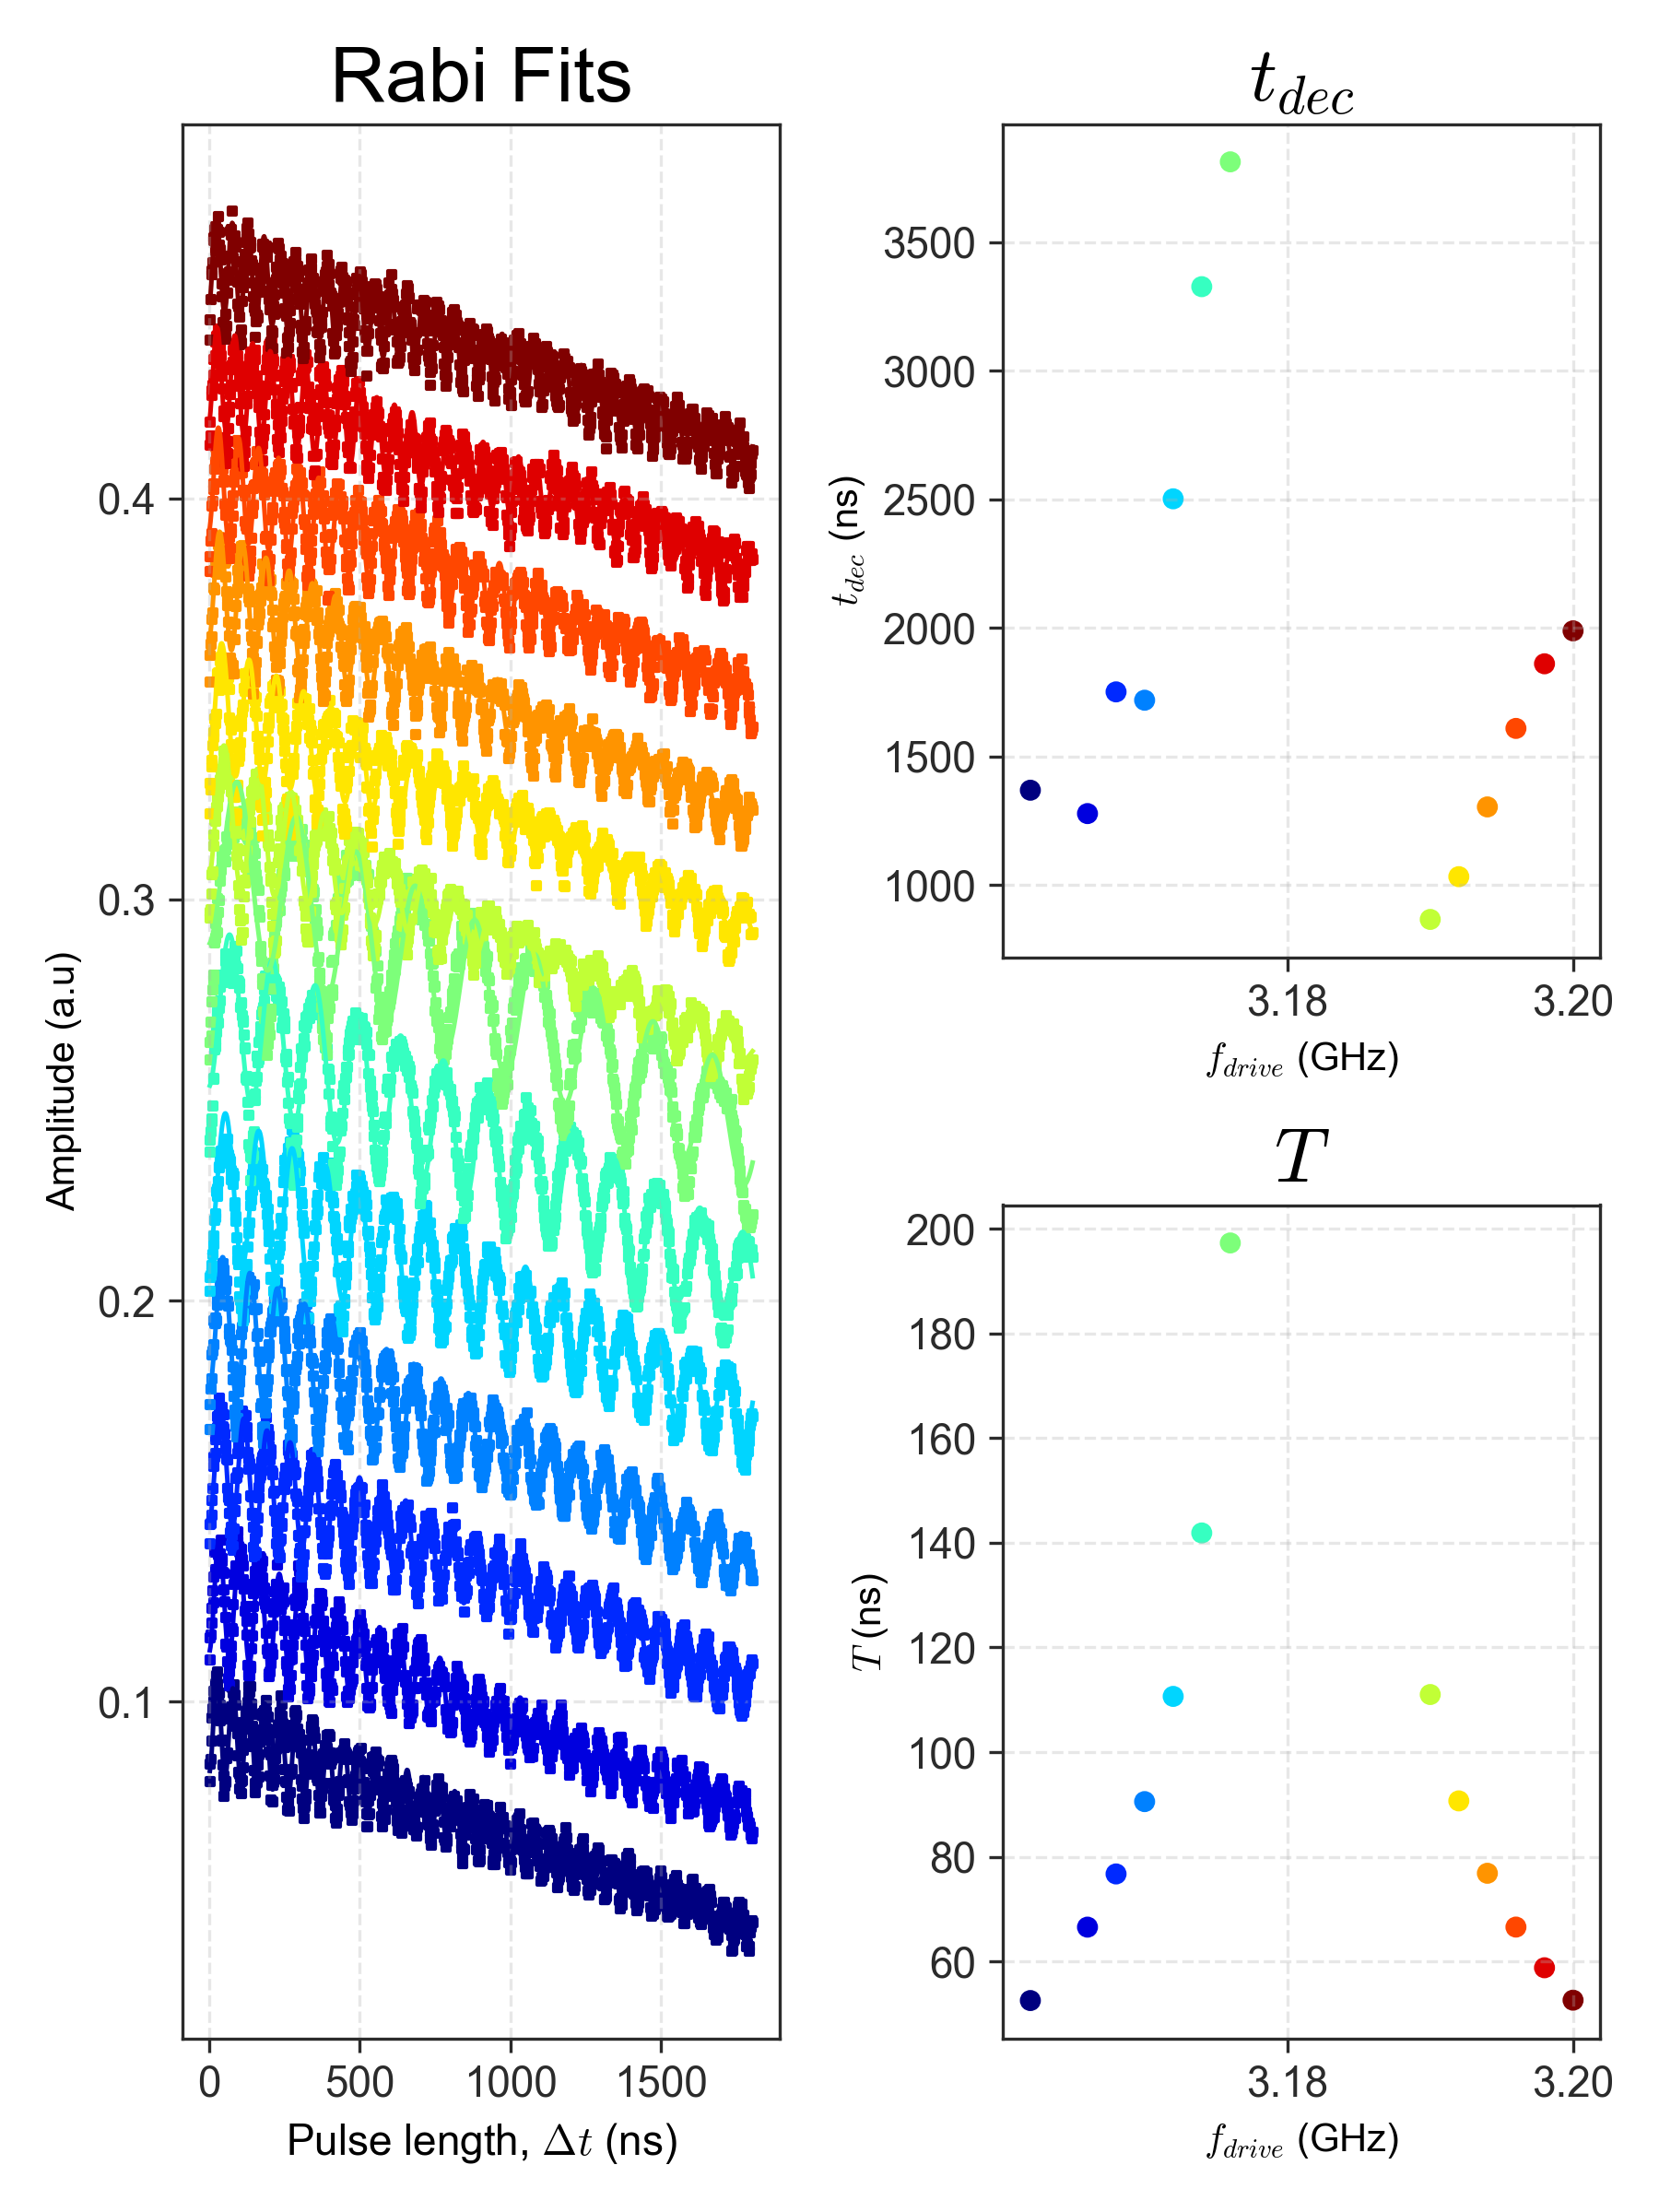

In [385]:
# Summarise the fittings:
SPACING = 0.03
cmap = plt.cm.jet(np.linspace(0, 1, len(fit_data)))

# Plot T, t_dec for different frequencies and the rabi plots
# fix, ax = plt.subplots(3, 1, figsize=(4,9))
plt.figure(figsize=(6, 8))
gs = gridspec.GridSpec(2, 2)

ax0 = plt.subplot(gs[:, 0])
ax0.set_title("Rabi Fits")
ax0.set_xlabel("Pulse length, $\Delta t$ (ns)", fontsize=11)
ax0.set_ylabel("Amplitude (a.u)", fontsize=10)

ax1 = plt.subplot(gs[0, 1])
ax1.set_title("$t_{dec}$")
ax1.set_xlabel("$f_{drive}$ (GHz)", fontsize=10)
ax1.set_ylabel("$t_{dec}$ (ns)", fontsize=10)

ax2 = plt.subplot(gs[1, 1])
ax2.set_title("$T$")
ax2.set_xlabel("$f_{drive}$ (GHz)", fontsize=10)
ax2.set_ylabel("$T$ (ns)", fontsize=10)

# Plot Rabi
for i, (idx, val) in enumerate(fit_data.items()):
    ax0.plot(t_data, i * SPACING + rabi_model(t_data, *val), color=cmap[i])
    ax0.scatter(t_data, i * SPACING + data[idx], marker=',', color=cmap[i])
    
# Plot t_dec and T
unpacked_fit_data = np.array([[f_data[k], v[0], v[1]] for k, v in fit_data.items()])
unpacked_f = unpacked_fit_data[:, 0] / GHz
ax1.scatter(unpacked_f, unpacked_fit_data[:, 1], marker='o', s=20, color=cmap) 
ax2.scatter(unpacked_f, unpacked_fit_data[:, 2], marker='o', s=20, color=cmap) 

plt.tight_layout()
plt.savefig(FILENAME.replace("txt", "pdf"))

### Fitting sweep data: File 38

In [402]:
# Initial parameters
FILENAME = "/Users/CCCP/creamy_seas/monday_starts_on_saturday/lab-results/2021-04-09_single-jj-xmon/Qubit26_2021-04-13_single-jj-xmon_38_q1-rabi-freq-sweep_-30dBmVNA_0dBmGEN_amplitude.txt"
with open(FILENAME) as fin:
    data = np.loadtxt(FILENAME)
    
    first_line = fin.readline().split()
    f_range = [float(first_line[1]), float(first_line[2]), data.shape[0]]
    
    second_line = fin.readline().split()
    y_range = [float(second_line[1]), float(second_line[2]), data.shape[1]]    

t_data = np.linspace(*y_range)
f_data = np.linspace(*f_range)
fit_data = {}

<IPython.core.display.Javascript object>


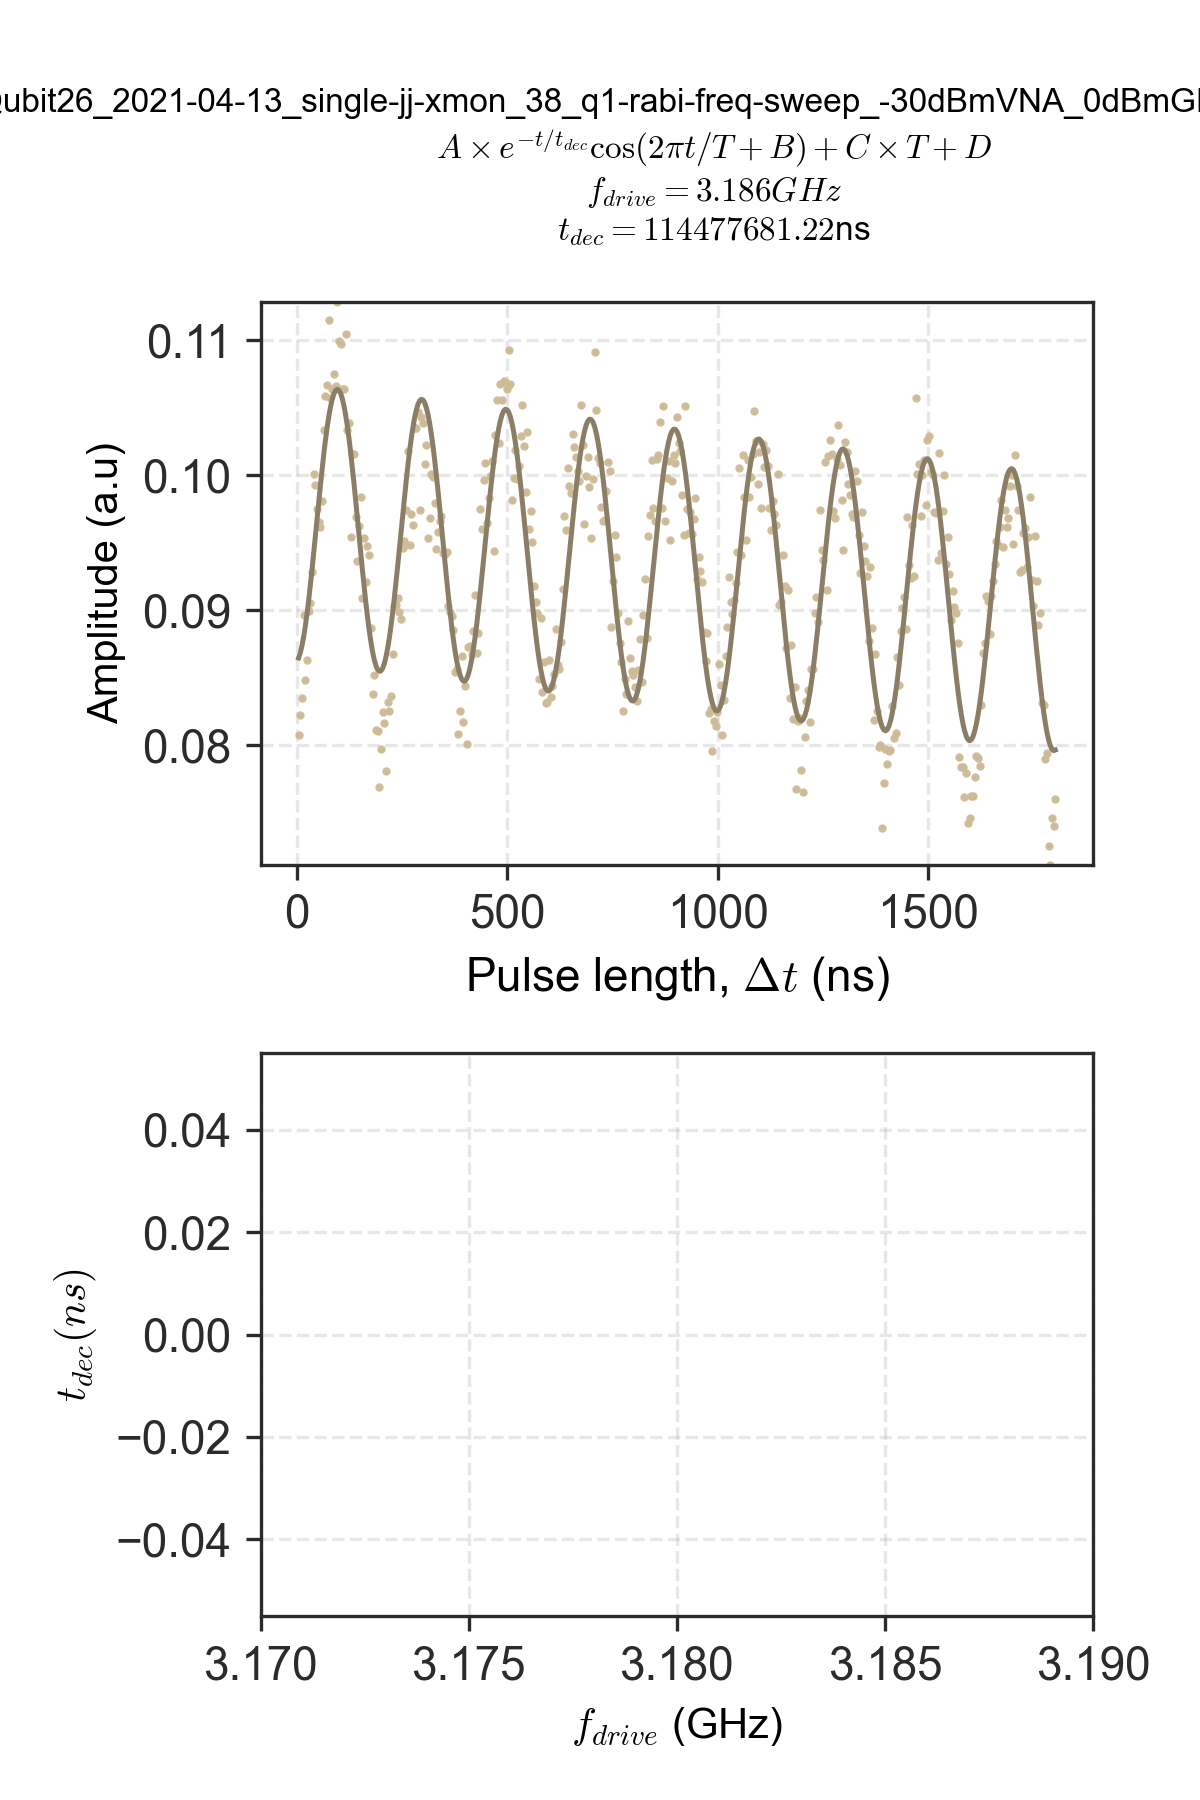

In [403]:
# Initial Guess
INDEX = 0
t_dec = 100
T = 100
A = 0.1
B = 0
C = 0
D = 0.0035

# Fitting
y_data = data[INDEX]
(popt, _)= curve_fit(
            rabi_model,
            t_data,
            y_data,
            [t_dec, T, A, B, C, D]
        )

# Plotting
fix, ax = plt.subplots(2, 1, figsize=(4,6))
raw, = ax[0].plot(t_data, y_data, 
           color="#cdba96",
           marker=".",
           alpha=0.95,
            linestyle=''
          )
fitting, = ax[0].plot(t_data, rabi_model(t_data, *popt), color="#8b7e66")
ax[0].set_xlabel("Pulse length, $\Delta t$ (ns)", fontsize=11)
ax[0].set_ylabel("Amplitude (a.u)", fontsize=10)
ax[0].set_title(f"""
    {FILENAME.split("/")[-1]}
    $A\\times e^{{-t/t_{{dec}}}}\cos(2\pi{{t}}/T + B) + C\\times{{T}} + D$
    $f_{{drive}} = {f_data[INDEX]/GHz}GHz$ 
    $t_{{dec}} = {popt[0]:.2f}$ns
    """
    ,fontsize=8)

ax[1].set_xlabel("$f_{drive}$ (GHz)", fontsize=10)
ax[1].set_ylabel("$t_{dec} (ns)$", fontsize=10)
ax[1].set_xlim(f_range[0]/GHz, f_range[1]/GHz)
param_plot, = ax[1].plot([], [], marker="o", linestyle='')
plt.tight_layout()

# Interactivity
def update(t_dec: float, T: float, A: float, B: float, C: float, D: float, INDEX: int):
    y_data = data[INDEX]
    (popt, _)= curve_fit(
            rabi_model,
            t_data,
            y_data,
            [t_dec, T, A, B, C, D]
        )
    ax[0].set_title(f"""
        {FILENAME.split("/")[-1]}
        $A\\times e^{{-t/t_{{dec}}}}\cos(2\pi{{t}}/T + B) + C\\times{{T}} + D$
        $f_{{drive}} = {f_data[INDEX]/GHz}GHz$ 
        $t_{{dec}} = {popt[0]:.2f}$ns
        """,fontsize=8)
    fitting.set_ydata(rabi_model(t_data, *popt))
    raw.set_ydata(y_data)
    ax[0].set_ylim([min(y_data), max(y_data)])
    return popt

In [404]:
def save_fit(_):
    # Run fit with current parameters and update the dictionary
    t_dec = t_dec_widget.value; T = T_widget.value; A = A_widget.value; B = B_widget.value; C = C_widget.value; D = D_widget.value; INDEX = INDEX_widget.value

    fit_data[INDEX] = update(t_dec, T, A, B, C, D, INDEX)
    
    unpacked_fit_data = np.array([[f_data[k], v[0]] for k, v in fit_data.items()])
    unpacked_f = unpacked_fit_data[:, 0]/GHz
    unpacked_t_dec = unpacked_fit_data[:, 1]

    param_plot.set_data(unpacked_f, unpacked_t_dec)
    ax[1].relim()
    ax[1].autoscale_view()
    print("Saved!")
    
CONTINUOUS_UPDATE = True
t_dec_widget = ipywidgets.FloatSlider(
    min=1, max=10000,
    description="$t_{dec}$ (ns)", value=t_dec,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
t_dec_widget.style.handle_color = 'red'

T_widget = ipywidgets.FloatSlider(
    min=0.1, max=1000, step=0.1,
    description="$T$ (nd)", value=T,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
T_widget.style.handle_color = 'red'

A_widget = ipywidgets.FloatSlider(
    min=0, max=2, step=0.01,
    description="A", value=A,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
B_widget = ipywidgets.FloatSlider(
    min=0, max=2*np.pi, step=0.01,
    description="B", value=B,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
C_widget = ipywidgets.FloatSlider(
    min=0, max=0.1, step=0.0001,
    description="C", value=C,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
D_widget = ipywidgets.FloatSlider(
    min=0, max=0.1, step=0.0001,
    description="D", value=D,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
INDEX_widget = ipywidgets.IntSlider(
    min=0, max=len(f_data),
    description="idx", value=INDEX,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
INDEX_widget.style.handle_color = 'blue'

save_widget = ipywidgets.Button(
    description='Save Parameters',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    icon='arrow-down' # (FontAwesome names without the `fa-` prefix),
)
save_widget.on_click(save_fit)

ui = ipywidgets.GridspecLayout(8, 1)
ui[0,:] = t_dec_widget
ui[1,:] = T_widget
ui[2,:] = A_widget
ui[3,:] = B_widget
ui[4,:] = C_widget
ui[5,:] = D_widget
ui[6,:] = INDEX_widget
ui[7,:] = save_widget

out = ipywidgets.interactive_output(
    update,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "t_dec": t_dec_widget,
        "T": T_widget,
        "A": A_widget,
        "B": B_widget,
        "C": C_widget,
        "D": D_widget,
        "INDEX": INDEX_widget
    }
)  

display(ui, out)

GridspecLayout(children=(FloatSlider(value=100.0, description='$t_{dec}$ (ns)', layout=Layout(grid_area='widge…

Output()

<IPython.core.display.Javascript object>


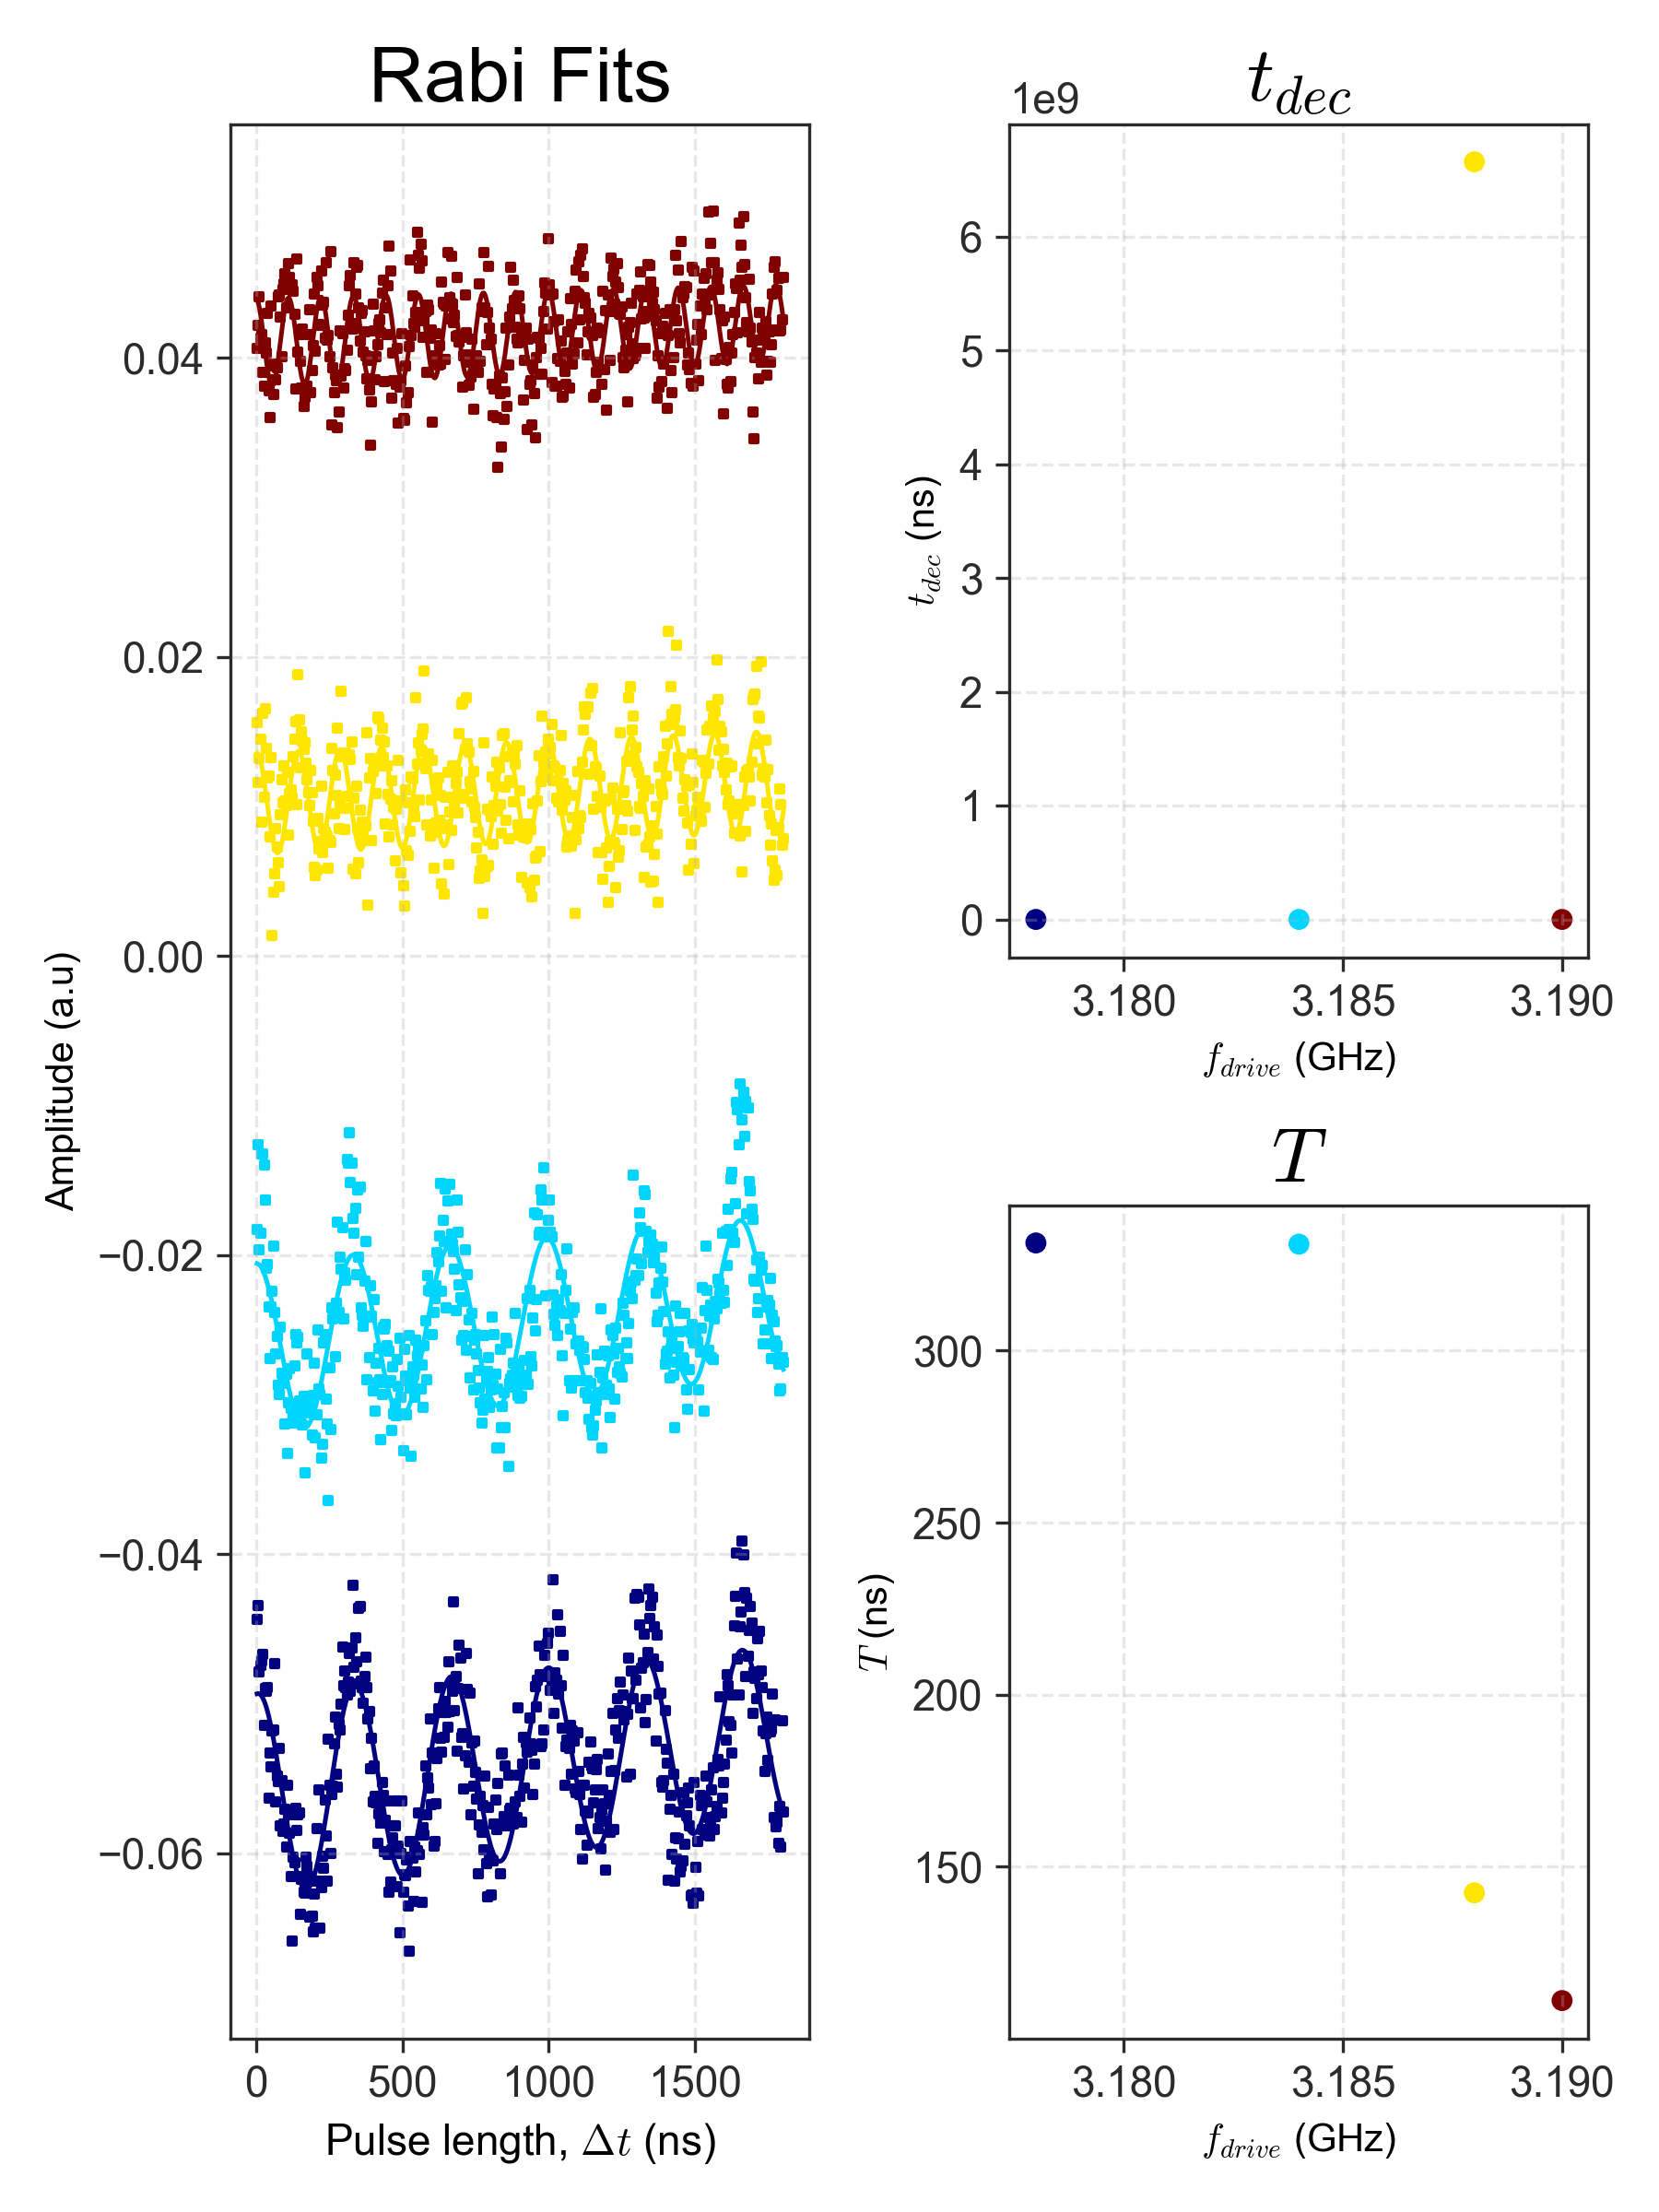

In [389]:
# Summarise the fittings:
SPACING = 0.03
cmap = plt.cm.jet(np.linspace(0, 1, len(fit_data)))

# Plot T, t_dec for different frequencies and the rabi plots
# fix, ax = plt.subplots(3, 1, figsize=(4,9))
plt.figure(figsize=(6, 8))
gs = gridspec.GridSpec(2, 2)

ax0 = plt.subplot(gs[:, 0])
ax0.set_title("Rabi Fits")
ax0.set_xlabel("Pulse length, $\Delta t$ (ns)", fontsize=11)
ax0.set_ylabel("Amplitude (a.u)", fontsize=10)

ax1 = plt.subplot(gs[0, 1])
ax1.set_title("$t_{dec}$")
ax1.set_xlabel("$f_{drive}$ (GHz)", fontsize=10)
ax1.set_ylabel("$t_{dec}$ (ns)", fontsize=10)

ax2 = plt.subplot(gs[1, 1])
ax2.set_title("$T$")
ax2.set_xlabel("$f_{drive}$ (GHz)", fontsize=10)
ax2.set_ylabel("$T$ (ns)", fontsize=10)

# Plot Rabi
for i, (idx, val) in enumerate(fit_data.items()):
    ax0.plot(t_data, i * SPACING + rabi_model(t_data, *val), color=cmap[i])
    ax0.scatter(t_data, i * SPACING + data[idx], marker=',', color=cmap[i])
    
# Plot t_dec and T
unpacked_fit_data = np.array([[f_data[k], v[0], v[1]] for k, v in fit_data.items()])
unpacked_f = unpacked_fit_data[:, 0] / GHz
ax1.scatter(unpacked_f, unpacked_fit_data[:, 1], marker='o', s=20, color=cmap) 
ax2.scatter(unpacked_f, unpacked_fit_data[:, 2], marker='o', s=20, color=cmap) 

plt.tight_layout()
plt.savefig(FILENAME.replace("txt", "pdf"))

# Fitting Rabi with beating

In [2]:
def rabi_model_beating(t, t_dec, T, A, B, C, D, E, t_beat):
    """
    OLD! Need to move t_beat to the end!
    __ Description __
    Fits Rabi oscillations of the format
    A e^(-t/tDec) cos(2π t / T + B)sin(2π t / t_beat + E) + Ct + D
    """

    return A * np.sin(2 * np.pi * t / T + B) * np.sin(2 * np.pi * t / t_beat + E) *  np.exp(-t / t_dec) + C*t + D

## File 39 - Amplitude

In [3]:
# Initial parameters
#FILENAME = "/Users/CCCP/creamy_seas/monday_starts_on_saturday/lab-results/2021-04-09_single-jj-xmon/Qubit26_2021-04-13_single-jj-xmon_39_q1-rabi-freq-sweep_-30dBmVNA_0dBmGEN_amplitude.vi"
RABI_MODEL = rabi_model_beating
FILENAME = "C:\ExperimentBlue\Qubit26_2021-04-9_single_jj_xmon\Qubit26_2021-04-13_single-jj-xmon_39_q1-rabi-freq-sweep_-30dBmVNA_0dBmGEN_amplitude.txt"
with open(FILENAME) as fin:
    DATA = np.loadtxt(FILENAME)
    
    first_line = fin.readline().split()
    f_range = [float(first_line[1]), float(first_line[2]), DATA.shape[0]]
    
    second_line = fin.readline().split()
    y_range = [float(second_line[1]), float(second_line[2]), DATA.shape[1]]    

T_DATA = np.linspace(*y_range)
F_DATA = np.linspace(*f_range)
try:
    # Load in default fit values for this file
    with open(f".cache/{os.path.basename(FILENAME)}.cache") as fin:
        fit_data = {int(k): v for k, v in json.load(fin).items()}
    print("Loaded cached parameters!")
except:
    fit_data = {}

Loaded cached parameters!


In [4]:
# Initial Guess
cut = (1565, 2782)
INDEX = 3
t_dec = 5328.30
T = 123.5
t_beat = 8000
A = 0.02
B = 4.44
C = (-10**(-6) * 16.5)
D = 0.110
E = np.pi / 2

# Fitting
y_data = DATA[INDEX]
try:
    (popt, _) = curve_fit(
        RABI_MODEL,
        np.delete(T_DATA, np.arange(cut[0], cut[1])),
        np.delete(y_data, np.arange(cut[0], cut[1])),
        [t_dec, T, A, B, C, D, E, t_beat]
    )
except RuntimeError:
    popt = (t_dec, T, A, B, C, D, E, t_beat)

# Plotting
fix, ax = plt.subplots(2, 1, figsize=(8, 8))
raw, = ax[0].plot(T_DATA, y_data, color="black", marker=",", linestyle='')
fitting, = ax[0].plot(T_DATA, RABI_MODEL(T_DATA, *popt), color="blue")
user_fitting, = ax[0].plot(T_DATA, RABI_MODEL(T_DATA, t_dec, T, A, B, C, D, E, t_beat), color="red", linewidth=2.2)
ax[0].axvspan(T_DATA[cut[0]], T_DATA[cut[1]], color='red', alpha=0.2)
ax[0].set_xlabel("Pulse length, $\Delta t$ (ns)", fontsize=11)
ax[0].set_ylabel("Amplitude (a.u)", fontsize=10)
ax[0].set_title(f"""
    {FILENAME.split("/")[-1]}
     $Ae^{{-t/t_{{dec}}}} \cos(2\pi{{t}}/T + B) \sin(2\pi{{t}}/t_{{beat}} + E) + C\\times{{T}} + D$
    $f_{{drive}} = {F_DATA[INDEX]/GHz}GHz$ 
    $t_{{dec}} = {popt[0]:.2f}$ns
    """, fontsize=8)


ax[1].set_xlabel("$f_{drive}$ (GHz)", fontsize=10)
ax[1].set_ylabel("$t_{dec} (ns)$", fontsize=10)
ax[1].set_xlim(f_range[0]/GHz, f_range[1]/GHz)
param_plot, = ax[1].plot([], [], marker="o", linestyle='')
plt.tight_layout()

# Interactivity
def update(t_dec, T, t_beat, A, B, C, D, E, 
           cut, INDEX, user_toggle, fit_toggle):
    C = C / 10**6
    y_data = DATA[INDEX]
    try:
        (popt, _) = curve_fit(
            RABI_MODEL,
            np.delete(T_DATA, np.arange(cut[0], cut[1])),
            np.delete(y_data, np.arange(cut[0], cut[1])),
            [t_dec, T, A, B, C, D, E, t_beat]
        )
    except RuntimeError:
        print("Failed regression!")
        popt = (t_dec, T, A, B, C, D, E, t_beat)
    ax[0].set_title(f"""
        {FILENAME.split("/")[-1]}
        $Ae^{{-t/t_{{dec}}}} \cos(2\pi{{t}}/T + B) \sin(2\pi{{t}}/t_{{beat}} + E) + C\\times{{T}} + D$
        $f_{{drive}} = {F_DATA[INDEX]/GHz}GHz$ 
        $t_{{dec}} = {popt[0]:.2f}$ns
        """, fontsize=8)
    fitting.set_ydata(RABI_MODEL(T_DATA, *popt))
    raw.set_ydata(y_data)
    user_fitting.set_ydata(RABI_MODEL(T_DATA, t_dec, T, A, B, C, D, E, t_beat))
    ax[0].patches = []
    ax[0].axvspan(T_DATA[cut[0]], T_DATA[cut[1]], color='red', alpha=0.2)

    user_fitting.set_visible(user_toggle)
    fitting.set_visible(fit_toggle)
    ax[0].relim()
    ax[0].autoscale_view()
    return popt

def store_fit(_):
    INDEX = INDEX_widget.value

    fit_data[INDEX] = list(update(
        t_dec_widget.value, T_widget.value, t_beat_widget.value, A_widget.value, B_widget.value, C_widget.value, 
        D_widget.value, E_widget.value, CUT_widget.value, 
        INDEX,  user_toggle_widget.value,  fit_toggle_widget.value))

    unpacked_fit_data = np.array([[F_DATA[k], v[0]]
                                  for k, v in fit_data.items()])
    unpacked_f = unpacked_fit_data[:, 0]/GHz
    unpacked_t_dec = unpacked_fit_data[:, 1]

    param_plot.set_data(unpacked_f, unpacked_t_dec)
    ax[1].relim()
    ax[1].autoscale_view()
    print(f"Stored parameters!{fit_data}")
def store_user_fit(_):
    INDEX = INDEX_widget.value

    fit_data[INDEX] = (t_dec_widget.value, T_widget.value, t_beat_widget.value, A_widget.value, B_widget.value, C_widget.value/10**6, 
        D_widget.value, E_widget.value)

    unpacked_fit_data = np.array([[F_DATA[k], v[0]]
                                  for k, v in fit_data.items()])
    unpacked_f = unpacked_fit_data[:, 0]/GHz
    unpacked_t_dec = unpacked_fit_data[:, 1]

    param_plot.set_data(unpacked_f, unpacked_t_dec)
    ax[1].relim()
    ax[1].autoscale_view()
    print(f"Stored parameters!{fit_data}")
def dump_parameters(_):
    INDEX = INDEX_widget.value
    save_file = f".cache/{os.path.basename(FILENAME)}.cache"
    with open(save_file, "w") as fout:
        json.dump(fit_data, fout)
    print(f"Parameters saved to file: '{save_file}'")
def load_parameters(_):
    """Set settings to the parameters in dictionary"""
    INDEX = INDEX_widget.value
    if INDEX in fit_data:
        print(f"Loaded parameters!: {fit_data[INDEX]}")
        t_dec_widget.value = fit_data[INDEX][0]
        T_widget.value = fit_data[INDEX][1]
        A_widget.value = fit_data[INDEX][2]
        B_widget.value = fit_data[INDEX][3]
        C_widget.value = fit_data[INDEX][4] * 10**6
        D_widget.value = fit_data[INDEX][5]
        E_widget.value = fit_data[INDEX][6]
        t_beat_widget.value = fit_data[INDEX][7]
    else:
        print("No parameters saved for this plot")

<IPython.core.display.Javascript object>

In [5]:
CONTINUOUS_UPDATE = False
t_dec_widget = ipywidgets.FloatSlider(
    min=1, max=10000,
    description="$t_{dec}$ (ns)", value=t_dec,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
t_dec_widget.style.handle_color = 'red'
t_beat_widget = ipywidgets.FloatSlider(
    min=1, max=10000,
    description="$t_{beat}$ (ns)", value=t_beat,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
t_beat_widget.style.handle_color = 'red'

T_widget = ipywidgets.FloatSlider(
    min=100, max=200, step=0.25,
    description="$T$ (nd)", value=T,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
T_widget.style.handle_color = 'red'

CUT_widget = ipywidgets.SelectionRangeSlider(
    options=[(i, i) for i, t in enumerate(T_DATA)],
    description='Cut points', value=cut,
    layout=ipywidgets.Layout(width='90%')
)
CUT_widget.style.handle_color = 'blue'
A_widget = ipywidgets.FloatSlider(
    min=0, max=0.1, step=0.001,
    description="A", value=A,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
B_widget = ipywidgets.FloatSlider(
    min=0, max=2*np.pi, step=0.01,
    description="B", value=B,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
C_widget = ipywidgets.FloatSlider(
    min=-20, max=20, step=0.1,
    description="C * 10^6", value=C * 10**6,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
D_widget = ipywidgets.FloatSlider(
    min=0, max=0.5, step=0.001, readout_format='.3f',
    description="D", value=D,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
E_widget = ipywidgets.FloatSlider(
    min=0, max=2*np.pi, step=0.01,
    description="E", value=E,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
INDEX_widget = ipywidgets.IntSlider(
    min=0, max=len(F_DATA) - 1,
    description="idx", value=INDEX,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
INDEX_widget.style.handle_color = 'blue'

store_fit_widget = ipywidgets.Button(
    description='Store Regression Parameters',
    icon='arrow-down'  # (FontAwesome names without the `fa-` prefix),
)
store_fit_widget.on_click(store_fit)
store_user_fit_widget = ipywidgets.Button(
    description='Store User Parameters',
    icon='arrow-down'  # (FontAwesome names without the `fa-` prefix),
)
store_user_fit_widget.on_click(store_user_fit)
load_parameters_widget = ipywidgets.Button(
    description='Load Fit Parameters',
    icon='arrow-up',     layout=ipywidgets.Layout(width='90%'),
)
load_parameters_widget.on_click(load_parameters)
dump_widget = ipywidgets.Button(
    description='Save Parameters to file',
    icon='save', layout=ipywidgets.Layout(width='90%')
)
dump_widget.on_click(dump_parameters)
user_toggle_widget = ipywidgets.Checkbox(
    description='User Fitting',
    value=True,
    continuous_update=CONTINUOUS_UPDATE
)
fit_toggle_widget = ipywidgets.Checkbox(
    description='Regression Fitting',
    value=False,
    continuous_update=CONTINUOUS_UPDATE
)

ui = ipywidgets.GridspecLayout(12, 4)
ui[0, :] = t_dec_widget
ui[1, :] = T_widget
ui[2, :] = t_beat_widget
ui[3, :] = A_widget
ui[4, :] = B_widget
ui[5, :] = C_widget
ui[6, :] = D_widget
ui[7, :] = E_widget
ui[8, :] = CUT_widget
ui[9, :] = INDEX_widget
ui[10, 0] = user_toggle_widget
ui[10, 1] = store_user_fit_widget
ui[10, 2] = fit_toggle_widget
ui[10, 3]= store_fit_widget
ui[11, :1] = dump_widget
ui[11, 2:] = load_parameters_widget

out = ipywidgets.interactive_output(
    update,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "t_dec": t_dec_widget,
        "T": T_widget,
        "t_beat": t_beat_widget,
        "A": A_widget,
        "B": B_widget,
        "C": C_widget,
        "D": D_widget,
        "E": E_widget,
        "INDEX": INDEX_widget,
        "cut": CUT_widget,
        "user_toggle": user_toggle_widget,
        "fit_toggle": fit_toggle_widget
    }
)

display(ui, out)

GridspecLayout(children=(FloatSlider(value=5328.3, continuous_update=False, description='$t_{dec}$ (ns)', layo…

Output()

In [269]:
# Summarise the fittings:
SPACING = 0.03
cmap = plt.cm.jet(np.linspace(0, 1, len(fit_data)))

# Plot T, t_dec for different frequencies and the rabi plots
# fix, ax = plt.subplots(3, 1, figsize=(4,9))
plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 2)

ax0 = plt.subplot(gs[:, 0])
ax0.set_title("Rabi Fits")
ax0.set_xlabel("Pulse length, $\Delta t$ (ns)", fontsize=11)
ax0.set_ylabel("Amplitude (a.u)", fontsize=10)

ax1 = plt.subplot(gs[0, 1])
ax1.set_title("$t_{dec}$")
ax1.set_xlabel("$f_{drive}$ (GHz)", fontsize=10)
ax1.set_ylabel("$t_{dec}$ (ns)", fontsize=10)

ax2 = plt.subplot(gs[1, 1])
ax2.set_title("$T$")
ax2.set_xlabel("$f_{drive}$ (GHz)", fontsize=10)
ax2.set_ylabel("$T$ (ns)", fontsize=10)

# Plot Rabi
for i, (idx, val) in enumerate(fit_data.items()):
    ax0.plot(T_DATA, i * SPACING + rabi_model_beating(T_DATA, *val), color=cmap[i])
    ax0.scatter(T_DATA, i * SPACING + data[idx], marker=',', color=cmap[i], s=1)
    
# Plot t_dec and T
unpacked_fit_data = np.array([[f_data[k], v[0], v[1]] for k, v in fit_data.items()])
unpacked_f = unpacked_fit_data[:, 0] / GHz
ax1.scatter(unpacked_f, unpacked_fit_data[:, 1], marker='o', s=20, color=cmap) 
ax2.scatter(unpacked_f, unpacked_fit_data[:, 2], marker='o', s=20, color=cmap) 

plt.tight_layout()
#plt.savefig(FILENAME.replace("txt", "pdf"))

<IPython.core.display.Javascript object>

## File 39 - Real

In [274]:
# Initial parameters
#FILENAME = "/Users/CCCP/creamy_seas/monday_starts_on_saturday/lab-results/2021-04-09_single-jj-xmon/Qubit26_2021-04-13_single-jj-xmon_39_q1-rabi-freq-sweep_-30dBmVNA_0dBmGEN_amplitude.vi"
RABI_MODEL = rabi_model_beating
FILENAME = "C:\ExperimentBlue\Qubit26_2021-04-9_single_jj_xmon\Qubit26_2021-04-13_single-jj-xmon_39_q1-rabi-freq-sweep_-30dBmVNA_0dBmGEN_real.txt"
with open(FILENAME) as fin:
    DATA = np.loadtxt(FILENAME)
    
    first_line = fin.readline().split()
    f_range = [float(first_line[1]), float(first_line[2]), DATA.shape[0]]
    
    second_line = fin.readline().split()
    y_range = [float(second_line[1]), float(second_line[2]), DATA.shape[1]]    

T_DATA = np.linspace(*y_range)
F_DATA = np.linspace(*f_range)
try:
    # Load in default fit values for this file
    with open(f".cache/{os.path.basename(FILENAME)}.cache") as fin:
        fit_data = {int(k): v for k, v in json.load(fin).items()}
    print("Loaded cached parameters!")
except:
    fit_data = {}

Loaded cached parameters!


In [275]:
# Initial Guess
cut = (1565, 2782)
INDEX = 3
t_dec = 5328.30
T = 123.5
t_beat = 8000
A = 0.02
B = 4.44
C = (-10**(-6) * 16.5)
D = 0.110
E = np.pi / 2

# Fitting
y_data = DATA[INDEX]
try:
    (popt, _) = curve_fit(
        RABI_MODEL,
        np.delete(T_DATA, np.arange(cut[0], cut[1])),
        np.delete(y_data, np.arange(cut[0], cut[1])),
        [t_dec, T, A, B, C, D, E, t_beat]
    )
except RuntimeError:
    popt = (t_dec, T, A, B, C, D, E, t_beat)

# Plotting
fix, ax = plt.subplots(2, 1, figsize=(8, 8))
raw, = ax[0].plot(T_DATA, y_data, color="black", marker=",", linestyle='')
fitting, = ax[0].plot(T_DATA, RABI_MODEL(T_DATA, *popt), color="blue")
user_fitting, = ax[0].plot(T_DATA, RABI_MODEL(T_DATA, t_dec, T, A, B, C, D, E, t_beat), color="red", linewidth=2.2)
ax[0].axvspan(T_DATA[cut[0]], T_DATA[cut[1]], color='red', alpha=0.2)
ax[0].set_xlabel("Pulse length, $\Delta t$ (ns)", fontsize=11)
ax[0].set_ylabel("Amplitude (a.u)", fontsize=10)
ax[0].set_title(f"""
    {FILENAME.split("/")[-1]}
     $Ae^{{-t/t_{{dec}}}} \cos(2\pi{{t}}/T + B) \sin(2\pi{{t}}/t_{{beat}} + E) + C\\times{{T}} + D$
    $f_{{drive}} = {F_DATA[INDEX]/GHz}GHz$ 
    $t_{{dec}} = {popt[0]:.2f}$ns
    """, fontsize=8)


ax[1].set_xlabel("$f_{drive}$ (GHz)", fontsize=10)
ax[1].set_ylabel("$t_{dec} (ns)$", fontsize=10)
ax[1].set_xlim(f_range[0]/GHz, f_range[1]/GHz)
param_plot, = ax[1].plot([], [], marker="o", linestyle='')
plt.tight_layout()

# Interactivity
def update(t_dec, T, t_beat, A, B, C, D, E, 
           cut, INDEX, user_toggle, fit_toggle):
    C = C / 10**6
    y_data = DATA[INDEX]
    try:
        (popt, _) = curve_fit(
            RABI_MODEL,
            np.delete(T_DATA, np.arange(cut[0], cut[1])),
            np.delete(y_data, np.arange(cut[0], cut[1])),
            [t_dec, T, A, B, C, D, E, t_beat]
        )
    except RuntimeError:
        print("Failed regression!")
        popt = (t_dec, T, A, B, C, D, E, t_beat)
    ax[0].set_title(f"""
        {FILENAME.split("/")[-1]}
        $Ae^{{-t/t_{{dec}}}} \cos(2\pi{{t}}/T + B) \sin(2\pi{{t}}/t_{{beat}} + E) + C\\times{{T}} + D$
        $f_{{drive}} = {F_DATA[INDEX]/GHz}GHz$ 
        $t_{{dec}} = {popt[0]:.2f}$ns
        """, fontsize=8)
    fitting.set_ydata(RABI_MODEL(T_DATA, *popt))
    raw.set_ydata(y_data)
    user_fitting.set_ydata(RABI_MODEL(T_DATA, t_dec, T, A, B, C, D, E, t_beat))
    ax[0].patches = []
    ax[0].axvspan(T_DATA[cut[0]], T_DATA[cut[1]], color='red', alpha=0.2)

    user_fitting.set_visible(user_toggle)
    fitting.set_visible(fit_toggle)
    ax[0].relim()
    ax[0].autoscale_view()
    return popt

def store_fit(_):
    INDEX = INDEX_widget.value

    fit_data[INDEX] = list(update(
        t_dec_widget.value, T_widget.value, t_beat_widget.value, A_widget.value, B_widget.value, C_widget.value, 
        D_widget.value, E_widget.value, CUT_widget.value, 
        INDEX,  user_toggle_widget.value,  fit_toggle_widget.value))

    unpacked_fit_data = np.array([[F_DATA[k], v[0]]
                                  for k, v in fit_data.items()])
    unpacked_f = unpacked_fit_data[:, 0]/GHz
    unpacked_t_dec = unpacked_fit_data[:, 1]

    param_plot.set_data(unpacked_f, unpacked_t_dec)
    ax[1].relim()
    ax[1].autoscale_view()
    print(f"Stored parameters!{fit_data}")
def store_user_fit(_):
    INDEX = INDEX_widget.value

    fit_data[INDEX] = (t_dec_widget.value, T_widget.value, t_beat_widget.value, A_widget.value, B_widget.value, C_widget.value/10**6, 
        D_widget.value, E_widget.value)

    unpacked_fit_data = np.array([[F_DATA[k], v[0]]
                                  for k, v in fit_data.items()])
    unpacked_f = unpacked_fit_data[:, 0]/GHz
    unpacked_t_dec = unpacked_fit_data[:, 1]

    param_plot.set_data(unpacked_f, unpacked_t_dec)
    ax[1].relim()
    ax[1].autoscale_view()
    print(f"Stored parameters!{fit_data}")
def dump_parameters(_):
    INDEX = INDEX_widget.value
    save_file = f".cache/{os.path.basename(FILENAME)}.cache"
    with open(save_file, "w") as fout:
        json.dump(fit_data, fout)
    print(f"Parameters saved to file: '{save_file}'")
def load_parameters(_):
    """Set settings to the parameters in dictionary"""
    INDEX = INDEX_widget.value
    if INDEX in fit_data:
        print(f"Loaded parameters!: {fit_data[INDEX]}")
        t_dec_widget.value = fit_data[INDEX][0]
        T_widget.value = fit_data[INDEX][1]
        A_widget.value = fit_data[INDEX][2]
        B_widget.value = fit_data[INDEX][3]
        C_widget.value = fit_data[INDEX][4] * 10**6
        D_widget.value = fit_data[INDEX][5]
        E_widget.value = fit_data[INDEX][6]
        t_beat_widget.value = fit_data[INDEX][7]
    else:
        print("No parameters saved for this plot")

<IPython.core.display.Javascript object>

In [276]:
CONTINUOUS_UPDATE = False
t_dec_widget = ipywidgets.FloatSlider(
    min=1, max=10000,
    description="$t_{dec}$ (ns)", value=t_dec,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
t_dec_widget.style.handle_color = 'red'
t_beat_widget = ipywidgets.FloatSlider(
    min=1, max=10000,
    description="$t_{beat}$ (ns)", value=t_beat,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
t_beat_widget.style.handle_color = 'red'

T_widget = ipywidgets.FloatSlider(
    min=100, max=200, step=0.25,
    description="$T$ (nd)", value=T,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
T_widget.style.handle_color = 'red'

CUT_widget = ipywidgets.SelectionRangeSlider(
    options=[(i, i) for i, t in enumerate(T_DATA)],
    description='Cut points', value=cut,
    layout=ipywidgets.Layout(width='90%')
)
CUT_widget.style.handle_color = 'blue'
A_widget = ipywidgets.FloatSlider(
    min=0, max=0.1, step=0.001,
    description="A", value=A,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
B_widget = ipywidgets.FloatSlider(
    min=0, max=2*np.pi, step=0.01,
    description="B", value=B,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
C_widget = ipywidgets.FloatSlider(
    min=-20, max=20, step=0.1,
    description="C * 10^6", value=C * 10**6,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
D_widget = ipywidgets.FloatSlider(
    min=-0.5, max=0, step=0.001, readout_format='.3f',
    description="D", value=D,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
E_widget = ipywidgets.FloatSlider(
    min=0, max=2*np.pi, step=0.01,
    description="E", value=E,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
INDEX_widget = ipywidgets.IntSlider(
    min=0, max=len(F_DATA) - 1,
    description="idx", value=INDEX,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
INDEX_widget.style.handle_color = 'blue'

store_fit_widget = ipywidgets.Button(
    description='Store Regression Parameters',
    icon='arrow-down'  # (FontAwesome names without the `fa-` prefix),
)
store_fit_widget.on_click(store_fit)
store_user_fit_widget = ipywidgets.Button(
    description='Store User Parameters',
    icon='arrow-down'  # (FontAwesome names without the `fa-` prefix),
)
store_user_fit_widget.on_click(store_user_fit)
load_parameters_widget = ipywidgets.Button(
    description='Load Fit Parameters',
    icon='arrow-up',     layout=ipywidgets.Layout(width='90%'),
)
load_parameters_widget.on_click(load_parameters)
dump_widget = ipywidgets.Button(
    description='Save Parameters to file',
    icon='save', layout=ipywidgets.Layout(width='90%')
)
dump_widget.on_click(dump_parameters)
user_toggle_widget = ipywidgets.Checkbox(
    description='User Fitting',
    value=True,
    continuous_update=CONTINUOUS_UPDATE
)
fit_toggle_widget = ipywidgets.Checkbox(
    description='Regression Fitting',
    value=False,
    continuous_update=CONTINUOUS_UPDATE
)

ui = ipywidgets.GridspecLayout(12, 4)
ui[0, :] = t_dec_widget
ui[1, :] = T_widget
ui[2, :] = t_beat_widget
ui[3, :] = A_widget
ui[4, :] = B_widget
ui[5, :] = C_widget
ui[6, :] = D_widget
ui[7, :] = E_widget
ui[8, :] = CUT_widget
ui[9, :] = INDEX_widget
ui[10, 0] = user_toggle_widget
ui[10, 1] = store_user_fit_widget
ui[10, 2] = fit_toggle_widget
ui[10, 3]= store_fit_widget
ui[11, :1] = dump_widget
ui[11, 2:] = load_parameters_widget

out = ipywidgets.interactive_output(
    update,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "t_dec": t_dec_widget,
        "T": T_widget,
        "t_beat": t_beat_widget,
        "A": A_widget,
        "B": B_widget,
        "C": C_widget,
        "D": D_widget,
        "E": E_widget,
        "INDEX": INDEX_widget,
        "cut": CUT_widget,
        "user_toggle": user_toggle_widget,
        "fit_toggle": fit_toggle_widget
    }
)

display(ui, out)

GridspecLayout(children=(FloatSlider(value=5328.3, continuous_update=False, description='$t_{dec}$ (ns)', layo…

Output()

Loaded parameters!: [6660.7, 127.5, 0.008, 1.61, 7.2000000000000005e-06, -0.058, 1.5707963267948966, 8684.7]


## Qubit26_2021-04-13_single-jj-xmon_41_q1-rabi (single run)

In [8]:
RABI_MODEL = rabi_model

FILENAME = "C:/ExperimentBlue/Qubit26_2021-04-9_single_jj_xmon/Qubit26_2021-04-13_single-jj-xmon_41_q1-rabi.txt"
# They are all at the same frequency
F_DATA = np.array([1.76, 1.7601, 1.7602]) * 10**9
FILENAMES = [
    "C:/ExperimentBlue/Qubit26_2021-04-9_single_jj_xmon/Qubit26_2021-04-13_single-jj-xmon_41_q1-rabi_amplitude.txt",
    "C:/ExperimentBlue/Qubit26_2021-04-9_single_jj_xmon/Qubit26_2021-04-13_single-jj-xmon_41_q1-rabi_real.txt",
    "C:/ExperimentBlue/Qubit26_2021-04-9_single_jj_xmon/Qubit26_2021-04-13_single-jj-xmon_41_q1-rabi_imaginary.txt"
]

DATA = []
for file in FILENAMES:
    _data = np.loadtxt(file)
    T_DATA = _data[:1565, 0]
    DATA.append(_data[:1565, 1])
DATA = np.array(DATA)
try:
    # Load in default fit values for this file
    with open(f".cache/{os.path.basename(FILENAME)}.cache") as fin:
        fit_data = {int(k): v for k, v in json.load(fin).items()}
    print("Loaded cached parameters!")
except:
    fit_data = {}
print(fit_data)

Loaded cached parameters!
{0: [1071.4678103406172, 193.4170922822973, 0.018750066085266182, 4.692645650152796, -2.610847463947992e-06, 0.09942714357659124, 1.5707963267948966, 42888.3], 1: [1025.0224529823918, 193.49350643758504, 0.01628099313810772, 4.705428403534086, -1.9301165551318762e-06, 0.075006259128348, 1.5707963267948966, 42888.3], 2: [1160.1528358608912, 193.27217745279484, -0.009899285818634005, 4.668823584391559, 1.7332275523904686e-06, -0.06522924993045903, 1.5707963267948966, 42888.3]}


 c:\users\astafiev experiment\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\minpack.py: 828

<IPython.core.display.Javascript object>


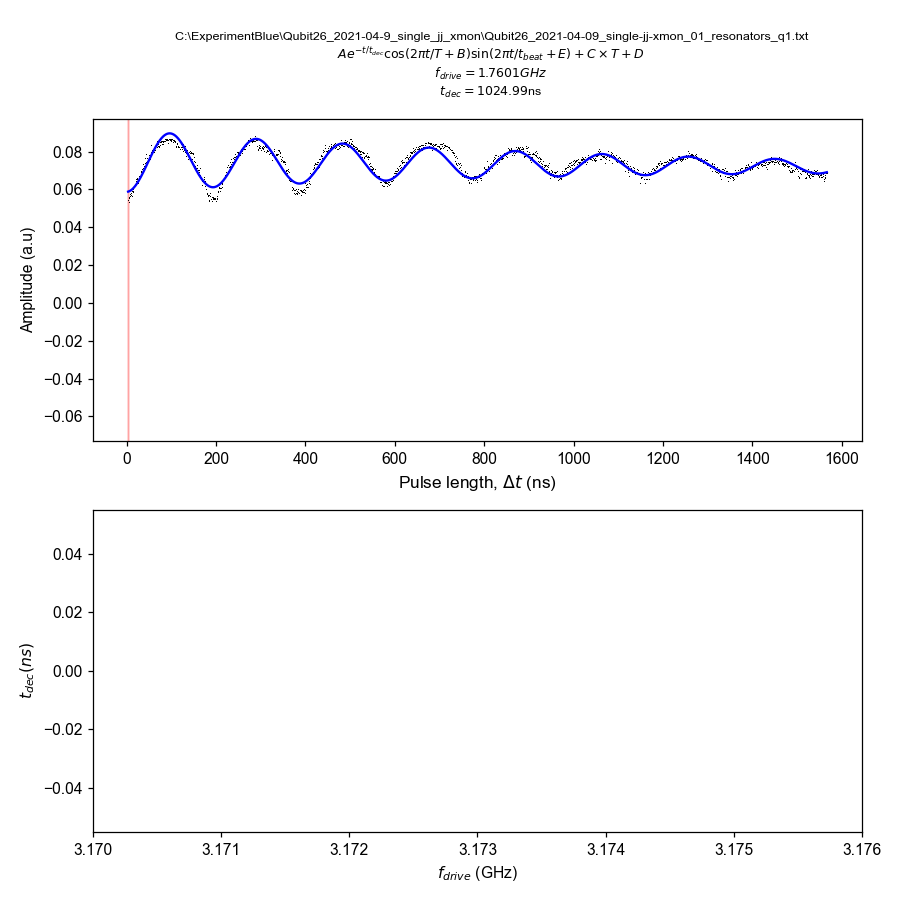

In [15]:
# Initial Guess
cut = (0, 1)
INDEX = 0
t_dec = 5328.30
T = 123.5
t_beat = 8000
A = 0.02
B = 4.44
C = (-10**(-6) * 16.5)
D = 0.110
E = np.pi / 2

# Fitting
y_data = DATA[INDEX]
try:
    (popt, _) = curve_fit(
        RABI_MODEL,
        np.delete(T_DATA, np.arange(cut[0], cut[1])),
        np.delete(y_data, np.arange(cut[0], cut[1])),
        [t_dec, T, A, B, C, D, E, t_beat]
    )
except RuntimeError:
    popt = (t_dec, T, A, B, C, D, E, t_beat)

# Plotting
fix, ax = plt.subplots(2, 1, figsize=(8, 8))
raw, = ax[0].plot(T_DATA, y_data, color="black", marker=",", linestyle='')
fitting, = ax[0].plot(T_DATA, RABI_MODEL(T_DATA, *popt), color="blue")
user_fitting, = ax[0].plot(T_DATA, RABI_MODEL(T_DATA, t_dec, T, A, B, C, D, E, t_beat), color="red", linewidth=2.2)
ax[0].axvspan(T_DATA[cut[0]], T_DATA[cut[1]], color='red', alpha=0.2)
ax[0].set_xlabel("Pulse length, $\Delta t$ (ns)", fontsize=11)
ax[0].set_ylabel("Amplitude (a.u)", fontsize=10)
ax[0].set_title(f"""
    {FILENAME.split("/")[-1]}
     $Ae^{{-t/t_{{dec}}}} \cos(2\pi{{t}}/T + B) \sin(2\pi{{t}}/t_{{beat}} + E) + C\\times{{T}} + D$
    $f_{{drive}} = {F_DATA[INDEX]/GHz}GHz$ 
    $t_{{dec}} = {popt[0]:.2f}$ns
    """, fontsize=8)


ax[1].set_xlabel("$f_{drive}$ (GHz)", fontsize=10)
ax[1].set_ylabel("$t_{dec} (ns)$", fontsize=10)
ax[1].set_xlim(f_range[0]/GHz, f_range[1]/GHz)
param_plot, = ax[1].plot([], [], marker="o", linestyle='')
plt.tight_layout()

# Interactivity
def update(t_dec, T, t_beat, A, B, C, D, E, 
           cut, INDEX, user_toggle, fit_toggle):
    C = C / 10**6
    y_data = DATA[INDEX]
    try:
        (popt, _) = curve_fit(
            RABI_MODEL,
            np.delete(T_DATA, np.arange(cut[0], cut[1])),
            np.delete(y_data, np.arange(cut[0], cut[1])),
            [t_dec, T, A, B, C, D, E, t_beat]
        )
    except RuntimeError:
        print("Failed regression!")
        popt = (t_dec, T, A, B, C, D, E, t_beat)
    ax[0].set_title(f"""
        {FILENAME.split("/")[-1]}
        $Ae^{{-t/t_{{dec}}}} \cos(2\pi{{t}}/T + B) \sin(2\pi{{t}}/t_{{beat}} + E) + C\\times{{T}} + D$
        $f_{{drive}} = {F_DATA[INDEX]/GHz}GHz$ 
        $t_{{dec}} = {popt[0]:.2f}$ns
        """, fontsize=8)
    fitting.set_ydata(RABI_MODEL(T_DATA, *popt))
    raw.set_ydata(y_data)
    user_fitting.set_ydata(RABI_MODEL(T_DATA, t_dec, T, A, B, C, D, E, t_beat))
    ax[0].patches = []
    ax[0].axvspan(T_DATA[cut[0]], T_DATA[cut[1]], color='red', alpha=0.2)

    user_fitting.set_visible(user_toggle)
    fitting.set_visible(fit_toggle)
    ax[0].relim()
    ax[0].autoscale_view()
    return popt

def store_fit(_):
    INDEX = INDEX_widget.value

    fit_data[INDEX] = list(update(
        t_dec_widget.value, T_widget.value, t_beat_widget.value, A_widget.value, B_widget.value, C_widget.value, 
        D_widget.value, E_widget.value, CUT_widget.value, 
        INDEX,  user_toggle_widget.value,  fit_toggle_widget.value))

    unpacked_fit_data = np.array([[F_DATA[k], v[0]]
                                  for k, v in fit_data.items()])
    unpacked_f = unpacked_fit_data[:, 0]/GHz
    unpacked_t_dec = unpacked_fit_data[:, 1]

    param_plot.set_data(unpacked_f, unpacked_t_dec)
    ax[1].relim()
    ax[1].autoscale_view()
    print(f"Stored parameters!{fit_data}")
def store_user_fit(_):
    INDEX = INDEX_widget.value

    fit_data[INDEX] = (t_dec_widget.value, T_widget.value, t_beat_widget.value, A_widget.value, B_widget.value, C_widget.value/10**6, 
        D_widget.value, E_widget.value)

    unpacked_fit_data = np.array([[F_DATA[k], v[0]]
                                  for k, v in fit_data.items()])
    unpacked_f = unpacked_fit_data[:, 0]/GHz
    unpacked_t_dec = unpacked_fit_data[:, 1]

    param_plot.set_data(unpacked_f, unpacked_t_dec)
    ax[1].relim()
    ax[1].autoscale_view()
    print(f"Stored parameters!{fit_data}")
def dump_parameters(_):
    INDEX = INDEX_widget.value
    save_file = f".cache/{os.path.basename(FILENAME)}.cache"
    with open(save_file, "w") as fout:
        json.dump(fit_data, fout)
    print(f"Parameters saved to file: '{save_file}'")
def load_parameters(_):
    """Set settings to the parameters in dictionary"""
    INDEX = INDEX_widget.value
    if INDEX in fit_data:
        print(f"Loaded parameters!: {fit_data[INDEX]}")
        t_dec_widget.value = fit_data[INDEX][0]
        T_widget.value = fit_data[INDEX][1]
        A_widget.value = fit_data[INDEX][2]
        B_widget.value = fit_data[INDEX][3]
        C_widget.value = fit_data[INDEX][4] * 10**6
        D_widget.value = fit_data[INDEX][5]
        E_widget.value = fit_data[INDEX][6]
        t_beat_widget.value = fit_data[INDEX][7]
    else:
        print("No parameters saved for this plot")

In [16]:
CONTINUOUS_UPDATE = False
t_dec_widget = ipywidgets.FloatSlider(
    min=1, max=10000,
    description="$t_{dec}$ (ns)", value=t_dec,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
t_dec_widget.style.handle_color = 'red'
t_beat_widget = ipywidgets.FloatSlider(
    min=10000, max=100000,
    description="$t_{beat}$ (ns)", value=t_beat,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
t_beat_widget.style.handle_color = 'red'

T_widget = ipywidgets.FloatSlider(
    min=100, max=200, step=0.25,
    description="$T$ (nd)", value=T,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
T_widget.style.handle_color = 'red'

CUT_widget = ipywidgets.SelectionRangeSlider(
    options=[(i, i) for i, t in enumerate(T_DATA)],
    description='Cut points', value=cut,
    layout=ipywidgets.Layout(width='90%')
)
CUT_widget.style.handle_color = 'blue'
A_widget = ipywidgets.FloatSlider(
    min=0, max=0.1, step=0.001,
    description="A", value=A,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
B_widget = ipywidgets.FloatSlider(
    min=0, max=2*np.pi, step=0.01,
    description="B", value=B,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
C_widget = ipywidgets.FloatSlider(
    min=-20, max=20, step=0.1,
    description="C * 10^6", value=C * 10**6,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
D_widget = ipywidgets.FloatSlider(
    min=-0.5, max=0.5, step=0.001, readout_format='.3f',
    description="D", value=D,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
E_widget = ipywidgets.FloatSlider(
    min=0, max=2*np.pi, step=0.01,
    description="E", value=E,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
INDEX_widget = ipywidgets.IntSlider(
    min=0, max=len(F_DATA) - 1,
    description="idx", value=INDEX,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
INDEX_widget.style.handle_color = 'blue'

store_fit_widget = ipywidgets.Button(
    description='Store Regression Parameters',
    icon='arrow-down'  # (FontAwesome names without the `fa-` prefix),
)
store_fit_widget.on_click(store_fit)
store_user_fit_widget = ipywidgets.Button(
    description='Store User Parameters',
    icon='arrow-down'  # (FontAwesome names without the `fa-` prefix),
)
store_user_fit_widget.on_click(store_user_fit)
load_parameters_widget = ipywidgets.Button(
    description='Load Fit Parameters',
    icon='arrow-up',     layout=ipywidgets.Layout(width='90%'),
)
load_parameters_widget.on_click(load_parameters)
dump_widget = ipywidgets.Button(
    description='Save Parameters to file',
    icon='save', layout=ipywidgets.Layout(width='90%')
)
dump_widget.on_click(dump_parameters)
user_toggle_widget = ipywidgets.Checkbox(
    description='User Fitting',
    value=True,
    continuous_update=CONTINUOUS_UPDATE
)
fit_toggle_widget = ipywidgets.Checkbox(
    description='Regression Fitting',
    value=False,
    continuous_update=CONTINUOUS_UPDATE
)

ui = ipywidgets.GridspecLayout(12, 4)
ui[0, :] = t_dec_widget
ui[1, :] = T_widget
ui[2, :] = t_beat_widget
ui[3, :] = A_widget
ui[4, :] = B_widget
ui[5, :] = C_widget
ui[6, :] = D_widget
ui[7, :] = E_widget
ui[8, :] = CUT_widget
ui[9, :] = INDEX_widget
ui[10, 0] = user_toggle_widget
ui[10, 1] = store_user_fit_widget
ui[10, 2] = fit_toggle_widget
ui[10, 3]= store_fit_widget
ui[11, :1] = dump_widget
ui[11, 2:] = load_parameters_widget

out = ipywidgets.interactive_output(
    update,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "t_dec": t_dec_widget,
        "T": T_widget,
        "t_beat": t_beat_widget,
        "A": A_widget,
        "B": B_widget,
        "C": C_widget,
        "D": D_widget,
        "E": E_widget,
        "INDEX": INDEX_widget,
        "cut": CUT_widget,
        "user_toggle": user_toggle_widget,
        "fit_toggle": fit_toggle_widget
    }
)

display(ui, out)

GridspecLayout(children=(FloatSlider(value=5328.3, continuous_update=False, description='$t_{dec}$ (ns)', layo…

Output()

Loaded parameters!: [1071.4678103406172, 193.4170922822973, 0.018750066085266182, 4.692645650152796, -2.610847463947992e-06, 0.09942714357659124, 1.5707963267948966, 42888.3]
Loaded parameters!: [1025.0224529823918, 193.49350643758504, 0.01628099313810772, 4.705428403534086, -1.9301165551318762e-06, 0.075006259128348, 1.5707963267948966, 42888.3]
Loaded parameters!: [1160.1528358608912, 193.27217745279484, -0.009899285818634005, 4.668823584391559, 1.7332275523904686e-06, -0.06522924993045903, 1.5707963267948966, 42888.3]


In [12]:
 193.4170922822973/2

96.70854614114864

## Qubit26_2021-04-13_single-jj-xmon_42_q1-rabi (single run)

In [237]:
FILENAME = "C:/ExperimentBlue/Qubit26_2021-04-9_single_jj_xmon/Qubit26_2021-04-13_single-jj-xmon_42_q1-rabi.txt"
F_DATA = np.array([1.74, 1.7401, 1.7402]) * 10**9 # They are all at the same frequency
FILENAMES = [
    "C:/ExperimentBlue/Qubit26_2021-04-9_single_jj_xmon/Qubit26_2021-04-13_single-jj-xmon_42_q1-rabi_real.txt",
    "C:/ExperimentBlue/Qubit26_2021-04-9_single_jj_xmon/Qubit26_2021-04-13_single-jj-xmon_42_q1-rabi_amplitude.txt",
    "C:/ExperimentBlue/Qubit26_2021-04-9_single_jj_xmon/Qubit26_2021-04-13_single-jj-xmon_42_q1-rabi_imaginary.txt"
]

DATA = []
for file in FILENAMES:
    _data = np.loadtxt(file)
    T_DATA = _data[:, 0]
    DATA.append(_data[: ,1])
DATA = np.array(DATA)
try:
    # Load in default fit values for this file
    with open(f".cache/{os.path.basename(FILENAME)}.cache") as fin:
        fit_data = {int(k): v for k, v in json.load(fin).items()}
    print("Loaded cached parameters!")
except:
    fit_data = {}

In [239]:
# Initial Guess
cut = (1565, 2782)
INDEX = 0
t_dec = 5328.30
T = 123.5
t_beat = 8000
A = 0.02
B = 4.44
C = (-10**(-6) * 16.5)
D = 0.110
E = np.pi / 2

# Fitting
y_data = DATA[INDEX]
try:
    (popt, _) = curve_fit(
        rabi_model_beating,
        np.delete(T_DATA, np.arange(cut[0], cut[1])),
        np.delete(y_data, np.arange(cut[0], cut[1])),
        [t_dec, T, t_beat, A, B, C, D, E]
    )
except RuntimeError:
    popt = (t_dec, T, t_beat, A, B, C, D, E)

# Plotting
fix, ax = plt.subplots(2, 1, figsize=(8, 8))
raw, = ax[0].plot(T_DATA, y_data, color="black", marker=",", linestyle='')
fitting, = ax[0].plot(T_DATA, rabi_model_beating(T_DATA, *popt), color="blue")
user_fitting, = ax[0].plot(T_DATA, rabi_model_beating(T_DATA, t_dec, T, t_beat, A, B, C, D, E), color="red", linewidth=2.2)
ax[0].axvspan(T_DATA[cut[0]], T_DATA[cut[1]], color='red', alpha=0.2)
ax[0].set_xlabel("Pulse length, $\Delta t$ (ns)", fontsize=11)
ax[0].set_ylabel("Amplitude (a.u)", fontsize=10)
ax[0].set_title(f"""
    {FILENAME.split("/")[-1]}
     $Ae^{{-t/t_{{dec}}}} \cos(2\pi{{t}}/T + B) \sin(2\pi{{t}}/t_{{beat}} + E) + C\\times{{T}} + D$
    $f_{{drive}} = {F_DATA[INDEX]/GHz}GHz$ 
    $t_{{dec}} = {popt[0]:.2f}$ns
    """, fontsize=8)


ax[1].set_xlabel("$f_{drive}$ (GHz)", fontsize=10)
ax[1].set_ylabel("$t_{dec} (ns)$", fontsize=10)
ax[1].set_xlim(f_range[0]/GHz, f_range[1]/GHz)
param_plot, = ax[1].plot([], [], marker="o", linestyle='')
plt.tight_layout()

# Interactivity
def update(t_dec, T, t_beat, A, B, C, D, E, 
           cut, INDEX, user_toggle, fit_toggle):
    C = C / 10**6
    y_data = DATA[INDEX]
    try:
        (popt, _) = curve_fit(
            rabi_model_beating,
            np.delete(T_DATA, np.arange(cut[0], cut[1])),
            np.delete(y_data, np.arange(cut[0], cut[1])),
            [t_dec, T, t_beat, A, B, C, D, E]
        )
    except RuntimeError:
        print("Failed regression!")
        popt = (t_dec, T, t_beat, A, B, C, D, E)
    ax[0].set_title(f"""
        {FILENAME.split("/")[-1]}
        $Ae^{{-t/t_{{dec}}}} \cos(2\pi{{t}}/T + B) \sin(2\pi{{t}}/t_{{beat}} + E) + C\\times{{T}} + D$
        $f_{{drive}} = {F_DATA[INDEX]/GHz}GHz$ 
        $t_{{dec}} = {popt[0]:.2f}$ns
        """, fontsize=8)
    fitting.set_ydata(rabi_model_beating(T_DATA, *popt))
    raw.set_ydata(y_data)
    user_fitting.set_ydata(rabi_model_beating(T_DATA, t_dec, T, t_beat, A, B, C, D, E))
    ax[0].patches = []
    ax[0].axvspan(T_DATA[cut[0]], T_DATA[cut[1]], color='red', alpha=0.2)

    user_fitting.set_visible(user_toggle)
    fitting.set_visible(fit_toggle)
    ax[0].relim()
    ax[0].autoscale_view()
    return popt

def store_fit(_):
    INDEX = INDEX_widget.value

    fit_data[INDEX] = list(update(
        t_dec_widget.value, T_widget.value, t_beat_widget.value, A_widget.value, B_widget.value, C_widget.value, 
        D_widget.value, E_widget.value, CUT_widget.value, 
        INDEX,  user_toggle_widget.value,  fit_toggle_widget.value))

    unpacked_fit_data = np.array([[F_DATA[k], v[0]]
                                  for k, v in fit_data.items()])
    unpacked_f = unpacked_fit_data[:, 0]/GHz
    unpacked_t_dec = unpacked_fit_data[:, 1]

    param_plot.set_data(unpacked_f, unpacked_t_dec)
    ax[1].relim()
    ax[1].autoscale_view()
    print(f"Stored parameters!{fit_data}")
def store_user_fit(_):
    INDEX = INDEX_widget.value

    fit_data[INDEX] = (t_dec_widget.value, T_widget.value, t_beat_widget.value, A_widget.value, B_widget.value, C_widget.value/10**6, 
        D_widget.value, E_widget.value)

    unpacked_fit_data = np.array([[F_DATA[k], v[0]]
                                  for k, v in fit_data.items()])
    unpacked_f = unpacked_fit_data[:, 0]/GHz
    unpacked_t_dec = unpacked_fit_data[:, 1]

    param_plot.set_data(unpacked_f, unpacked_t_dec)
    ax[1].relim()
    ax[1].autoscale_view()
    print(f"Stored parameters!{fit_data}")
def dump_parameters(_):
    INDEX = INDEX_widget.value
    save_file = f".cache/{os.path.basename(FILENAME)}.cache"
    with open(save_file, "w") as fout:
        json.dump(fit_data, fout)
    print(f"Parameters saved to file: '{save_file}'")
def load_parameters(_):
    """Set settings to the parameters in dictionary"""
    INDEX = INDEX_widget.value
    if INDEX in fit_data:
        print(f"Loaded parameters!: {fit_data[INDEX]}")
        t_dec_widget.value = fit_data[INDEX][0]
        T_widget.value = fit_data[INDEX][1]
        t_beat_widget.value = fit_data[INDEX][2]
        A_widget.value = fit_data[INDEX][3]
        B_widget.value = fit_data[INDEX][4]
        C_widget.value = fit_data[INDEX][5] * 10**6
        D_widget.value = fit_data[INDEX][6]
        E_widget.value = fit_data[INDEX][7]
    else:
        print("No parameters saved for this plot")

<IPython.core.display.Javascript object>

In [243]:
CONTINUOUS_UPDATE = False
t_dec_widget = ipywidgets.FloatSlider(
    min=1, max=10000,
    description="$t_{dec}$ (ns)", value=t_dec,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
t_dec_widget.style.handle_color = 'red'
t_beat_widget = ipywidgets.FloatSlider(
    min=10000, max=20000,
    description="$t_{beat}$ (ns)", value=t_beat,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
t_beat_widget.style.handle_color = 'red'

T_widget = ipywidgets.FloatSlider(
    min=100, max=200, step=0.25,
    description="$T$ (nd)", value=T,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
T_widget.style.handle_color = 'red'

CUT_widget = ipywidgets.SelectionRangeSlider(
    options=[(i, i) for i, t in enumerate(T_DATA)],
    description='Cut points', value=cut,
    layout=ipywidgets.Layout(width='90%')
)
CUT_widget.style.handle_color = 'blue'
A_widget = ipywidgets.FloatSlider(
    min=0, max=0.1, step=0.001,
    description="A", value=A,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
B_widget = ipywidgets.FloatSlider(
    min=0, max=2*np.pi, step=0.01,
    description="B", value=B,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
C_widget = ipywidgets.FloatSlider(
    min=-20, max=20, step=0.1,
    description="C * 10^6", value=C * 10**6,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
D_widget = ipywidgets.FloatSlider(
    min=0, max=0.5, step=0.001, readout_format='.3f',
    description="D", value=D,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
E_widget = ipywidgets.FloatSlider(
    min=0, max=2*np.pi, step=0.01,
    description="E", value=E,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
INDEX_widget = ipywidgets.IntSlider(
    min=0, max=len(F_DATA) - 1,
    description="idx", value=INDEX,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=CONTINUOUS_UPDATE
)
INDEX_widget.style.handle_color = 'blue'

store_fit_widget = ipywidgets.Button(
    description='Store Regression Parameters',
    icon='arrow-down'  # (FontAwesome names without the `fa-` prefix),
)
store_fit_widget.on_click(store_fit)
store_user_fit_widget = ipywidgets.Button(
    description='Store User Parameters',
    icon='arrow-down'  # (FontAwesome names without the `fa-` prefix),
)
store_user_fit_widget.on_click(store_user_fit)
load_parameters_widget = ipywidgets.Button(
    description='Load Fit Parameters',
    icon='arrow-up',     layout=ipywidgets.Layout(width='90%'),
)
load_parameters_widget.on_click(load_parameters)
dump_widget = ipywidgets.Button(
    description='Save Parameters to file',
    icon='save', layout=ipywidgets.Layout(width='90%')
)
dump_widget.on_click(dump_parameters)
user_toggle_widget = ipywidgets.Checkbox(
    description='User Fitting',
    value=True,
    continuous_update=CONTINUOUS_UPDATE
)
fit_toggle_widget = ipywidgets.Checkbox(
    description='Regression Fitting',
    value=False,
    continuous_update=CONTINUOUS_UPDATE
)

ui = ipywidgets.GridspecLayout(12, 4)
ui[0, :] = t_dec_widget
ui[1, :] = T_widget
ui[2, :] = t_beat_widget
ui[3, :] = A_widget
ui[4, :] = B_widget
ui[5, :] = C_widget
ui[6, :] = D_widget
ui[7, :] = E_widget
ui[8, :] = CUT_widget
ui[9, :] = INDEX_widget
ui[10, 0] = user_toggle_widget
ui[10, 1] = store_user_fit_widget
ui[10, 2] = fit_toggle_widget
ui[10, 3]= store_fit_widget
ui[11, :1] = dump_widget
ui[11, 2:] = load_parameters_widget

out = ipywidgets.interactive_output(
    update,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "t_dec": t_dec_widget,
        "T": T_widget,
        "t_beat": t_beat_widget,
        "A": A_widget,
        "B": B_widget,
        "C": C_widget,
        "D": D_widget,
        "E": E_widget,
        "INDEX": INDEX_widget,
        "cut": CUT_widget,
        "user_toggle": user_toggle_widget,
        "fit_toggle": fit_toggle_widget
    }
)

display(ui, out)

GridspecLayout(children=(FloatSlider(value=5328.3, continuous_update=False, description='$t_{dec}$ (ns)', layo…

Output()

No parameters saved for this plot
Parameters saved to file
Stored parameters!{0: (5328.3, 123.5, 15180.3, 0.02, 4.44, -4.6e-06, 0.07, 1.5707963267948966)}
Parameters saved to file
No parameters saved for this plot
No parameters saved for this plot
Stored parameters!{0: (5328.3, 123.5, 15180.3, 0.02, 4.44, -4.6e-06, 0.07, 1.5707963267948966), 1: (3956.3, 141.5, 17654.0, 0.013, 4.44, -6e-06, 0.095, 1.5707963267948966)}
Parameters saved to file


In [244]:
# Summarise the fittings:
SPACING = 0.03
cmap = plt.cm.jet(np.linspace(0, 1, len(fit_data)))

# Plot T, t_dec for different frequencies and the rabi plots
# fix, ax = plt.subplots(3, 1, figsize=(4,9))
plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 2)

ax0 = plt.subplot(gs[:, 0])
ax0.set_title("Rabi Fits")
ax0.set_xlabel("Pulse length, $\Delta t$ (ns)", fontsize=11)
ax0.set_ylabel("Amplitude (a.u)", fontsize=10)

ax1 = plt.subplot(gs[0, 1])
ax1.set_title("$t_{dec}$")
ax1.set_xlabel("$f_{drive}$ (GHz)", fontsize=10)
ax1.set_ylabel("$t_{dec}$ (ns)", fontsize=10)

ax2 = plt.subplot(gs[1, 1])
ax2.set_title("$T$")
ax2.set_xlabel("$f_{drive}$ (GHz)", fontsize=10)
ax2.set_ylabel("$T$ (ns)", fontsize=10)

# Plot Rabi
for i, (idx, val) in enumerate(fit_data.items()):
    ax0.plot(T_DATA, i * SPACING + rabi_model_beating(T_DATA, *val), color=cmap[i])
    ax0.scatter(T_DATA, i * SPACING + data[idx], marker=',', color=cmap[i], s=1)
    
# Plot t_dec and T
unpacked_fit_data = np.array([[f_data[k], v[0], v[1]] for k, v in fit_data.items()])
unpacked_f = unpacked_fit_data[:, 0] / GHz
ax1.scatter(unpacked_f, unpacked_fit_data[:, 1], marker='o', s=20, color=cmap) 
ax2.scatter(unpacked_f, unpacked_fit_data[:, 2], marker='o', s=20, color=cmap) 

plt.tight_layout()
plt.savefig(FILENAME.replace("txt", "pdf"))

<IPython.core.display.Javascript object>

ValueError: x and y must be the same size